### **Installation/Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from lingua import Language, LanguageDetectorBuilder

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold , cross_val_score , cross_validate

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, accuracy_score , f1_score , make_scorer , balanced_accuracy_score , roc_auc_score , roc_curve

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import glob
import re
import string
#import hrequests
from bs4 import BeautifulSoup
from tqdm import tqdm
import json
import time
import csv

import warnings

nltk.download('stopwords')

# Ignore FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda:0")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


### **Scraping**

In [ ]:
aramco_urls       = ["https://www.glassdoor.com/Reviews/Saudi-Aramco-Reviews-E7712.htm"] + [f"https://www.glassdoor.com/Reviews/Saudi-Aramco-Reviews-E7712_P{i}.htm" for i in range(2,176)]
samsung_urls      = ["https://www.glassdoor.com/Reviews/Samsung-Electronics-Reviews-E3363.htm"] + [f"https://www.glassdoor.com/Reviews/Samsung-Electronics-Reviews-E3363_P{i}.htm" for i in range(2,1127)]
tesla_urls        = ["https://www.glassdoor.com/Reviews/Tesla-Reviews-E43129.htm"] + [f"https://www.glassdoor.com/Reviews/Tesla-Reviews-E43129_P{i}.htm" for i in range(2,996)]
ibm_urls          = ["https://www.glassdoor.com/Reviews/IBM-Reviews-E354.htm"] + [f"https://www.glassdoor.com/Reviews/IBM-Reviews-E354_P{i}.htm" for i in range(2,9732)]
dell_urls         = ["https://www.glassdoor.com/Reviews/Dell-Technologies-Reviews-E1327.htm"] + [f"https://www.glassdoor.com/Reviews/Dell-Technologies-Reviews-E1327_P{i}.htm" for i in range(2,3237)]
intel_urls        = ["https://www.glassdoor.com/Reviews/Intel-Corporation-Reviews-E1519.htm"] + [f"https://www.glassdoor.com/Reviews/Intel-Corporation-Reviews-E1519_P{i}.htm" for i in range(2,2732)]
nvidia_urls       = ["https://www.glassdoor.com/Reviews/NVIDIA-Reviews-E7633.htm"] + [f"https://www.glassdoor.com/Reviews/NVIDIA-Reviews-E7633_P{i}.htm" for i in range(2,469)]
oracle_urls       = ["https://www.glassdoor.com/Reviews/Oracle-Reviews-E1737.htm"] + [f"https://www.glassdoor.com/Reviews/Oracle-Reviews-E1737_P{i}.htm" for i in range(2,5128)]
SAP_urls          = ["https://www.glassdoor.com/Reviews/SAP-Reviews-E10471.htm"] + [f"https://www.glassdoor.com/Reviews/SAP-Reviews-E10471_P{i}.htm" for i in range(2,2247)]
ATaT_urls         = ["https://www.glassdoor.com/Reviews/AT-and-T-Reviews-E613.htm"] + [f"https://www.glassdoor.com/Reviews/AT-and-T-Reviews-E613_P{i}.htm" for i in range(2,3917)]
Alibaba_urls      = ["https://www.glassdoor.com/Reviews/Alibaba-Group-Reviews-E225974.htm"] + [f"https://www.glassdoor.com/Reviews/Alibaba-Group-Reviews-E225974_P{i}.htm" for i in range(2,168)]
Cisco_urls        = ["https://www.glassdoor.com/Reviews/Cisco-Reviews-E1425.htm"] + [f"https://www.glassdoor.com/Reviews/Cisco-Reviews-E1425_P{i}.htm" for i in range(2,3041)]
HP_urls           = ["https://www.glassdoor.com/Reviews/HP-Inc-Reviews-E1093161.htm"] + [f"https://www.glassdoor.com/Reviews/HP-Inc-Reviews-E1093161_P{i}.htm" for i in range(2,814)]
Canon_urls        = ["https://www.glassdoor.com/Reviews/Canon-Reviews-E3522.htm"] + [f"https://www.glassdoor.com/Reviews/Canon-Reviews-E3522_P{i}.htm" for i in range(2,178)]
VMware_urls       = ["https://www.glassdoor.com/Reviews/VMware-Reviews-E12830.htm"] + [f"https://www.glassdoor.com/Reviews/VMware-Reviews-E12830_P{i}.htm" for i in range(2,1085)]
Fujitsu_urls      = ["https://www.glassdoor.com/Reviews/Fujitsu-Reviews-E3524.htm"] + [f"https://www.glassdoor.com/Reviews/Fujitsu-Reviews-E3524_P{i}.htm" for i in range(2,598)]

Emirates_urls     = ["https://www.glassdoor.c om/Reviews/The-Emirates-Group-Reviews-E23433.htm"] + [f"https://www.glassdoor.com/Reviews/The-Emirates-Group-Reviews-E23433_P{i}.htm" for i in range(2,463)]
Qatar_urls        = ["https://www.glassdoor.com/Reviews/Qatar-Airways-Reviews-E240668.htm"] + [f"https://www.glassdoor.com/Reviews/Qatar-Airways-Reviews-E240668_P{i}.htm" for i in range(2,300)]
Berkshire_urls    = ["https://www.glassdoor.com/Reviews/Berkshire-Hathaway-Reviews-E805672.htm"] + [f"https://www.glassdoor.com/Reviews/Berkshire-Hathaway-Reviews-E805672_P{i}.htm" for i in range(2,81)]
TSMC_urls         = ["https://www.glassdoor.com/Reviews/TSMC-Reviews-E4130.htm"] + [f"https://www.glassdoor.com/Reviews/TSMC-Reviews-E4130_P{i}.htm" for i in range(2,183)]
Eli_Lilly_urls    = ["https://www.glassdoor.com/Reviews/Eli-Lilly-and-Company-Reviews-E223.htm"] + [f"https://www.glassdoor.com/Reviews/Eli-Lilly-and-Company-Reviews-E223_P{i}.htm" for i in range(2,402)]
Broadcom_urls     = ["https://www.glassdoor.com/Reviews/Broadcom-Reviews-E6926.htm"] + [f"https://www.glassdoor.com/Reviews/Broadcom-Reviews-E6926_P{i}.htm" for i in range(2,513)]
Walmart_urls      = ["https://www.glassdoor.com/Reviews/Walmart-Reviews-E715.htm"] + [f"https://www.glassdoor.com/Reviews/Walmart-Reviews-E715_P{i}.htm" for i in range(2,12548)]
JPMorgan_urls     = ["https://www.glassdoor.com/Reviews/J-P-Morgan-Reviews-E145.htm"] + [f"https://www.glassdoor.com/Reviews/J-P-Morgan-Reviews-E145_P{i}.htm" for i in range(2,2126)]
Novo_Nordisk_urls = ["https://www.glassdoor.com/Reviews/Novo-Nordisk-Reviews-E3498.htm"] + [f"https://www.glassdoor.com/Reviews/Novo-Nordisk-Reviews-E3498_P{i}.htm" for i in range(2,310)]

companies_urls = [aramco_urls, samsung_urls, tesla_urls, ibm_urls, dell_urls,
                  intel_urls, nvidia_urls, oracle_urls, SAP_urls, ATaT_urls,
                  Alibaba_urls, Cisco_urls, HP_urls, Canon_urls, VMware_urls,
                  Fujitsu_urls, Emirates_urls, Qatar_urls, Berkshire_urls,
                  TSMC_urls, Eli_Lilly_urls, Broadcom_urls, Walmart_urls,
                  JPMorgan_urls, Novo_Nordisk_urls]

In [ ]:
# Do some initializations
company_id  = 0              # Index of the company to start with from the list
page_id     = 0              # Index of the company page to start with
unread_urls = []             # List of urls failed in scrapping, to check them out later if needed
records     = []             # List of scrapped records

In [ ]:
# Load Files

## In case we already have some files where we did previous scrapping load them

## **NOTE** This is only needed if we already have files, and we want to continue on them. Otherwise, we do not run this block.

# read the records
with open('scrapped.csv') as f:
    records = []
    for row in csv.DictReader(f, skipinitialspace=True):
        d = {}
        for k, v in row.items():
            if k == "":
                continue
            elif k in ["overall-ratings", "culture-values-stars", "helpful-count"]:
                d[k] = int(v)
            elif k in ["work-balance-stars", "carrer-opportunities-stars",
                       "comp-benefit-stars", "senior-mangemnet-stars"]:
                d[k] = float(v)
            else:
                d[k] = v
        records.append(d)

In [ ]:
with open("unread_urls", "r") as fp:
    unread_urls = json.load(fp)

In [ ]:
# update the company id and the
company_id = 0               # Index of the company to start with from the list
page_id = 0                  # Index of the company page to start with

In [ ]:
# Scrapping code
comp_id = company_id
for urls, company in zip(companies_urls[comp_id:25], companies[comp_id:25]):
    # randomize the access to the indices
    indices = np.random.default_rng(seed=40).permutation(len(urls)-1)+1
    indices = np.insert(indices,0,0)
    ids = indices
    if comp_id == company_id:
        ids = indices[page_id:]
    # Loop scrapping
    # unread_urls = []
    for i in tqdm(ids):
        retry_count = 0
        url = urls[i]
        time.sleep(2)
        response = hrequests.get(url)
        html = response.content
        #Parae HTML
        soup = BeautifulSoup(html, 'html.parser')
        script_res = soup.find_all('script', {'id': "__NEXT_DATA__"})
        if len(script_res) == 0:
            unread_urls.append(url)
            page_id += 1
            continue
        res = json.loads(script_res[0].text)
        # Get the list of reviews
        list_of_keys = list(res["props"]["pageProps"]["apolloCache"].keys())
        list_of_rev_keys = []
        for k in list_of_keys:
            if "EmployerReviewRG" in k:
                list_of_rev_keys.append(k)
        # loop over them
        for emp_r_k in list_of_rev_keys:
            record = {}
            review_dict = res["props"]["pageProps"]["apolloCache"][emp_r_k]
            # company
            record['company'] = company
            # location
            if review_dict["location"] is not None:
                loc_ref_key = review_dict["location"]["__ref"]
                record['location'] = res["props"]["pageProps"]["apolloCache"][loc_ref_key]["name"]
            else:
                record['location'] = "none"
            # date
            record['dates'] = review_dict["reviewDateTime"][:10]
            # Job title
            if review_dict["jobTitle"] is not None:
                title_ref_key = review_dict["jobTitle"]["__ref"]
                title = res["props"]["pageProps"]["apolloCache"][title_ref_key]["text"]
            else:
                title = "Anonymous Employee"
            title_state = "Current Employee" if review_dict['isCurrentJob'] else "Former Employee"
            record['job-title'] = f"{title_state} - {title}"
            # summary
            record['summary'] = review_dict['summary']
            # pros
            record['pros'] = review_dict['pros']
            # cons
            record['cons'] = review_dict['cons']
            # advice-to-management
            record['advice-to-mgmt'] = review_dict['advice'] if review_dict['advice'] is not None else "none"
            # overall rating
            record['overall-ratings'] = review_dict['ratingOverall']
            # work-balance rating
            record['work-balance-stars'] = review_dict['ratingWorkLifeBalance']
            # culture-values rating
            record['culture-values-stars'] = review_dict['ratingCultureAndValues']
            # carrer-opportunities rating
            record['carrer-opportunities-stars'] = review_dict['ratingCareerOpportunities']
            # comp-benefit rating
            record['comp-benefit-stars'] = review_dict['ratingCompensationAndBenefits']
            # senior-mangemnet rating
            record['senior-mangemnet-stars'] = review_dict['ratingSeniorLeadership']
            # helpful-count
            record['helpful-count'] = review_dict['countHelpful']
            # link
            record['link'] = url
            records.append(record)
        page_id += 1
    company_id += 1
    page_id = 0

In [ ]:
# Save the records into a csv
pd.DataFrame(records).to_csv(f"scrapped.csv")

In [ ]:
# Save the failed urls
with open("unread_urls", "w") as fp:
    json.dump(unread_urls, fp)

In [ ]:
companies = companies + [
    "JPMorgan Chase", "Novo Nordisk", "UnitedHealth", "Visa", "Exxon Mobil", "Tencent", "Mastercard",
    "Procter & Gamble", "Costco", "Home Depot", "Johnson & Johnson", "LVMH", "AbbVie", "ASML",
    "Coca-Cola", "Bank of America", "Merck", "ICBC", "Chevron", "Salesforce", "AMD", "Roche",
    "Nestlé", "Toyota", "Deloitte", "McDonald's", "CVS Health", "Walgreens", "Macy's", "Kroger",
    "Kohl's", "Whole Foods Market", "US Postal Service", "Chipotle", "Panera Bread", "Subway", "Spectrum",
    "Dollar General", "Burger King", "Staples", "GEICO", "Sears", "Ulta Beauty", "JCPenney", "Allied Universal",
    "Sam's Club", "H&M", "Epic", "Taco Bell", "Aramark", "HCA Healthcare", "Wendy's", "Ross Stores",
    "Dunkin'", "PetSmart", "Wayfair", "Sodexo", "TTEC", "DaVita", "USAA", "Alorica", "Safeway", "DISH",
    "Ascension", "TJ Maxx", "CSC", "Fiserv", "Michaels", "Rite Aid", "Dollar Tree", "Mphasis", "Goodwill",
    "Forever 21", "Yelp", "Elevance Health", "Office Depot", "GameStop", "Securitas", "Kelly", "Xerox",
    "Dillard's", "Conduent", "Lumen", "Nielsen", "Farmers Insurance Group", "Burlington Stores", "AutoZone",
    "Massage Envy", "Cracker Barrel", "Bed Bath & Beyond", "Petco", "UPMC", "Buffalo Wild Wings", "Hertz",
    "Asurion", "Marshalls", "NCR", "Food Lion", "Zara", "Quest Diagnostics", "Meijer", "Sonic",
    "Brookdale Senior Living", "Kmart", "Lidl", "Hy-Vee", "Advantage Solutions", "Sprouts Farmers Market",
    "Harris Teeter", "Banner Health", "LA Fitness", "TikTok", "Planet Fitness", "Advance Auto Parts",
    "Family Dollar Stores", "Sysco", "Banfield Pet Hospital", "ADT", "7-Eleven", "Red Lobster", "Angi",
    "Scribe America", "Fresenius Medical Care", "Academy Sports + Outdoors", "Mattress Firm",
    "Little Caesars Pizza", "Circle K", "Hobby Lobby", "Regal", "Sedgwick", "Express", "American Income Life",
    "C.H. Robinson", "X", "Uniqlo", "Groupon"
]

In [ ]:
JPMorgan_urls = ["https://www.glassdoor.com/Reviews/J-P-Morgan-Reviews-E145.htm"] + [f"https://www.glassdoor.com/Reviews/J-P-Morgan-Reviews-E145_P{i}.htm" for i in range(2,2126)]
Novo_Nordisk_urls = ["https://www.glassdoor.com/Reviews/Novo-Nordisk-Reviews-E3498.htm"] + [f"https://www.glassdoor.com/Reviews/Novo-Nordisk-Reviews-E3498_P{i}.htm" for i in range(2,310)]
UnitedHealth_urls = ["https://www.glassdoor.com/Reviews/UnitedHealth-Group-Reviews-E1991.htm"] + [f"https://www.glassdoor.com/Reviews/UnitedHealth-Group-Reviews-E1991_P{i}.htm" for i in range(2,1458)]
Visa_urls = ["https://www.glassdoor.com/Reviews/Visa-Inc-Reviews-E3035.htm"] + [f"https://www.glassdoor.com/Reviews/Visa-Inc-Reviews-E3035_P{i}.htm" for i in range(2,606)]
Exxon_urls = ["https://www.glassdoor.com/Reviews/ExxonMobil-Reviews-E237.htm"] + [f"https://www.glassdoor.com/Reviews/ExxonMobil-Reviews-E237_P{i}.htm" for i in range(2,769)]
Tencent_urls= ["https://www.glassdoor.com/Reviews/Tencent-Reviews-E38281.htm"] + [f"https://www.glassdoor.com/Reviews/Tencent-Reviews-E38281_P{i}.htm" for i in range(2,186)]
Mastercard_urls = ["https://www.glassdoor.com/Reviews/Mastercard-Reviews-E3677.htm"] + [f"https://www.glassdoor.com/Reviews/Mastercard-Reviews-E3677_P{i}.htm" for i in range(2,610)]
Procter_Gamble_urls = ["https://www.glassdoor.com/Reviews/Procter-and-Gamble-Reviews-E544.htm"] + [f"https://www.glassdoor.com/Reviews/Procter-and-Gamble-Reviews-E544_P{i}.htm" for i in range(2,1280)]

Costco_urls = ["https://www.glassdoor.com/Reviews/Costco-Wholesale-Reviews-E2590.htm"] + [f"https://www.glassdoor.com/Reviews/Costco-Wholesale-Reviews-E2590_P{i}.htm" for i in range(2,1660)]
Home_Depot_urls = ["https://www.glassdoor.com/Reviews/The-Home-Depot-Reviews-E655.htm"] + [f"https://www.glassdoor.com/Reviews/The-Home-Depot-Reviews-E655_P{i}.htm" for i in range(2,5077)]
Johnson_Johnson_urls = ["https://www.glassdoor.com/Reviews/Johnson-and-Johnson-Reviews-E364.htm"] + [f"https://www.glassdoor.com/Reviews/Johnson-and-Johnson-Reviews-E364_P{i}.htm" for i in range(2,1145)]
LVMH_urls = ["https://www.glassdoor.com/Reviews/LVMH-Reviews-E3489.htm"] + [f"https://www.glassdoor.com/Reviews/LVMH-Reviews-E3489_P{i}.htm" for i in range(2,96)]
AbbVie_urls = ["https://www.glassdoor.com/Reviews/AbbVie-Reviews-E649837.htm"] + [f"https://www.glassdoor.com/Reviews/AbbVie-Reviews-E649837_P{i}.htm" for i in range(2,398)]
ASML_urls = ["https://www.glassdoor.com/Reviews/ASML-Reviews-E5781.htm"] + [f"https://www.glassdoor.com/Reviews/ASML-Reviews-E5781_P{i}.htm" for i in range(2,256)]
Coca_Cola_urls = ["https://www.glassdoor.com/Reviews/The-Coca-Cola-Company-Reviews-E161.htm"] + [f"https://www.glassdoor.com/Reviews/The-Coca-Cola-Company-Reviews-E161_P{i}.htm" for i in range(2,681)]
Bank_America_urls = ["https://www.glassdoor.com/Reviews/Bank-of-America-Reviews-E8874.htm"] + [f"https://www.glassdoor.com/Reviews/Bank-of-America-Reviews-E8874_P{i}.htm" for i in range(2,3953)]

Merck_urls = ["https://www.glassdoor.com/Reviews/Merck-Reviews-E438.htm"] + [f"https://www.glassdoor.com/Reviews/Merck-Reviews-E438_P{i}.htm" for i in range(2,560)]
ICBC_urls = ["https://www.glassdoor.com/Reviews/Industrial-and-Commercial-Bank-of-China-Reviews-E40639.htm"] + [f"https://www.glassdoor.com/Reviews/Industrial-and-Commercial-Bank-of-China-Reviews-E40639_P{i}.htm" for i in range(2,88)]
Chevron_urls = ["https://www.glassdoor.com/Reviews/Chevron-Reviews-E13524.htm"] + [f"https://www.glassdoor.com/Reviews/Chevron-Reviews-E13524_P{i}.htm" for i in range(2,500)]
Salesforce_urls = ["https://www.glassdoor.com/Reviews/Salesforce-Reviews-E11159.htm"] + [f"https://www.glassdoor.com/Reviews/Salesforce-Reviews-E11159_P{i}.htm" for i in range(2,1884)]
AMD_urls = ["https://www.glassdoor.com/Reviews/AMD-Reviews-E15.htm"] + [f"https://www.glassdoor.com/Reviews/AMD-Reviews-E15_P{i}.htm" for i in range(2,416)]
Roche_urls = ["https://www.glassdoor.com/Reviews/Roche-Reviews-E3480.htm"] + [f"https://www.glassdoor.com/Reviews/Roche-Reviews-E3480_P{i}.htm" for i in range(2,567)]
Nestlé_urls = ["https://www.glassdoor.com/Reviews/Nestlé-Reviews-E3492.htm"] + [f"https://www.glassdoor.com/Reviews/Nestlé-Reviews-E3492_P{i}.htm" for i in range(2,815)]
Toyota_urls = ["https://www.glassdoor.com/Reviews/Toyota-Motor-Corporation-Reviews-E1293891.htm"] + [f"https://www.glassdoor.com/Reviews/Toyota-Motor-Corporation-Reviews-E1293891_P{i}.htm" for i in range(2,176)]

Deloitte_urls = ["https://www.glassdoor.com/Reviews/Deloitte-Reviews-E2763.htm"] + [f"https://www.glassdoor.com/Reviews/Deloitte-Reviews-E2763_P{i}.htm" for i in range(2,6756)]
McDonald_urls = ["https://www.glassdoor.com/Reviews/McDonald-s-Reviews-E432.htm"] + [f"https://www.glassdoor.com/Reviews/McDonald-s-Reviews-E432_P{i}.htm" for i in range(2,12168)]
CVS_Health_urls = ["https://www.glassdoor.com/Reviews/CVS-Health-Reviews-E437.htm"] + [f"https://www.glassdoor.com/Reviews/CVS-Health-Reviews-E437_P{i}.htm" for i in range(2,4230)]
Walgreens_urls = ["https://www.glassdoor.com/Reviews/Walgreens-Reviews-E716.htm"] + [f"https://www.glassdoor.com/Reviews/Walgreens-Reviews-E716_P{i}.htm" for i in range(2,3435)]
Macy_urls = ["https://www.glassdoor.com/Reviews/Macy-s-Reviews-E1079.htm"] + [f"https://www.glassdoor.com/Reviews/Macy-s-Reviews-E1079_P{i}.htm" for i in range(2,2951)]
Kroger_urls = ["https://www.glassdoor.com/Reviews/Kroger-Reviews-E386.htm"] + [f"https://www.glassdoor.com/Reviews/Kroger-Reviews-E386_P{i}.htm" for i in range(2,2236)]
Kohl_urls = ["https://www.glassdoor.com/Reviews/Kohl-s-Reviews-E592.htm"] + [f"https://www.glassdoor.com/Reviews/Kohl-s-Reviews-E592_P{i}.htm" for i in range(2,1897)]

Whole_Foods_Market_urls = ["https://www.glassdoor.com/Reviews/Whole-Foods-Market-Reviews-E422.htm"] + [f"https://www.glassdoor.com/Reviews/Whole-Foods-Market-Reviews-E422_P{i}.htm" for i in range(2,2051)]
US_Postal_Service_urls = ["https://www.glassdoor.com/Reviews/US-Postal-Service-Reviews-E3032.htm"] + [f"https://www.glassdoor.com/Reviews/US-Postal-Service-Reviews-E3032_P{i}.htm" for i in range(2,1798)]
Chipotle_urls = ["https://www.glassdoor.com/Reviews/Chipotle-Reviews-E15228.htm"] + [f"https://www.glassdoor.com/Reviews/Chipotle-Reviews-E15228_P{i}.htm" for i in range(2,1899)]
Panera_Bread_urls = ["https://www.glassdoor.com/Reviews/Panera-Bread-Reviews-E1493.htm"] + [f"https://www.glassdoor.com/Reviews/Panera-Bread-Reviews-E1493_P{i}.htm" for i in range(2,1721)]
Subway_urls = ["https://www.glassdoor.com/Reviews/Subway-Reviews-E2994.htm"] + [f"https://www.glassdoor.com/Reviews/Subway-Reviews-E2994_P{i}.htm" for i in range(2,1989)]
Spectrum_urls = ["https://www.glassdoor.com/Reviews/Spectrum-Reviews-E1500006.htm"] + [f"https://www.glassdoor.com/Reviews/Spectrum-Reviews-E1500006_P{i}.htm" for i in range(2,1503)]

Dollar_General_urls = ["https://www.glassdoor.com/Reviews/Dollar-General-Reviews-E1342.htm"] + [f"https://www.glassdoor.com/Reviews/Dollar-General-Reviews-E1342_P{i}.htm" for i in range(2,1458)]
Burger_King_urls = ["https://www.glassdoor.com/Reviews/Burger-King-Reviews-E7201.htm"] + [f"https://www.glassdoor.com/Reviews/Burger-King-Reviews-E7201_P{i}.htm" for i in range(2,1362)]
Staples_urls = ["https://www.glassdoor.com/Reviews/Staples-Reviews-E1909.htm"] + [f"https://www.glassdoor.com/Reviews/Staples-Reviews-E1909_P{i}.htm" for i in range(2,1382)]
GEICO_urls = ["https://www.glassdoor.com/Reviews/GEICO-Reviews-E270.htm"] + [f"https://www.glassdoor.com/Reviews/GEICO-Reviews-E270_P{i}.htm" for i in range(2,1035)]
Sears_urls = ["https://www.glassdoor.com/Reviews/Sears-Reviews-E37984.htm"] + [f"https://www.glassdoor.com/Reviews/Sears-Reviews-E37984_P{i}.htm" for i in range(2,1451)]
Ulta_Beauty_urls = ["https://www.glassdoor.com/Reviews/Ulta-Beauty-Reviews-E9466.htm"] + [f"https://www.glassdoor.com/Reviews/Ulta-Beauty-Reviews-E9466_P{i}.htm" for i in range(2,1240)]
JCPenney_urls = ["https://www.glassdoor.com/Reviews/JCPenney-Reviews-E361.htm"] + [f"https://www.glassdoor.com/Reviews/JCPenney-Reviews-E361_P{i}.htm" for i in range(2,1289)]
Allied_Universal_urls = ["https://www.glassdoor.com/Reviews/Allied-Universal-Reviews-E1352584.htm"] + [f"https://www.glassdoor.com/Reviews/Allied-Universal-Reviews-E1352584_P{i}.htm" for i in range(2,1179)]

Sam_Club_urls = ["https://www.glassdoor.com/Reviews/Sam-s-Club-Reviews-E7811.htm"] + [f"https://www.glassdoor.com/Reviews/Sam-s-Club-Reviews-E7811_P{i}.htm" for i in range(2,1186)]
H_M_urls = ["https://www.glassdoor.com/Reviews/H-and-M-Reviews-E11918.htm"] + [f"https://www.glassdoor.com/Reviews/H-and-M-Reviews-E11918_P{i}.htm" for i in range(2,982)]
Epic_urls = ["https://www.glassdoor.com/Reviews/Epic-Reviews-E35163.htm"] + [f"https://www.glassdoor.com/Reviews/Epic-Reviews-E35163_P{i}.htm" for i in range(2,529)]
Taco_Bell_urls = ["https://www.glassdoor.com/Reviews/Taco-Bell-Reviews-E10091.htm"] + [f"https://www.glassdoor.com/Reviews/Taco-Bell-Reviews-E10091_P{i}.htm" for i in range(2,1242)]
Aramark_urls = ["https://www.glassdoor.com/Reviews/Aramark-Reviews-E2716.htm"] + [f"https://www.glassdoor.com/Reviews/Aramark-Reviews-E2716_P{i}.htm" for i in range(2,1114)]
HCA_Healthcare_urls = ["https://www.glassdoor.com/Reviews/HCA-Healthcare-Reviews-E2062.htm"] + [f"https://www.glassdoor.com/Reviews/HCA-Healthcare-Reviews-E2062_P{i}.htm" for i in range(2,830)]
Wendy_urls = ["https://www.glassdoor.com/Reviews/Wendy-s-Reviews-E728.htm"] + [f"https://www.glassdoor.com/Reviews/Wendy-s-Reviews-E728_P{i}.htm" for i in range(2,1228)]
Ross_Stores_urls = ["https://www.glassdoor.com/Reviews/Ross-Stores-Reviews-E1843.htm"] + [f"https://www.glassdoor.com/Reviews/Ross-Stores-Reviews-E1843_P{i}.htm" for i in range(2,1009)]
Dunkin_urls = ["https://www.glassdoor.com/Reviews/Dunkin-Reviews-E19153.htm"] + [f"https://www.glassdoor.com/Reviews/Dunkin-Reviews-E19153_P{i}.htm" for i in range(2,1178)]

PetSmart_urls = ["https://www.glassdoor.com/Reviews/PetSmart-Reviews-E2375.htm"] + [f"https://www.glassdoor.com/Reviews/PetSmart-Reviews-E2375_P{i}.htm" for i in range(2,988)]
Wayfair_urls = ["https://www.glassdoor.com/Reviews/Wayfair-Reviews-E134525.htm"] + [f"https://www.glassdoor.com/Reviews/Wayfair-Reviews-E134525_P{i}.htm" for i in range(2,602)]
Sodexo_urls = ["https://www.glassdoor.com/Reviews/Sodexo-Reviews-E10351.htm"] + [f"https://www.glassdoor.com/Reviews/Sodexo-Reviews-E10351_P{i}.htm" for i in range(2,586)]
TTEC_urls = ["https://www.glassdoor.com/Reviews/TTEC-Reviews-E5944.htm"] + [f"https://www.glassdoor.com/Reviews/TTEC-Reviews-E5944_P{i}.htm" for i in range(2,1010)]
DaVita_urls = ["https://www.glassdoor.com/Reviews/DaVita-Reviews-E5367.htm"] + [f"https://www.glassdoor.com/Reviews/DaVita-Reviews-E5367_P{i}.htm" for i in range(2,688)]
USAA_urls = ["https://www.glassdoor.com/Reviews/USAA-Reviews-E3033.htm"] + [f"https://www.glassdoor.com/Reviews/USAA-Reviews-E3033_P{i}.htm" for i in range(2,696)]
Alorica_urls = ["https://www.glassdoor.com/Reviews/Alorica-Reviews-E17814.htm"] + [f"https://www.glassdoor.com/Reviews/Alorica-Reviews-E17814_P{i}.htm" for i in range(2,1038)]
Safeway_urls = ["https://www.glassdoor.com/Reviews/Safeway-Reviews-E581.htm"] + [f"https://www.glassdoor.com/Reviews/Safeway-Reviews-E581_P{i}.htm" for i in range(2,975)]
DISH_urls = ["https://www.glassdoor.com/Reviews/DISH-Reviews-E4501.htm"] + [f"https://www.glassdoor.com/Reviews/DISH-Reviews-E4501_P{i}.htm" for i in range(2,745)]

Ascension_urls = ["https://www.glassdoor.com/Reviews/Ascension-Reviews-E1036988.htm"] + [f"https://www.glassdoor.com/Reviews/Ascension-Reviews-E1036988_P{i}.htm" for i in range(2,669)]
TJ_Maxx_urls = ["https://www.glassdoor.com/Reviews/TJ-Maxx-Reviews-E242612.htm"] + [f"https://www.glassdoor.com/Reviews/TJ-Maxx-Reviews-E242612_P{i}.htm" for i in range(2,903)]
CSC_urls = ["https://www.glassdoor.com/Reviews/CSC-Reviews-E169.htm"] + [f"https://www.glassdoor.com/Reviews/CSC-Reviews-E169_P{i}.htm" for i in range(2,636)]
Fiserv_urls = ["https://www.glassdoor.com/Reviews/Fiserv-Reviews-E1384.htm"] + [f"https://www.glassdoor.com/Reviews/Fiserv-Reviews-E1384_P{i}.htm" for i in range(2,937)]
Michaels_urls = ["https://www.glassdoor.com/Reviews/Michaels-Reviews-E945.htm"] + [f"https://www.glassdoor.com/Reviews/Michaels-Reviews-E945_P{i}.htm" for i in range(2,885)]
Rite_Aid_urls = ["https://www.glassdoor.com/Reviews/Rite-Aid-Reviews-E565.htm"] + [f"https://www.glassdoor.com/Reviews/Rite-Aid-Reviews-E565_P{i}.htm" for i in range(2,713)]
Dollar_Tree_urls = ["https://www.glassdoor.com/Reviews/Dollar-Tree-Reviews-E4033.htm"] + [f"https://www.glassdoor.com/Reviews/Dollar-Tree-Reviews-E4033_P{i}.htm" for i in range(2,898)]
Mphasis_urls = ["https://www.glassdoor.com/Reviews/Mphasis-Reviews-E29275.htm"] + [f"https://www.glassdoor.com/Reviews/Mphasis-Reviews-E29275_P{i}.htm" for i in range(2,1020)]
Goodwill_urls = ["https://www.glassdoor.com/Reviews/Goodwill-Reviews-E2802.htm"] + [f"https://www.glassdoor.com/Reviews/Goodwill-Reviews-E2802_P{i}.htm" for i in range(2,840)]
Forever_21_urls = ["https://www.glassdoor.com/Reviews/Forever-21-Reviews-E13361.htm"] + [f"https://www.glassdoor.com/Reviews/Forever-21-Reviews-E13361_P{i}.htm" for i in range(2,839)]
Yelp_urls = ["https://www.glassdoor.com/Reviews/Yelp-Reviews-E43314.htm"] + [f"https://www.glassdoor.com/Reviews/Yelp-Reviews-E43314_P{i}.htm" for i in range(2,529)]
Elevance_Health_urls = ["https://www.glassdoor.com/Reviews/Elevance-Health-Reviews-E925157.htm"] + [f"https://www.glassdoor.com/Reviews/Elevance-Health-Reviews-E925157_P{i}.htm" for i in range(2,574)]

Office_Depot_urls = ["https://www.glassdoor.com/Reviews/Office-Depot-Reviews-E1723.htm"]+[f"https://www.glassdoor.com/Reviews/Office-Depot-Reviews-E1723_P{i}.htm" for i in range(2,750)]
GameStop_urls = ["https://www.glassdoor.com/Reviews/GameStop-Reviews-E1162.htm"]+[f"https://www.glassdoor.com/Reviews/GameStop-Reviews-E1162_P{i}.htm" for i in range(2,809)]
Securitas_urls = ["https://www.glassdoor.com/Reviews/Securitas-Reviews-E10656.htm"]+[f"https://www.glassdoor.com/Reviews/Securitas-Reviews-E10656_P{i}.htm" for i in range(2,604)]
Kelly_urls = ["https://www.glassdoor.com/Reviews/Kelly-Reviews-E1564.htm"]+[f"https://www.glassdoor.com/Reviews/Kelly-Reviews-E1564_P{i}.htm" for i in range(2,658)]
Xerox_urls = ["https://www.glassdoor.com/Reviews/Xerox-Reviews-E747.htm"]+[f"https://www.glassdoor.com/Reviews/Xerox-Reviews-E747_P{i}.htm" for i in range(2,882)]
Dillard_urls = ["https://www.glassdoor.com/Reviews/Dillard-s-Reviews-E202.htm"]+[f"https://www.glassdoor.com/Reviews/Dillard-s-Reviews-E202_P{i}.htm" for i in range(2,781)]
Conduent_urls = ["https://www.glassdoor.com/Reviews/Conduent-Reviews-E1492856.htm"]+[f"https://www.glassdoor.com/Reviews/Conduent-Reviews-E1492856_P{i}.htm" for i in range(2,924)]
Lumen_urls = ["https://www.glassdoor.com/Reviews/Lumen-Reviews-E248324.htm"]+[f"https://www.glassdoor.com/Reviews/Lumen-Reviews-E248324_P{i}.htm" for i in range(2,730)]
Nielsen_urls = ["https://www.glassdoor.com/Reviews/Nielsen-Reviews-E3776.htm"]+[f"https://www.glassdoor.com/Reviews/Nielsen-Reviews-E3776_P{i}.htm" for i in range(2,759)]
Farmers_Insurance_Group_urls = ["https://www.glassdoor.com/Reviews/Farmers-Insurance-Group-Reviews-E3955.htm"]+[f"https://www.glassdoor.com/Reviews/Farmers-Insurance-Group-Reviews-E3955_P{i}.htm" for i in range(2,631)]
Burlington_Stores_urls = ["https://www.glassdoor.com/Reviews/Burlington-Stores-Reviews-E114.htm"]+[f"https://www.glassdoor.com/Reviews/Burlington-Stores-Reviews-E114_P{i}.htm" for i in range(2,649)]
AutoZone_urls = ["https://www.glassdoor.com/Reviews/AutoZone-Reviews-E610.htm"]+[f"https://www.glassdoor.com/Reviews/AutoZone-Reviews-E610_P{i}.htm" for i in range(2,676)]

Massage_Envy = ["https://www.glassdoor.com/Reviews/Massage-Envy-Reviews-E114803.htm"] + [f"https://www.glassdoor.com/Reviews/Massage-Envy-Reviews-E114803_P{i}.htm" for i in range(2,692)]
Cracker_Barrel = ["https://www.glassdoor.com/Reviews/Cracker-Barrel-Reviews-E1308.htm"] + [f"https://www.glassdoor.com/Reviews/Cracker-Barrel-Reviews-E1308_P{i}.htm" for i in range(2,780)]
Bed_Bath_Beyond = ["https://www.glassdoor.com/Reviews/Bed-Bath-and-Beyond-Reviews-E1961.htm"] + [f"https://www.glassdoor.com/Reviews/Bed-Bath-and-Beyond-Reviews-E1961_P{i}.htm" for i in range(2,669)]
Petco = ["https://www.glassdoor.com/Reviews/Petco-Reviews-E37962.htm"] + [f"https://www.glassdoor.com/Reviews/Petco-Reviews-E37962_P{i}.htm" for i in range(2,628)]
UPMC = ["https://www.glassdoor.com/Reviews/UPMC-Reviews-E14679.htm"] + [f"https://www.glassdoor.com/Reviews/UPMC-Reviews-E14679_P{i}.htm" for i in range(2,461)]
Buffalo_Wild_Wings = ["https://www.glassdoor.com/Reviews/Buffalo-Wild-Wings-Reviews-E8370.htm"] + [f"https://www.glassdoor.com/Reviews/Buffalo-Wild-Wings-Reviews-E8370_P{i}.htm" for i in range(2,800)]
Hertz = ["https://www.glassdoor.com/Reviews/Hertz-Reviews-E4071.htm"] + [f"https://www.glassdoor.com/Reviews/Hertz-Reviews-E4071_P{i}.htm" for i in range(2,739)]
Asurion = ["https://www.glassdoor.com/Reviews/Asurion-Reviews-E16924.htm"] + [f"https://www.glassdoor.com/Reviews/Asurion-Reviews-E16924_P{i}.htm" for i in range(2,568)]
Marshalls = ["https://www.glassdoor.com/Reviews/Marshalls-Reviews-E155412.htm"] + [f"https://www.glassdoor.com/Reviews/Marshalls-Reviews-E155412_P{i}.htm" for i in range(2,684)]
NCR = ["https://www.glassdoor.com/Reviews/NCR-Reviews-E4212.htm"] + [f"https://www.glassdoor.com/Reviews/NCR-Reviews-E4212_P{i}.htm" for i in range(2,729)]
Food_Lion = ["https://www.glassdoor.com/Reviews/Food-Lion-Reviews-E16998.htm"] + [f"https://www.glassdoor.com/Reviews/Food-Lion-Reviews-E16998_P{i}.htm" for i in range(2,591)]
Zara = ["https://www.glassdoor.com/Reviews/Zara-Reviews-E17544.htm"] + [f"https://www.glassdoor.com/Reviews/Zara-Reviews-E17544_P{i}.htm" for i in range(2,845)]
Quest_Diagnostics = ["https://www.glassdoor.com/Reviews/Quest-Diagnostics-Reviews-E6655.htm"] + [f"https://www.glassdoor.com/Reviews/Quest-Diagnostics-Reviews-E6655_P{i}.htm" for i in range(2,520)]

Meijer_urls = ["https://www.glassdoor.com/Reviews/Meijer-Reviews-E2894.htm"] + [f"https://www.glassdoor.com/Reviews/Meijer-Reviews-E2894_P{i}.htm" for i in range(2,590)]
Sonic_urls = ["https://www.glassdoor.com/Reviews/Sonic-Reviews-E1303.htm"] + [f"https://www.glassdoor.com/Reviews/Sonic-Reviews-E1303_P{i}.htm" for i in range(2,658)]
Brookdale_Senior_Living_urls = ["https://www.glassdoor.com/Reviews/Brookdale-Senior-Living-Reviews-E6433.htm"] + [f"https://www.glassdoor.com/Reviews/Brookdale-Senior-Living-Reviews-E6433_P{i}.htm" for i in range(2,509)]
Kmart_urls = ["https://www.glassdoor.com/Reviews/Kmart-Reviews-E370.htm"] + [f"https://www.glassdoor.com/Reviews/Kmart-Reviews-E370_P{i}.htm" for i in range(2,644)]
Lidl_urls = ["https://www.glassdoor.com/Reviews/Lidl-Reviews-E7428.htm"] + [f"https://www.glassdoor.com/Reviews/Lidl-Reviews-E7428_P{i}.htm" for i in range(2,688)]
Hy_Vee_urls = ["https://www.glassdoor.com/Reviews/Hy-Vee-Reviews-E2838.htm"] + [f"https://www.glassdoor.com/Reviews/Hy-Vee-Reviews-E2838_P{i}.htm" for i in range(2,556)]
Advantage_Solutions_urls = ["https://www.glassdoor.com/Reviews/Advantage-Solutions-Reviews-E9287.htm"] + [f"https://www.glassdoor.com/Reviews/Advantage-Solutions-Reviews-E9287_P{i}.htm" for i in range(2,489)]
Sprouts_Farmers_Market_urls = ["https://www.glassdoor.com/Reviews/Sprouts-Farmers-Market-Reviews-E134467.htm"] + [f"https://www.glassdoor.com/Reviews/Sprouts-Farmers-Market-Reviews-E134467_P{i}.htm" for i in range(2,545)]
Harris_Teeter_urls = ["https://www.glassdoor.com/Reviews/Harris-Teeter-Reviews-E18182.htm"] + [f"https://www.glassdoor.com/Reviews/Harris-Teeter-Reviews-E18182_P{i}.htm" for i in range(2,533)]
Banner_Health_urls = ["https://www.glassdoor.com/Reviews/Banner-Health-Reviews-E11958.htm"] + [f"https://www.glassdoor.com/Reviews/Banner-Health-Reviews-E11958_P{i}.htm" for i in range(2,583)]
LA_Fitness_urls = ["https://www.glassdoor.com/Reviews/LA-Fitness-Reviews-E309696.htm"] + [f"https://www.glassdoor.com/Reviews/LA-Fitness-Reviews-E309696_P{i}.htm" for i in range(2,544)]
TikTok_urls = ["https://www.glassdoor.com/Reviews/TikTok-Reviews-E2230881.htm"] + [f"https://www.glassdoor.com/Reviews/TikTok-Reviews-E2230881_P{i}.htm" for i in range(2,412)]
Planet_Fitness_urls = ["https://www.glassdoor.com/Reviews/Planet-Fitness-Reviews-E213270.htm"] + [f"https://www.glassdoor.com/Reviews/Planet-Fitness-Reviews-E213270_P{i}.htm" for i in range(2,551)]
Advance_Auto_Parts_urls = ["https://www.glassdoor.com/Reviews/Advance-Auto-Parts-Reviews-E8708.htm"] + [f"https://www.glassdoor.com/Reviews/Advance-Auto-Parts-Reviews-E8708_P{i}.htm" for i in range(2,504)]
Family_Dollar_Stores_urls = ["https://www.glassdoor.com/Reviews/Family-Dollar-Stores-Reviews-E243.htm"] + [f"https://www.glassdoor.com/Reviews/Family-Dollar-Stores-Reviews-E243_P{i}.htm" for i in range(2,560)]
Sysco_urls = ["https://www.glassdoor.com/Reviews/Sysco-Reviews-E634.htm"] + [f"https://www.glassdoor.com/Reviews/Sysco-Reviews-E634_P{i}.htm" for i in range(2,428)]
Banfield_Pet_Hospital_urls = ["https://www.glassdoor.com/Reviews/Banfield-Pet-Hospital-Reviews-E137890.htm"] + [f"https://www.glassdoor.com/Reviews/Banfield-Pet-Hospital-Reviews-E137890_P{i}.htm" for i in range(2,356)]

ADT_urls = ["https://www.glassdoor.com/Reviews/ADT-Reviews-E13956.htm"] + [f"https://www.glassdoor.com/Reviews/ADT-Reviews-E13956_P{i}.htm" for i in range(2,480)]
S7_Eleven_urls = ["https://www.glassdoor.com/Reviews/7-Eleven-Reviews-E3581.htm"] + [f"https://www.glassdoor.com/Reviews/7-Eleven-Reviews-E3581_P{i}.htm" for i in range(2,554)]
Red_Lobster_urls = ["https://www.glassdoor.com/Reviews/Red-Lobster-Reviews-E153054.htm"] + [f"https://www.glassdoor.com/Reviews/Red-Lobster-Reviews-E153054_P{i}.htm" for i in range(2,566)]
Angi_urls = ["https://www.glassdoor.com/Reviews/Angi-Reviews-E15700.htm"] + [f"https://www.glassdoor.com/Reviews/Angi-Reviews-E15700_P{i}.htm" for i in range(2,407)]
Scribe_America_urls = ["https://www.glassdoor.com/Reviews/Scribe-America-Reviews-E473887.htm"] + [f"https://www.glassdoor.com/Reviews/Scribe-America-Reviews-E473887_P{i}.htm" for i in range(2,465)]
Fresenius_Medical_Care_urls = ["https://www.glassdoor.com/Reviews/Fresenius-Medical-Care-North-America-Reviews-E10445.htm"] + [f"https://www.glassdoor.com/Reviews/Fresenius-Medical-Care-North-America-Reviews-E10445_P{i}.htm" for i in range(2,387)]
Academy_Sports_Outdoors_urls = ["https://www.glassdoor.com/Reviews/Academy-Sports-Outdoors-Reviews-E3053.htm"] + [f"https://www.glassdoor.com/Reviews/Academy-Sports-Outdoors-Reviews-E3053_P{i}.htm" for i in range(2,469)]
Mattress_Firm_urls = ["https://www.glassdoor.com/Reviews/Mattress-Firm-Reviews-E28763.htm"] + [f"https://www.glassdoor.com/Reviews/Mattress-Firm-Reviews-E28763_P{i}.htm" for i in range(2,423)]
Little_Caesars_Pizza_urls = ["https://www.glassdoor.com/Reviews/Little-Caesars-Pizza-Reviews-E2877.htm"] + [f"https://www.glassdoor.com/Reviews/Little-Caesars-Pizza-Reviews-E2877_P{i}.htm" for i in range(2,477)]
Circle_K_urls = ["https://www.glassdoor.com/Reviews/Circle-K-Reviews-E195842.htm"] + [f"https://www.glassdoor.com/Reviews/Circle-K-Reviews-E195842_P{i}.htm" for i in range(2,504)]
Hobby_Lobby_urls = ["https://www.glassdoor.com/Reviews/Hobby-Lobby-Reviews-E7537.htm"] + [f"https://www.glassdoor.com/Reviews/Hobby-Lobby-Reviews-E7537_P{i}.htm" for i in range(2,454)]
Regal_urls = ["https://www.glassdoor.com/Reviews/Regal-Reviews-E14917.htm"] + [f"https://www.glassdoor.com/Reviews/Regal-Reviews-E14917_P{i}.htm" for i in range(2,427)]
Sedgwick_urls = ["https://www.glassdoor.com/Reviews/Sedgwick-Reviews-E31568.htm"] + [f"https://www.glassdoor.com/Reviews/Sedgwick-Reviews-E31568_P{i}.htm" for i in range(2,396)]
Express_urls = ["https://www.glassdoor.com/Reviews/Express-Reviews-E14597.htm"] + [f"https://www.glassdoor.com/Reviews/Express-Reviews-E14597_P{i}.htm" for i in range(2,422)]
American_Income_Life_urls = ["https://www.glassdoor.com/Reviews/American-Income-Life-Reviews-E107579.htm"] + [f"https://www.glassdoor.com/Reviews/American-Income-Life-Reviews-E107579_P{i}.htm" for i in range(2,405)]
CH_Robinson_urls = ["https://www.glassdoor.com/Reviews/C-H-Robinson-Reviews-E7124.htm"] + [f"https://www.glassdoor.com/Reviews/C-H-Robinson-Reviews-E7124_P{i}.htm" for i in range(2,331)]
X_urls = ["https://www.glassdoor.com/Reviews/X-Reviews-E100569.htm"] + [f"https://www.glassdoor.com/Reviews/X-Reviews-E100569_P{i}.htm" for i in range(2,217)]
Uniqlo_urls = ["https://www.glassdoor.com/Reviews/Uniqlo-Reviews-E320880.htm"] + [f"https://www.glassdoor.com/Reviews/Uniqlo-Reviews-E320880_P{i}.htm" for i in range(2,539)]
Groupon_urls = ["https://www.glassdoor.com/Reviews/Groupon-Reviews-E301291.htm"] + [f"https://www.glassdoor.com/Reviews/Groupon-Reviews-E301291_P{i}.htm" for i in range(2,406)]

companies_urls = companies_urls + [JPMorgan_urls, Novo_Nordisk_urls, UnitedHealth_urls, Visa_urls,
                  Exxon_urls, Tencent_urls, Mastercard_urls, Procter_Gamble_urls,
                  Costco_urls, Home_Depot_urls, Johnson_Johnson_urls, LVMH_urls,
                  AbbVie_urls, ASML_urls, Coca_Cola_urls, Bank_America_urls,
                  Merck_urls, ICBC_urls, Chevron_urls, Salesforce_urls,
                  AMD_urls, Roche_urls, Nestlé_urls, Toyota_urls,
                  Deloitte_urls, McDonald_urls, CVS_Health_urls, Walgreens_urls, Macy_urls,
                  Kroger_urls, Kohl_urls, Whole_Foods_Market_urls, US_Postal_Service_urls,
                  Chipotle_urls, Panera_Bread_urls, Subway_urls, Spectrum_urls, Dollar_General_urls,
                  Burger_King_urls, Staples_urls, GEICO_urls, Sears_urls, Ulta_Beauty_urls,
                  JCPenney_urls, Allied_Universal_urls, Sam_Club_urls, H_M_urls, Epic_urls,
                  Taco_Bell_urls, Aramark_urls, HCA_Healthcare_urls, Wendy_urls, Ross_Stores_urls,
                  Dunkin_urls, PetSmart_urls, Wayfair_urls, Sodexo_urls, TTEC_urls, DaVita_urls,
                  USAA_urls, Alorica_urls, Safeway_urls, DISH_urls, Ascension_urls, TJ_Maxx_urls,
                  CSC_urls, Fiserv_urls, Michaels_urls, Rite_Aid_urls, Dollar_Tree_urls, Mphasis_urls,
                  Goodwill_urls, Forever_21_urls, Yelp_urls, Elevance_Health_urls, Office_Depot_urls,
                  GameStop_urls, Securitas_urls, Kelly_urls, Xerox_urls, Dillard_urls, Conduent_urls,
                  Lumen_urls, Nielsen_urls, Farmers_Insurance_Group_urls, Burlington_Stores_urls,
                  AutoZone_urls, Massage_Envy, Cracker_Barrel, Bed_Bath_Beyond, Petco, UPMC, Buffalo_Wild_Wings,
                  Hertz, Asurion, Marshalls, NCR, Food_Lion, Zara, Quest_Diagnostics, Meijer_urls, Sonic_urls,
                  Brookdale_Senior_Living_urls, Kmart_urls, Lidl_urls, Hy_Vee_urls, Advantage_Solutions_urls,
                  Sprouts_Farmers_Market_urls, Harris_Teeter_urls, Banner_Health_urls, LA_Fitness_urls,
                  TikTok_urls, Planet_Fitness_urls, Advance_Auto_Parts_urls, Family_Dollar_Stores_urls,
                  Sysco_urls, Banfield_Pet_Hospital_urls, ADT_urls, S7_Eleven_urls, Red_Lobster_urls, Angi_urls,
                  Scribe_America_urls, Fresenius_Medical_Care_urls, Academy_Sports_Outdoors_urls, Mattress_Firm_urls,
                  Little_Caesars_Pizza_urls, Circle_K_urls, Hobby_Lobby_urls, Regal_urls, Sedgwick_urls,
                  Express_urls, American_Income_Life_urls, CH_Robinson_urls, X_urls, Uniqlo_urls, Groupon_urls
]

NameError: name 'companies_urls' is not defined

### **Downlaod from Kaggle https://www.kaggle.com/datasets/saqlainrehan/employeesreviews-dataset**

In [3]:
csv_files = glob.glob('./data/employee*.csv')
pdf = pd.concat([pd.read_csv(file , encoding='ISO-8859-1') for file in csv_files], ignore_index=True)
pdf.head(2)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...


In [4]:
pdf.shape

(129889, 17)

In [5]:
pdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129889.0,32523.695656,18836.760275,0.0,16236.0,32472.0,48708.0,67529.0
overall-ratings,129889.0,3.725427,1.176012,1.0,3.0,4.0,5.0,5.0
helpful-count,129889.0,0.800637,11.670637,0.0,0.0,0.0,0.0,2094.0


In [6]:
pdf.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link'],
      dtype='object')

In [7]:
pdf.duplicated().sum()

0

In [8]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129889 entries, 0 to 129888
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Unnamed: 0                  129889 non-null  int64 
 1   company                     129889 non-null  object
 2   location                    129888 non-null  object
 3   dates                       129888 non-null  object
 4   job-title                   129889 non-null  object
 5   summary                     129471 non-null  object
 6   pros                        129889 non-null  object
 7   cons                        129889 non-null  object
 8   advice-to-mgmt              128341 non-null  object
 9   overall-ratings             129889 non-null  int64 
 10  work-balance-stars          129889 non-null  object
 11  culture-values-stars        129889 non-null  object
 12  carrer-opportunities-stars  129889 non-null  object
 13  comp-benefit-stars          1

### **Data Preprocessing**

In [9]:
pdf["dates"]                      = pd.to_datetime(pdf["dates"], errors='coerce')          # Convert the "dates" column to datetime, invalid dates will be set as NaT
pdf["overall-ratings"]            = pd.to_numeric(pdf["overall-ratings"] , errors='coerce')
pdf["work-balance-stars"]         = pd.to_numeric(pdf["work-balance-stars"] , errors='coerce')
pdf["culture-values-stars"]       = pd.to_numeric(pdf["culture-values-stars"] , errors='coerce')
pdf["comp-benefit-stars"]         = pd.to_numeric(pdf["comp-benefit-stars"] , errors='coerce')
pdf["carrer-opportunities-stars"] = pd.to_numeric(pdf["carrer-opportunities-stars"] , errors='coerce')
pdf["senior-mangemnet-stars"]     = pd.to_numeric(pdf["senior-mangemnet-stars"] , errors='coerce')

In [10]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129889 entries, 0 to 129888
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  129889 non-null  int64         
 1   company                     129889 non-null  object        
 2   location                    129888 non-null  object        
 3   dates                       67525 non-null   datetime64[ns]
 4   job-title                   129889 non-null  object        
 5   summary                     129471 non-null  object        
 6   pros                        129889 non-null  object        
 7   cons                        129889 non-null  object        
 8   advice-to-mgmt              128341 non-null  object        
 9   overall-ratings             129889 non-null  int64         
 10  work-balance-stars          122729 non-null  float64       
 11  culture-values-stars        116343 non-

In [11]:
pdf.isna().sum()

Unnamed: 0                        0
company                           0
location                          1
dates                         62364
job-title                         0
summary                         418
pros                              0
cons                              0
advice-to-mgmt                 1548
overall-ratings                   0
work-balance-stars             7160
culture-values-stars          13546
carrer-opportunities-stars     7108
comp-benefit-stars             7161
senior-mangemnet-stars         7775
helpful-count                     0
link                              0
dtype: int64

In [12]:
pdf.isnull().sum()

Unnamed: 0                        0
company                           0
location                          1
dates                         62364
job-title                         0
summary                         418
pros                              0
cons                              0
advice-to-mgmt                 1548
overall-ratings                   0
work-balance-stars             7160
culture-values-stars          13546
carrer-opportunities-stars     7108
comp-benefit-stars             7161
senior-mangemnet-stars         7775
helpful-count                     0
link                              0
dtype: int64

In [13]:
missing_summary = pdf[pdf["summary"].isna()].index
pdf.drop(missing_summary, inplace=True)
missing_balance = pdf[pdf["work-balance-stars"].isna()].index
pdf.drop(missing_balance, inplace=True)
missing_carrer  = pdf[pdf["carrer-opportunities-stars"].isna()].index
pdf.drop(missing_carrer, inplace=True)
missing_senior  = pdf[pdf["senior-mangemnet-stars"].isna()].index
pdf.drop(missing_senior, inplace=True)
missing_culture = pdf[pdf["culture-values-stars"].isna()].index
pdf.drop(missing_culture, inplace=True)
missing_comp    = pdf[pdf["comp-benefit-stars"].isna()].index
pdf.drop(missing_comp, inplace=True)

pdf["dates"].fillna(pdf["dates"].quantile(0.50), inplace=True)  # Replcae Invalid Dates set as NaT with the Median

pdf['advice-to-mgmt'].fillna('none', inplace=True)
pdf["overall-ratings"].fillna(0, inplace=True)
pdf["work-balance-stars"].fillna(0, inplace=True)
pdf["culture-values-stars"].fillna(0, inplace=True)
pdf["comp-benefit-stars"].fillna(0, inplace=True)
pdf["carrer-opportunities-stars"].fillna(0,inplace=True)
pdf["senior-mangemnet-stars"].fillna(0, inplace=True)

pdf.drop("Unnamed: 0" , axis=1 , inplace=True)
#pdf.drop("location"   , axis=1 , inplace=True)
pdf.drop("job-title"  , axis=1 , inplace=True)
pdf.drop("link"       , axis=1 , inplace=True)

In [14]:
pdf.isnull().sum()

company                       0
location                      1
dates                         0
summary                       0
pros                          0
cons                          0
advice-to-mgmt                0
overall-ratings               0
work-balance-stars            0
culture-values-stars          0
carrer-opportunities-stars    0
comp-benefit-stars            0
senior-mangemnet-stars        0
helpful-count                 0
dtype: int64

In [15]:
pdf.isna().sum()

company                       0
location                      1
dates                         0
summary                       0
pros                          0
cons                          0
advice-to-mgmt                0
overall-ratings               0
work-balance-stars            0
culture-values-stars          0
carrer-opportunities-stars    0
comp-benefit-stars            0
senior-mangemnet-stars        0
helpful-count                 0
dtype: int64

In [16]:
pdf.shape

(115209, 14)

In [17]:
pdf.head(2)

,company,location,dates,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
0,google,none,2018-12-11,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4.0,5.0,5.0,4.0,5.0,0
1,google,"Mountain View, CA",2013-06-21,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2.0,3.0,3.0,5.0,3.0,2094


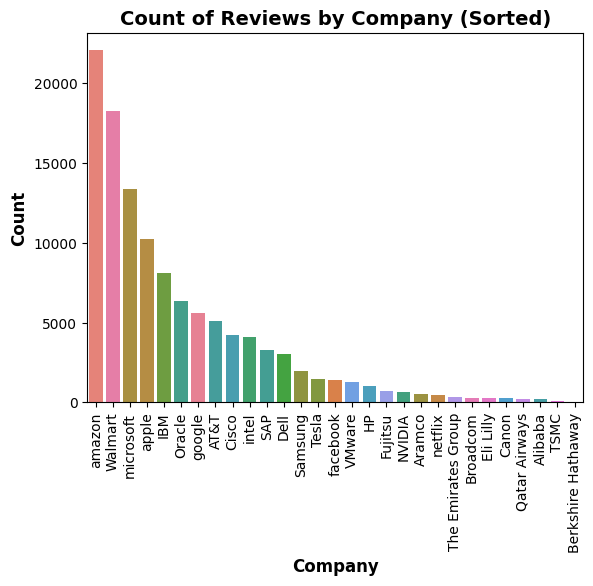

In [18]:
# Count the occurrences of each company and sort them
company_counts = pdf['company'].value_counts()

# Reorder the 'company' column in the dataframe based on the counts
# Define a color palette for the companies
palette = sns.color_palette("husl", len(pd.Categorical(pdf['company'] , categories = company_counts.index, ordered=True).unique()))

# Create the countplot with companies sorted by count
sns.countplot(x = 'company', data = pdf, hue ='company' , palette = palette, order = company_counts.index)

# Set the title and labels
plt.title('Count of Reviews by Company (Sorted)', fontsize=14, fontweight='bold')
plt.xlabel('Company', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)

# Display the plot
plt.show()

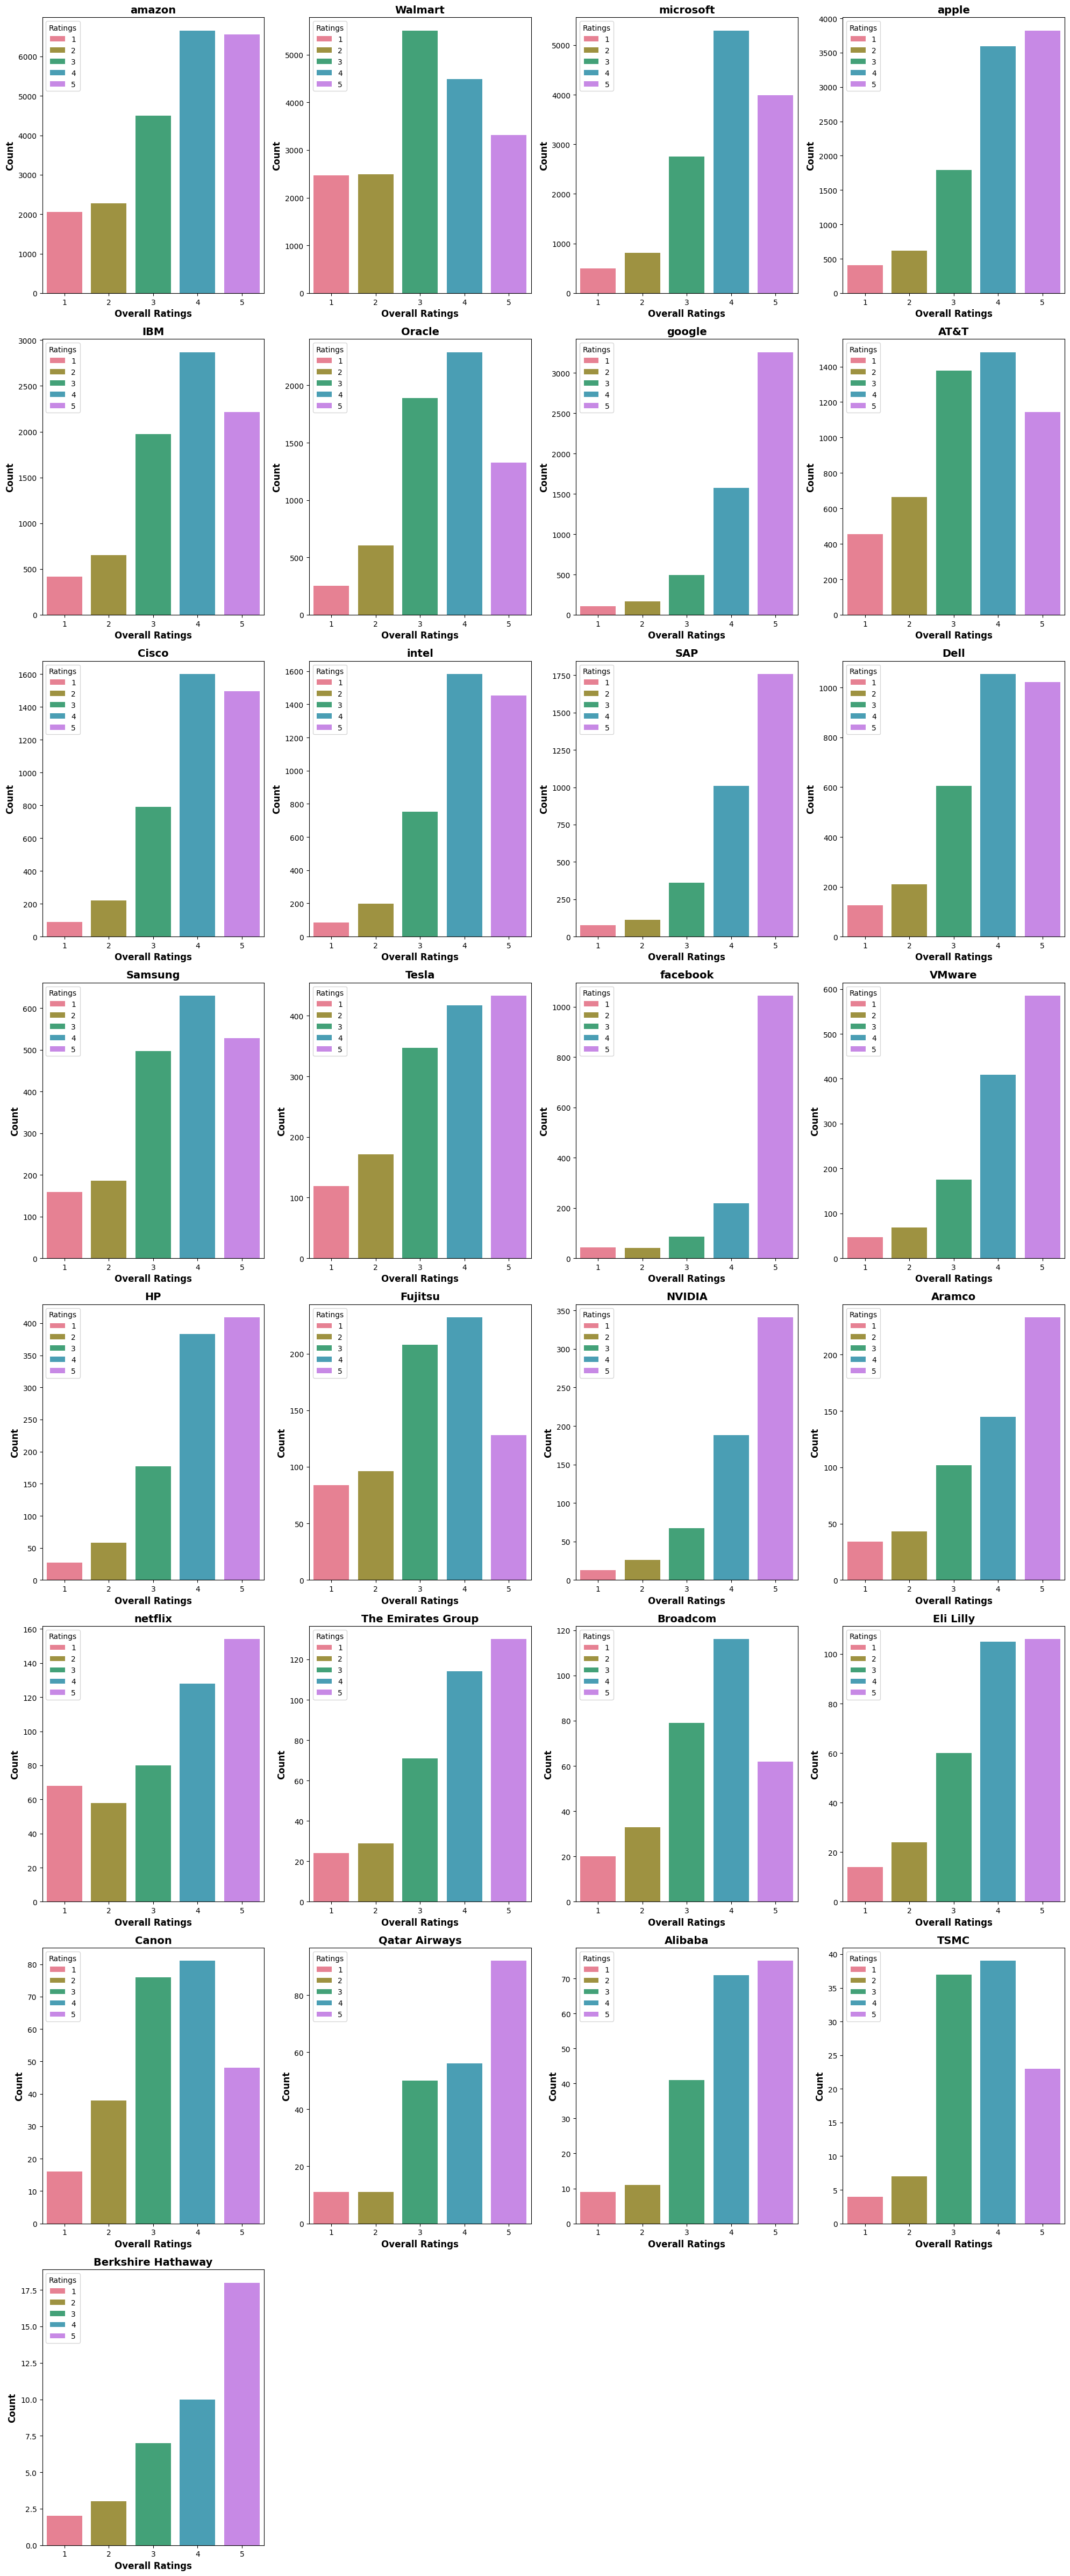

In [19]:
# Get the unique companies and their counts sorted from largest to smallest
company_counts = pdf['company'].value_counts()

companies = company_counts.index  # This is already sorted by counts

# Number of companies
num_companies = len(companies)

# Define number of columns per row
cols = 4

# Calculate number of rows needed
rows = (num_companies + cols - 1) // cols  # This ensures all companies are included even if not a multiple of 4

# Create subplots with the number of companies
fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows), sharey=False)

# Flatten axes for easier iteration
axes = axes.flatten()

# Define a color palette (you can use 'husl', 'Paired', 'Set2', etc. for different color schemes)
palette = sns.color_palette("husl", len(pdf['overall-ratings'].unique()))

# Loop through each company and plot
for i, company in enumerate(companies):
    sns.countplot(x  = 'overall-ratings', data = pdf[pdf['company'] == company],
                  ax = axes[i], hue = 'overall-ratings', palette = palette, legend = False)
    axes[i].set_title(company , fontsize=14 , fontweight='bold')
    axes[i].set_xlabel('Overall Ratings' , fontsize=12, fontweight='bold')  # Optional: Label the x-axis
    axes[i].set_ylabel('Count' , fontsize=12, fontweight='bold')  # Optional: Label the y-axis

    # Add legend inside the plot
    handles, labels = axes[i].get_legend_handles_labels()

    # Add legend inside the plot
    axes[i].legend(labels = sorted(pdf['overall-ratings'].unique()),
                   loc    ='upper left' , title='Ratings', fontsize=10)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### _Brief Explanation of following code cell_

Identify highly correlated features. __Kendall's correlation__ is employed here because its more robust and effective. It can be used with continuous, ordinal and binay variable. [Pearson vs Spearman vs Kendall](https://datascience.stackexchange.com/questions/64260/pearson-vs-spearman-vs-kendall)

In [20]:
## Kendall correlation
numeric_features = [feature for feature in pdf.columns if pdf[feature].dtype != 'object']
pdf[numeric_features].corr(method='kendall').style.background_gradient()

,dates,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
dates,1.000000,0.035080,0.023384,0.029480,0.037551,0.017323,0.035612,-0.106680
overall-ratings,0.035080,1.000000,0.397997,0.507128,0.484194,0.386027,0.505136,-0.185653
work-balance-stars,0.023384,0.397997,1.000000,0.593426,0.525765,0.490076,0.610506,-0.069643
culture-values-stars,0.029480,0.507128,0.593426,1.000000,0.616491,0.552892,0.700722,-0.059610
carrer-opportunities-stars,0.037551,0.484194,0.525765,0.616491,1.000000,0.586145,0.651180,-0.062603
comp-benefit-stars,0.017323,0.386027,0.490076,0.552892,0.586145,1.000000,0.561399,0.019553
senior-mangemnet-stars,0.035612,0.505136,0.610506,0.700722,0.651180,0.561399,1.000000,-0.066625
helpful-count,-0.106680,-0.185653,-0.069643,-0.059610,-0.062603,0.019553,-0.066625,1.000000


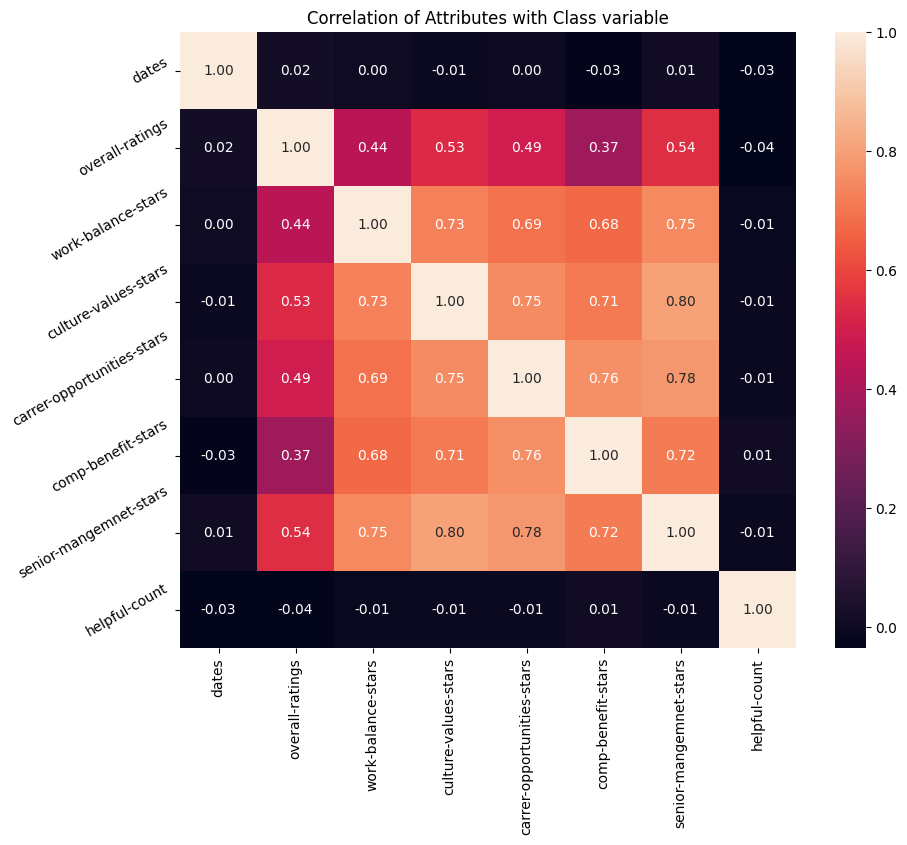

In [21]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(pdf[numeric_features].corr(method='pearson'), square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [22]:
pdf.drop("summary" , axis=1 , inplace=True)
pdf.drop("advice-to-mgmt" , axis=1 , inplace=True)
pdf.drop("work-balance-stars" , axis=1 , inplace=True)
pdf.drop("culture-values-stars" , axis=1 , inplace=True)
pdf.drop("carrer-opportunities-stars" , axis=1 , inplace=True)
pdf.drop("senior-mangemnet-stars" , axis=1 , inplace=True)
pdf.drop("comp-benefit-stars" , axis=1 , inplace=True)
pdf.drop("helpful-count" , axis=1 , inplace=True)
pdf.drop("dates" , axis=1 , inplace=True)
#pdf.drop("company" , axis=1 , inplace=True)

In [23]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115209 entries, 0 to 129888
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   company          115209 non-null  object
 1   location         115208 non-null  object
 2   pros             115209 non-null  object
 3   cons             115209 non-null  object
 4   overall-ratings  115209 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 5.3+ MB


In [24]:
pdf.head(2)

,company,location,pros,cons,overall-ratings
0,google,none,People are smart and friendly,Bureaucracy is slowing things down,5
1,google,"Mountain View, CA","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4


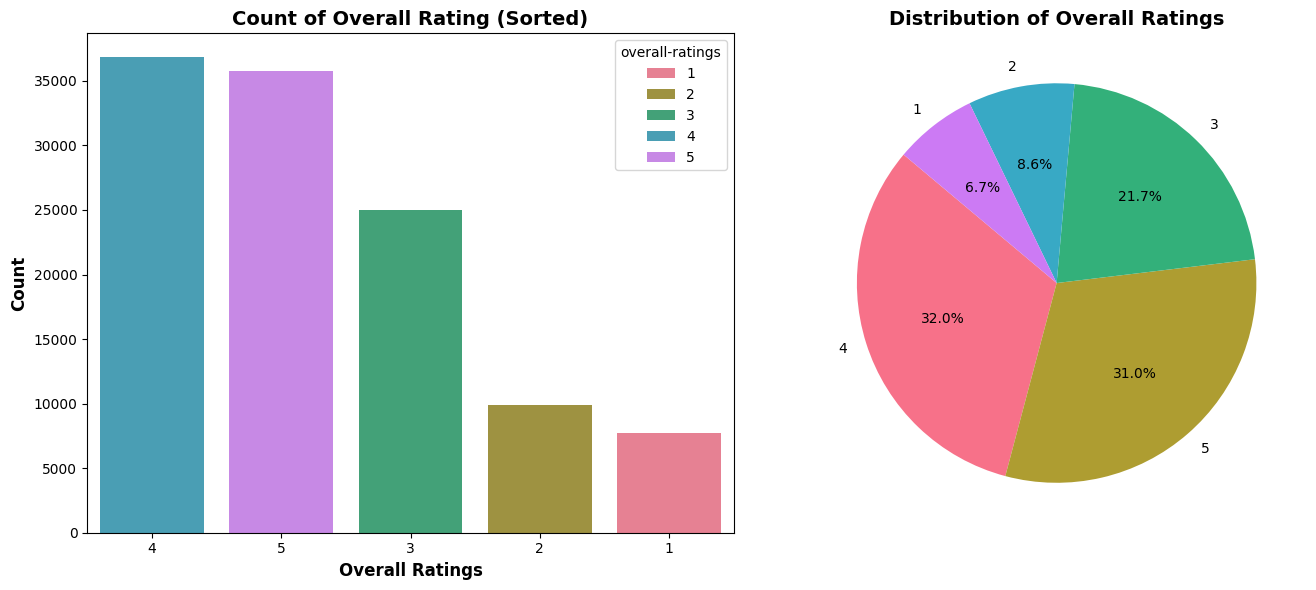

In [25]:
# Count the ratings
rates_counts = pdf['overall-ratings'].value_counts()

# Reorder the 'overall-ratings' column in the dataframe based on the counts
palette = sns.color_palette("husl", len(pd.Categorical(pdf['overall-ratings'], categories=rates_counts.index, ordered=True).unique()))

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of the count of overall ratings
sns.countplot(
    x='overall-ratings',
    data=pdf,
    hue='overall-ratings',
    palette=palette,
    order=rates_counts.index,
    ax=axes[0]
)
axes[0].set_title('Count of Overall Rating (Sorted)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Overall Ratings', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')

# Pie chart of the distribution of overall ratings
axes[1].pie(
    rates_counts,
    labels=rates_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[1].set_title('Distribution of Overall Ratings', fontsize=14, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()

#### **Web Scrapping for Handling the Class Imbalance**

In [26]:
csv_file = './data/scrapped_new.csv'
pdf0 = pd.read_csv(csv_file , encoding='ISO-8859-1')

In [27]:
pdf0.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link'],
      dtype='object')

In [28]:
miss_summary = pdf0[pdf0["summary"].isna()].index
pdf0.drop(miss_summary, inplace=True)

pdf0['advice-to-mgmt'].fillna('none', inplace=True)
pdf0["overall-ratings"].fillna(0, inplace=True)

pdf0.drop("Unnamed: 0" , axis=1 , inplace=True)
#pdf0.drop("location"   , axis=1 , inplace=True)
pdf0.drop("job-title"  , axis=1 , inplace=True)
pdf0.drop("link"       , axis=1 , inplace=True)
pdf0.drop("summary" , axis=1 , inplace=True)
pdf0.drop("advice-to-mgmt" , axis=1 , inplace=True)
pdf0.drop("work-balance-stars" , axis=1 , inplace=True)
pdf0.drop("culture-values-stars" , axis=1 , inplace=True)
pdf0.drop("carrer-opportunities-stars" , axis=1 , inplace=True)
pdf0.drop("senior-mangemnet-stars" , axis=1 , inplace=True)
pdf0.drop("comp-benefit-stars" , axis=1 , inplace=True)
pdf0.drop("helpful-count" , axis=1 , inplace=True)
pdf0.drop("dates" , axis=1 , inplace=True)
#pdf0.drop("company" , axis=1 , inplace=True)

In [29]:
pdf0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63681 entries, 0 to 63893
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          63681 non-null  object
 1   location         63681 non-null  object
 2   pros             63681 non-null  object
 3   cons             63681 non-null  object
 4   overall-ratings  63681 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [30]:
pdf0.shape

(63681, 5)

In [31]:
pdf = pd.concat([pdf , pdf0] , ignore_index=True)
pdf.shape

(178890, 5)

In [32]:
pdf['source']   = 'Glassdoor'
pdf['org_pros'] = pdf['pros']
pdf['org_cons'] = pdf['cons']

In [33]:
pdf.duplicated().sum()

2344

In [34]:
pdf = pdf.drop_duplicates()

In [35]:
pdf.duplicated().sum()

0

In [36]:
pdf.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

20

In [37]:
pdf = pdf.drop_duplicates(subset=['pros', 'cons', 'overall-ratings'], keep='first')

In [38]:
pdf.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

0

In [39]:
pdf.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [40]:
pdf = pdf.drop_duplicates(subset=['org_pros', 'org_cons', 'overall-ratings'], keep='first')

In [41]:
pdf.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [42]:
# reset the indexing
pdf = pdf.reset_index()
pdf.drop("index" , axis=1 , inplace=True)

In [43]:
pdf.head(2)

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons
0,google,none,People are smart and friendly,Bureaucracy is slowing things down,5,Glassdoor,People are smart and friendly,Bureaucracy is slowing things down
1,google,"Mountain View, CA","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4,Glassdoor,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...


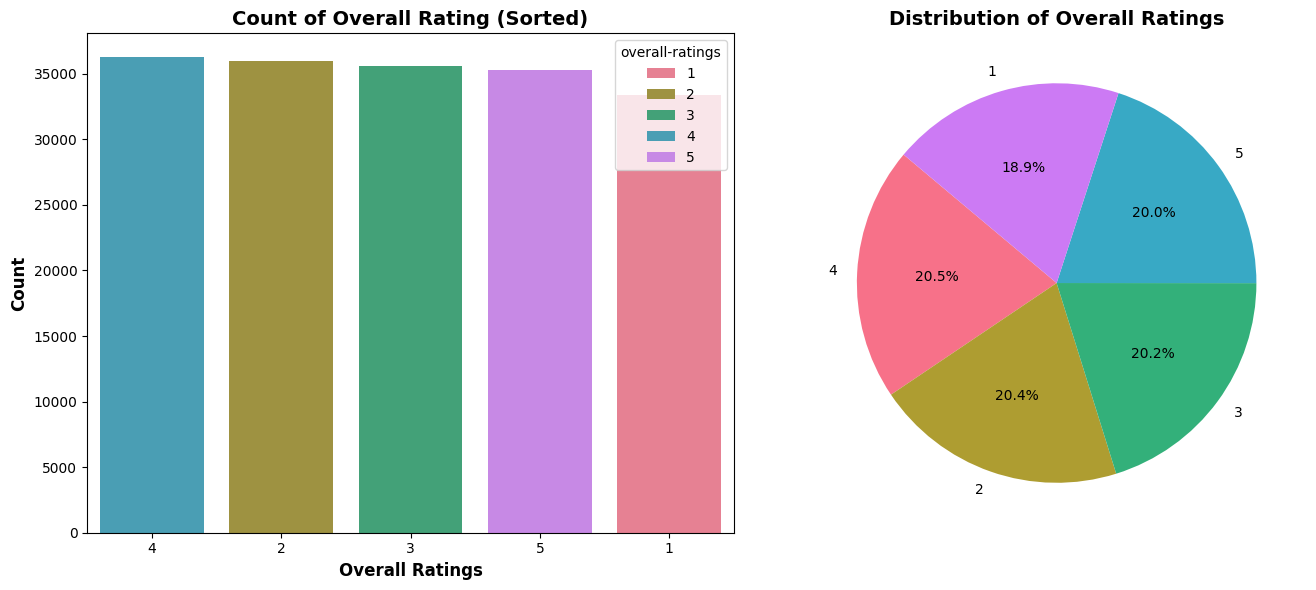

In [44]:
# Count the ratings
rates_counts = pdf['overall-ratings'].value_counts()

# Reorder the 'overall-ratings' column in the dataframe based on the counts
palette = sns.color_palette("husl", len(pd.Categorical(pdf['overall-ratings'], categories=rates_counts.index, ordered=True).unique()))

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of the count of overall ratings
sns.countplot(
    x='overall-ratings',
    data=pdf,
    hue='overall-ratings',
    palette=palette,
    order=rates_counts.index,
    ax=axes[0]
)
axes[0].set_title('Count of Overall Rating (Sorted)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Overall Ratings', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')

# Pie chart of the distribution of overall ratings
axes[1].pie(
    rates_counts,
    labels=rates_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[1].set_title('Distribution of Overall Ratings', fontsize=14, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()

In [45]:
# Download the stopwords
nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
def clean_text(text):

    # Handling Emojis https://unicode.scarfboy.com/
    # Grinning face with smiling eyes [-5]
    text = re.sub('\xf0\x9f\x98\x81', 'grinning_face_with_smiling_eyes_emoji ', text)
    # Grinning face with star eyes
    text = re.sub('\xf0\x9f\xa4\xa9', 'grinning_face_with_star_eyes_emoji ', text)
    # Smiling face with smiling eyes [-8]
    text = re.sub('\xf0\x9f\x98\x8a', 'smiling_face_with_smiling_eyes_emoji ', text)
    # OK sign emoji [-1]
    text = re.sub('\xf0\x9f\x91\x8c', 'OK_emoji ', text)
    # thumbs up emoji [-6]
    text = re.sub('\xf0\x9f\x91\x8d', 'thumbs_up_emoji ', text)
    # thumbs down
    text = re.sub('\xf0\x9f\x91\x8e', 'thumbs_down_emoji ', text)
    # robot face [-1]
    text = re.sub('\xf0\x9f\xa4\x96', 'robot_face_emoji ', text)
    # 100 points
    text = re.sub('\xf0\x9f\x92\xaf', '100_points_emoji ', text)
    # emoji modifier
    text = re.sub('\xf0\x9f\x8f\xbb', '', text)
    # emoji modifier fitzpatrick type-3
    text = re.sub('\xf0\x9f\x8f\xbc', '', text)
    # emoji modifier fitzpatrick type-4
    text = re.sub('\xf0\x9f\x8f\xbd', '', text)
    # emoji modifier fitzpatrick type-5
    text = re.sub('\xf0\x9f\x8f\xbe', '', text)
    # face with stuck-out tongue and winking eye
    text = re.sub('\xf0\x9f\x98\x9c', 'face_with_stuck_out_tongue_and_winking_eye_emoji ', text)
    # face with stuck-out tongue
    text = re.sub('\xf0\x9f\x98\x9b', 'face_with_stuck_out_tongue_emoji ', text)
    # crying face
    text = re.sub('\xf0\x9f\x98\xa2', 'crying_face_emoji ', text)
    # kissing face
    text = re.sub('\xf0\x9f\x98\x9a', 'kissing_face_emoji ', text)
    # grinning face
    text = re.sub('\xf0\x9f\x98\x80', 'grinning_face_emoji ', text)
    # face with tears of joy
    text = re.sub('\xf0\x9f\x98\x82', 'face_with_tears_of_joy_emoji ', text)
    # unamused face
    text = re.sub('\xf0\x9f\x98\x92', 'unamused_face_emoji ', text)
    # upside-down face
    text = re.sub('\xf0\x9f\x99\x83', 'upside_down_face_emoji ', text)
    # smiling face with heart-shaped eyes
    text = re.sub('\xf0\x9f\x98\x8d', 'smiling_face_with_heart_shaped_eyes_emoji ', text)
    # winking face
    text = re.sub('\xf0\x9f\x98\x89', 'winking_face_emoji ', text)
    # shrug emoji
    text = re.sub('\xf0\x9f\xa4\xb7', 'shrug_emoji ', text)
    # rolling on the floor laughing emoji
    text = re.sub('\xf0\x9f\xa4\xa3', 'rolling_on_the_floor_laughing_emoji ', text)
    # face palm emoji
    text = re.sub('\xf0\x9f\xa4\xa6', 'face_palm_emoji ', text)
    # smirking face
    text = re.sub('\xf0\x9f\x98\x8f', 'smirking_face_emoji ', text)
    # slightly smiling face
    text = re.sub('\xf0\x9f\x99\x82', 'slightly_smiling_face_emoji ', text)
    # smiling face with open mouth and cold sweat
    text = re.sub('\xf0\x9f\x98\x85', 'smiling_face_with_open_mouth_and_cold_sweat_emoji ', text)
    # smiling face with open mouth and smiling eyes
    text = re.sub('\xf0\x9f\x98\x84', 'smiling_face_with_open_mouth_and_smiling_eyes_emoji ', text)
    # relieved face
    text = re.sub('\xf0\x9f\x98\x8c', 'relieved_face_emoji ', text)
    # worried face
    text = re.sub('\xf0\x9f\x98\x9f', 'worried_face_emoji ', text)
    # face with ok gesture
    text = re.sub('\xf0\x9f\x99\x86', 'face_with_ok_gesture_emoji ', text)
    # face with cold sweat
    text = re.sub('\xf0\x9f\x98\x93', 'face_with_cold_sweat_emoji ', text)
    # smiling face with sunglasses
    text = re.sub('\xf0\x9f\x98\x8e', 'smiling_face_with_sunglasses_emoji ', text)
    # thinking face
    text = re.sub('\xf0\x9f\xa4\x94', 'thinking_face_emoji ', text)
    # loudly crying face
    text = re.sub('\xf0\x9f\x98\xad', 'loudly_crying_face_emoji ', text)
    # face with rolling eyes
    text = re.sub('\xf0\x9f\x99\x84', 'face_with_rolling_eyes_emoji ', text)
    # frowning face with open mouth
    text = re.sub('\xf0\x9f\x98\xa6', 'frowning_face_with_open_mouth_emoji ', text)
    # dizzy emoji
    text = re.sub('\xf0\x9f\x92\xab', 'dizzy_symbol_emoji ', text)
    # fire emoji
    text = re.sub('\xf0\x9f\x94\xa5', 'fire_emoji ', text)
    # poultry leg
    text = re.sub('\xf0\x9f\x8d\x97', 'poultry_leg_emoji ', text)
    # electric light bulb
    text = re.sub('\xf0\x9f\x92\xa1', 'electric_light_bulb_emoji ', text)
    # male sign
    text = re.sub('\xe2\x99\x82', 'male_sign ', text)
    # female sign
    text = re.sub('\xe2\x99\x80', 'female_sign ', text)

    # Handling Zero width space using https://unicode.scarfboy.com/
    # Zero width space width
    text = re.sub('\xe2\x80\x8b', '', text)
    # zero width joiner
    text = re.sub('\xe2\x80\x8d', '', text)

    # Handling special chars using https://unicode.scarfboy.com/
    # Left single quotation mark
    text = re.sub('\xe2\x80\x98', "'", text)
    # Right single quotation mark
    text = re.sub('\xe2\x80\x99', "'", text)
    # Left double quotation mark
    text = re.sub('\xe2\x80\x9c', '"', text)
    # Right double quotation mark
    text = re.sub('\xe2\x80\x9d', '"', text)
    # EM dash
    text = re.sub('\xe2\x80\x94', '-', text)
    # EN dash
    text = re.sub('\xe2\x80\x93', '-', text)
    # Fullwidth comma
    text = re.sub('\xef\xbc\x8c', ",", text)
    # Bullet
    text = re.sub('\xe2\x80\xa2', '*', text)
    # Horizontal ellipsis
    text = re.sub('\xe2\x80\xa6', '...', text)
    # checkmark to yes
    text = re.sub('\xe2\x9c\x94', 'yes', text)
    # variation selector to nothing
    text = re.sub('\xef\xb8\x8f', '', text)
    # Euro sign to Dollar sign
    text = re.sub('\xe2\x82\xac', '$', text)
    # Pound sign to Dollar sign
    text = re.sub('\xc2\xa3', '$', text)
    # Cent sign to Dollar sign
    text = re.sub('\xc2\xa2', '$', text)
    # Non-breaking space to space
    text = re.sub('\xc2\xa0', ' ', text)
    # Handling &amp
    text = text.replace("&amp;","&")
    # replace Windows-style line endings (\r\n) with Unix-style line endings
    text = re.sub('\r\n', '\n', text)

    # General Transformation
    # Convert the input to sting and lowercase characters
    text = str(text).lower()
    # Remove non-printable characters
    text = ''.join(filter(lambda x: x in string.printable, text))
    # Replace multiple whitespace characters with a single space
    text = re.sub(r'\s{2,}', ' ', text).strip()
    # Removes all text enclosed within square brackets
    text = re.sub('\[.*?\]', '', text)
    # Removes URLs from the input text
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Removes HTML or XML tags
    text = re.sub('<.*?>+', '', text)
    # Removes all punctuation characters from the input string text
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Removes all newline characters
    text = re.sub('\n', '', text)
    # Removes all Tabspace characters
    text = re.sub('\t', ' ', text)
    # Removes all words that contain digits
    text = re.sub('\w*\d\w*', '', text)
    # Removes all the stopword
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)

    return text.strip()

In [47]:
pdf['pros']           = pdf['pros'].apply(clean_text)
pdf['cons']           = pdf['cons'].apply(clean_text)

In [48]:
data = []
for i in tqdm(range(len(pdf))):
    pros    = pdf.iloc[i]['pros']
    cons    = pdf.iloc[i]['cons']
    s = "Pros: " + pros + "\n\nCons: " + cons 
    data.append(s)

100%|██████████| 176526/176526 [00:09<00:00, 18644.67it/s]


In [49]:
detector = LanguageDetectorBuilder.from_all_languages().build()
%time data_res = detector.compute_language_confidence_values_in_parallel(data)

CPU times: user 1min 46s, sys: 1.02 s, total: 1min 47s
Wall time: 25.3 s


In [50]:
non_english_list = []
for i,confidence_values in enumerate(data_res):
    if confidence_values[0].language.name != "ENGLISH":
        non_english_list.append(i)
print(f"Number of non-English records: {len(non_english_list)}")

Number of non-English records: 574


In [51]:
pdf.iloc[non_english_list]

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons
391,google,"San Francisco, CA",good palces,na even cons,5,Glassdoor,good at all the palces,N/A there is even no cons
1988,google,"San Antonio, TX",pros google,pros microsoft,5,Glassdoor,the pros are that it's google,the pros are that it's not microsoft
2135,google,"Phoenix, AZ",liked new tools future,preferencias de sitios para citas en interner,5,Glassdoor,I liked new tools for future,Preferencias de sitios para citas en interner
3530,google,none,well good compqny,cons co,5,Glassdoor,All is well and a good compqny,No cons in this co
3574,google,Karnal (India),qulity best,much work imployes,5,Glassdoor,Qulity of this is best,Too much work for imployes
...,...,...,...,...,...,...,...,...
173595,7-Eleven,none,none pros,lot cons,1,Glassdoor,None of them were pros,A lot of them were cons
173685,Red Lobster,"Dublin, GA",pros,drama tan soap opera,1,Glassdoor,There are no pros here,More drama tan a soap opera
173826,Angi,"Pflugerville, TX",menten cuando quieren vender el produrto,sienpre te cobrn elporcinto aunque consigas el...,1,Glassdoor,menten cuando quieren vender el produrto,sienpre te cobrn elporcinto aunque no consigas...
174475,Academy Sports + Outdoors,"Calgary, AB",innovative wecanmk eitirua specialist hospital...,shortwe make stressful,1,Glassdoor,Innovative \nWe\nCan\nMk e\nIt\nIrua \nSpecial...,Short\nWe can make it \nSo \nStressful


In [52]:
# drop the records and reset the indexing
pdf = pdf.drop(non_english_list).reset_index()
pdf.drop("index" , axis=1 , inplace=True)

In [53]:
def clean_non_en_letters(text):

    # Handling acute sign using https://unicode.scarfboy.com/
    # Small letter o with acute (ó)
    text = re.sub('\xc3\xb3', "o", text)
    # Small letter e with grave (è)
    text = re.sub('\xc3\xa8', "e", text)
    # Small letter e with grave (é)
    text = re.sub('\xc3\xa9', "e", text)
    # Small letter a with grave (à)
    text = re.sub('\xc3\xa0', "a", text)
    # Acute to '
    text = re.sub('\xc2\xb4', "'", text)
    # Latin small letter dotless I used as |
    text = re.sub('\xc4\xb1', '|', text)

    return text.strip()

In [54]:
pdf['pros']           = pdf['pros'].apply(clean_non_en_letters)
pdf['cons']           = pdf['cons'].apply(clean_non_en_letters)

In [55]:
data = []
for i in tqdm(range(len(pdf))):
    pros    = pdf.iloc[i]['pros']
    cons    = pdf.iloc[i]['cons']
    s = "Pros: " + pros + "\n\nCons: " + cons 
    data.append(s)

100%|██████████| 175952/175952 [00:09<00:00, 18328.01it/s]


In [56]:
detector = LanguageDetectorBuilder.from_all_languages().build()
%time data_res = detector.compute_language_confidence_values_in_parallel(data)

CPU times: user 1min 43s, sys: 438 ms, total: 1min 43s
Wall time: 21.9 s


In [57]:
non_english_list = []
for i , confidence_values in enumerate(data_res):
    if confidence_values[0].language.name != "ENGLISH":
        non_english_list.append(i)
print(f"Number of non-English records: {len(non_english_list)}")

Number of non-English records: 0


In [58]:
pdf.iloc[non_english_list]

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons


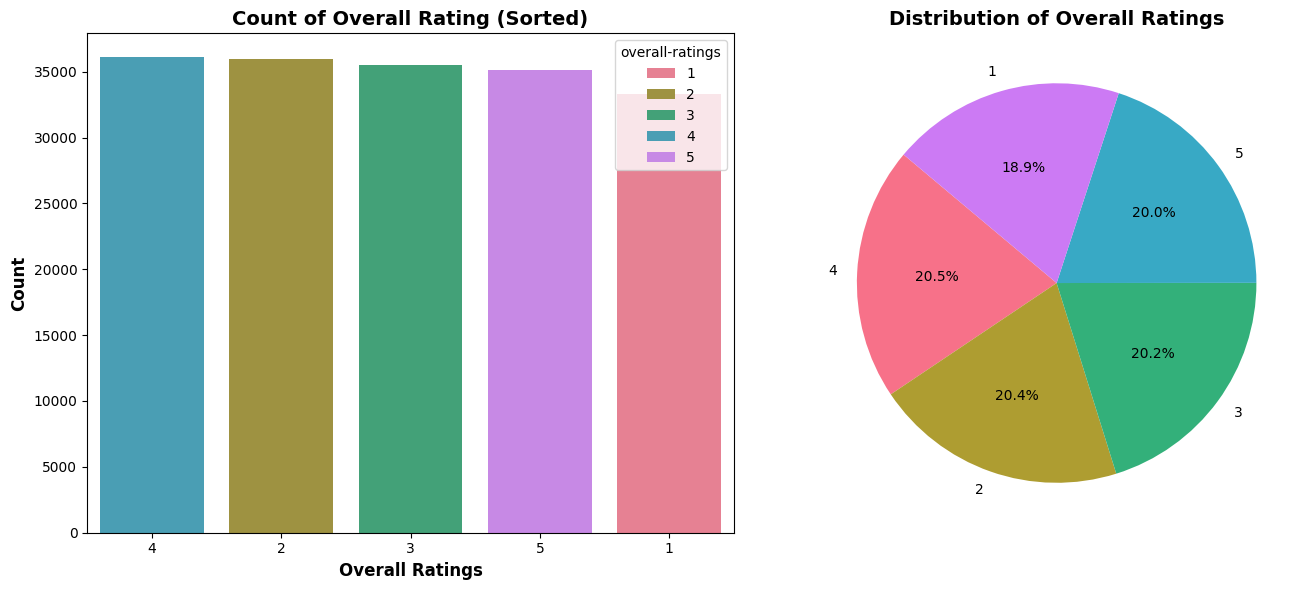

In [59]:
# Count the ratings
rates_counts = pdf['overall-ratings'].value_counts()

# Reorder the 'overall-ratings' column in the dataframe based on the counts
palette = sns.color_palette("husl", len(pd.Categorical(pdf['overall-ratings'], categories=rates_counts.index, ordered=True).unique()))

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of the count of overall ratings
sns.countplot(
    x='overall-ratings',
    data=pdf,
    hue='overall-ratings',
    palette=palette,
    order=rates_counts.index,
    ax=axes[0]
)
axes[0].set_title('Count of Overall Rating (Sorted)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Overall Ratings', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')

# Pie chart of the distribution of overall ratings
axes[1].pie(
    rates_counts,
    labels=rates_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[1].set_title('Distribution of Overall Ratings', fontsize=14, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()

#### **Indian Company**

In [60]:
csv_file = './data/indian_scrapped.csv'
pdf1 = pd.read_csv(csv_file , encoding='ISO-8859-1', lineterminator='\n')

In [61]:
pdf1.shape

(69632, 16)

In [62]:
pdf1.columns

Index(['company', 'location', 'dates', 'job-title', 'summary', 'pros', 'cons',
       'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'helpful-count',
       'link\r'],
      dtype='object')

In [63]:
pdf1['source']   = 'Ambitionbox'
pdf1['org_pros'] = pdf1['pros']
pdf1['org_cons'] = pdf1['cons']

In [64]:
pdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69632 entries, 0 to 69631
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company                     69632 non-null  object 
 1   location                    69453 non-null  object 
 2   dates                       69631 non-null  object 
 3   job-title                   69623 non-null  object 
 4   summary                     0 non-null      float64
 5   pros                        68787 non-null  object 
 6   cons                        67538 non-null  object 
 7   advice-to-mgmt              172 non-null    float64
 8   overall-ratings             69460 non-null  float64
 9   work-balance-stars          69455 non-null  float64
 10  culture-values-stars        69283 non-null  float64
 11  carrer-opportunities-stars  69286 non-null  float64
 12  comp-benefit-stars          69449 non-null  object 
 13  senior-mangemnet-stars      0 n

In [65]:
pdf1.drop("summary" , axis=1 , inplace=True)
pdf1.drop("advice-to-mgmt" , axis=1 , inplace=True)
pdf1.drop("work-balance-stars" , axis=1 , inplace=True)
pdf1.drop("culture-values-stars" , axis=1 , inplace=True)
pdf1.drop("carrer-opportunities-stars" , axis=1 , inplace=True)
pdf1.drop("senior-mangemnet-stars" , axis=1 , inplace=True)
pdf1.drop("comp-benefit-stars" , axis=1 , inplace=True)
pdf1.drop("helpful-count" , axis=1 , inplace=True)
pdf1.drop("dates" , axis=1 , inplace=True)
pdf1.drop("job-title" , axis=1 , inplace=True)
pdf1.drop("link\r" , axis=1 , inplace=True)

In [66]:
pdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69632 entries, 0 to 69631
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          69632 non-null  object 
 1   location         69453 non-null  object 
 2   pros             68787 non-null  object 
 3   cons             67538 non-null  object 
 4   overall-ratings  69460 non-null  float64
 5   source           69632 non-null  object 
 6   org_pros         68787 non-null  object 
 7   org_cons         67538 non-null  object 
dtypes: float64(1), object(7)
memory usage: 4.3+ MB


In [67]:
pdf1.describe().T

,count,mean,std,min,25%,50%,75%,max
overall-ratings,69460.0,3.664454,1.291415,1.0,3.0,4.0,5.0,5.0


In [68]:
pdf1.duplicated().sum()

3767

In [69]:
pdf1 = pdf1.drop_duplicates()

In [70]:
pdf1.duplicated().sum()

0

In [71]:
pdf1.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

856

In [72]:
pdf1 = pdf1.drop_duplicates(subset=['pros', 'cons', 'overall-ratings'], keep='first')

In [73]:
pdf1.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

0

In [74]:
pdf1.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [75]:
pdf1 = pdf1.drop_duplicates(subset=['org_pros', 'org_cons', 'overall-ratings'], keep='first')

In [76]:
pdf1.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [77]:
pdf1.isna().sum()

company               0
location             57
pros                439
cons               1496
overall-ratings       1
source                0
org_pros            439
org_cons           1496
dtype: int64

In [78]:
pdf1.isnull().sum()

company               0
location             57
pros                439
cons               1496
overall-ratings       1
source                0
org_pros            439
org_cons           1496
dtype: int64

In [79]:
pdf1.dropna(inplace=True)

In [80]:
pdf1.isna().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
dtype: int64

In [81]:
pdf1.isnull().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
dtype: int64

In [82]:
pdf1 = pdf1.reset_index(drop=True)

In [83]:
pdf1.shape

(63023, 8)

In [84]:
pdf1['pros']           = pdf1['pros'].apply(clean_text)
pdf1['cons']           = pdf1['cons'].apply(clean_text)

In [85]:
data = []
for i in tqdm(range(len(pdf1))):
    pros    = pdf1.iloc[i]['pros']
    cons    = pdf1.iloc[i]['cons']
    s = "Pros: " + pros + "\n\nCons: " + cons
    data.append(s)

100%|██████████| 63023/63023 [00:03<00:00, 17827.37it/s]


In [86]:
detector = LanguageDetectorBuilder.from_all_languages().build()
%time data_res = detector.compute_language_confidence_values_in_parallel(data)

CPU times: user 30.3 s, sys: 124 ms, total: 30.4 s
Wall time: 6.54 s


In [87]:
non_english_list = []
for i,confidence_values in enumerate(data_res):
    if confidence_values[0].language.name != "ENGLISH":
        non_english_list.append(i)
print(f"Number of non-English records: {len(non_english_list)}")

Number of non-English records: 629


In [88]:
pdf1.iloc[non_english_list]

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons
47,WNS,Pune,,,3.0,Ambitionbox,..,..
72,WNS,Mumbai,gd,na,5.0,Ambitionbox,All gd,Na
83,WNS,Navi Mumbai,comments,comments,4.0,Ambitionbox,No comments,No comments
99,WNS,Gurgaon / Gurugram,applicable,applicable,1.0,Ambitionbox,Not Applicable for it now,Not Applicable for it now
305,WNS,Pune,na,na,3.0,Ambitionbox,Na,Na
...,...,...,...,...,...,...,...,...
62338,Infosys,Pune,good djdjdjddjjddjdjdjdj,timing need work per client requirements,5.0,Ambitionbox,Good djdjdjddjjddjdjdjdj,No timing need to work as per client requirem...
62446,Infosys,Bangalore / Bengaluru,ok,yes ohh kk yes im,3.0,Ambitionbox,Ok,Yes ohh kk yes im
62669,Infosys,Pune,,n n n n n,3.0,Ambitionbox,Y Y Y Y Y,N N N N N
62834,Infosys,Pune,work life balancehybrid,compensationbonus,3.0,Ambitionbox,Work Life Balance\nHybrid,Compensation\nBonus


In [89]:
# drop the records and reset the indexing
pdf1 = pdf1.drop(non_english_list).reset_index()
pdf1.drop("index" , axis=1 , inplace=True)

In [90]:
pdf1['pros']           = pdf1['pros'].apply(clean_non_en_letters)
pdf1['cons']           = pdf1['cons'].apply(clean_non_en_letters)

In [91]:
data = []
for i in tqdm(range(len(pdf1))):
    pros    = pdf1.iloc[i]['pros']
    cons    = pdf1.iloc[i]['cons']
    s = "Pros: " + pros + "\n\nCons: " + cons
    data.append(s)

100%|██████████| 62394/62394 [00:03<00:00, 18061.79it/s]


In [92]:
detector = LanguageDetectorBuilder.from_all_languages().build()
%time data_res = detector.compute_language_confidence_values_in_parallel(data)

CPU times: user 29.8 s, sys: 152 ms, total: 29.9 s
Wall time: 6.29 s


In [93]:
non_english_list = []
for i,confidence_values in enumerate(data_res):
    if confidence_values[0].language.name != "ENGLISH":
        non_english_list.append(i)
print(f"Number of non-English records: {len(non_english_list)}")

Number of non-English records: 0


In [94]:
pdf1.iloc[non_english_list]

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons


In [95]:
pdf1.head(2)

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons
0,WNS,Gurgaon / Gurugram,monthly meeting supervisor discuss problem fac...,work home policy good,4.0,Ambitionbox,Monthly meeting with supervisor to discuss the...,Work from home policy is not good
1,WNS,Pune,nothing like,worst management bpo sector upraisal increment...,2.0,Ambitionbox,Nothing is there to like,Worst Management in all over BPO sector. No up...


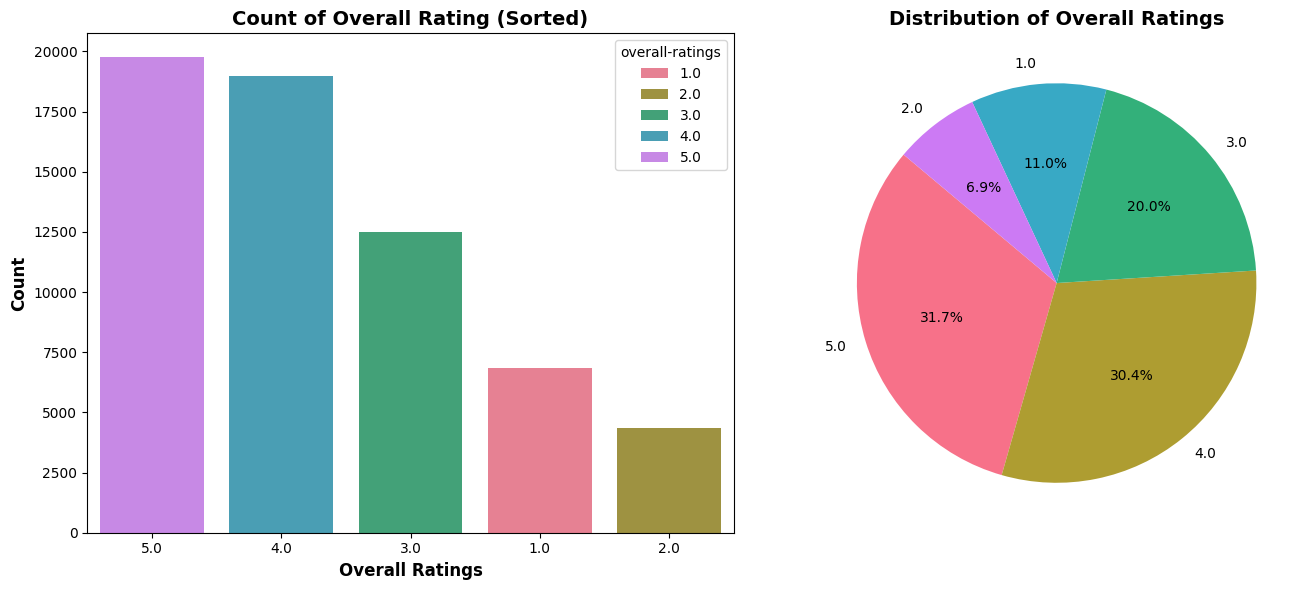

In [96]:
# Count the ratings
rates_counts = pdf1['overall-ratings'].value_counts()

# Reorder the 'overall-ratings' column in the dataframe based on the counts
palette = sns.color_palette("husl", len(pd.Categorical(pdf1['overall-ratings'], categories=rates_counts.index, ordered=True).unique()))

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of the count of overall ratings
sns.countplot(
    x='overall-ratings',
    data=pdf1,
    hue='overall-ratings',
    palette=palette,
    order=rates_counts.index,
    ax=axes[0]
)
axes[0].set_title('Count of Overall Rating (Sorted)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Overall Ratings', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')

# Pie chart of the distribution of overall ratings
axes[1].pie(
    rates_counts,
    labels=rates_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[1].set_title('Distribution of Overall Ratings', fontsize=14, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()

### **Sampling**

In [97]:
def drop_unrich_pros_cons(df , total_data_size = 40_000):
    """
    This method drops the records whose pros and cons sections are not rich with not enough words
    """
    min_individual_rate = total_data_size//5
    for threshold in range(15,-1,-1):
        # we gradually reduce the threshold until we have enough records
        list_of_ids = []
        for i in range(len(df)):
            if len(df.iloc[i]['pros'].split()) < threshold and \
               len(df.iloc[i]['cons'].split()) < threshold:
               list_of_ids.append(i)

        # drop
        tmp_df = df.drop(list_of_ids).reset_index(drop=True)

        # confirm that the number of records of each rate is at least min_individual_rate
        count_enough_flag = True
        count_dict = tmp_df['overall-ratings'].value_counts().to_dict()
        for n in count_dict.values():
            if n < min_individual_rate:
                count_enough_flag = False
                break
        if count_enough_flag:
            return tmp_df

In [98]:
def balanced_sampling(dataframes , weights , total_size=10_000 , label_feature = 'overall-ratings', seed = 42):
    """
    Stratified sampling from multiple data sources according to specified weights.

    Parameters:
        dataframes (list of pd.DataFrame): DataFrames to sample from.
        weights (list of float): Proportional weights for each DataFrame.
        total_size (int): Total number of samples to return.
        label_feature (str): Column used for stratification.
        seed (int): Seed for reproducible sampling
    Returns:
        pd.DataFrame: Combined, shuffled, and stratified sample of size `total_size`.
    """
    # Normalize the weights
    weights = np.array(weights) / sum(weights)

    # Compute the sample size for each DataFrame
    sample_sizes = np.round(weights * total_size).astype(int)

    # Get unique values for stratification
    unique_values = set().union(*(df[label_feature].unique() for df in dataframes))

    # Stratified sampling
    sampled_dataframes = []
    for df, size in zip(dataframes, sample_sizes):
        df_samples = []
        for value in unique_values:
            value_samples = df[df[label_feature] == value]
            if not value_samples.empty:
                df_samples.append(value_samples.sample(
                    n=min(size // len(unique_values), len(value_samples)),
                    replace = False , random_state = seed
                ))
        if df_samples:
            sampled_dataframes.append(pd.concat(df_samples))

    # Combine all sampled DataFrames, shuffle, and return
    result_df = pd.concat(sampled_dataframes).sample(frac = 1 , random_state = seed).reset_index(drop=True)
    return result_df.iloc[:total_size]

In [99]:
pdf = drop_unrich_pros_cons(pdf)
print(len(pdf))

55278


In [100]:
pdf.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

6

In [101]:
pdf = pdf.drop_duplicates(subset=['pros', 'cons', 'overall-ratings'], keep='first')

In [102]:
pdf.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

0

In [103]:
pdf.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [104]:
pdf = pdf.drop_duplicates(subset=['org_pros', 'org_cons', 'overall-ratings'], keep='first')

In [105]:
pdf.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [106]:
pdf["pros"].isna().sum()

0

In [107]:
pdf["cons"].isna().sum()

0

In [108]:
pdf["pros"].isnull().sum()

0

In [109]:
pdf["pros"].isnull().sum()

0

In [110]:
pdf1 = drop_unrich_pros_cons(pdf1 , 10000)
print(len(pdf1))

19841


In [111]:
pdf1["pros"].isnull().sum()

0

In [112]:
pdf1["cons"].isnull().sum()

0

In [113]:
pdf1["pros"].isna().sum()

0

In [114]:
pdf1["cons"].isna().sum()

0

In [115]:
pdf1.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

0

In [116]:
pdf1 = pdf1.drop_duplicates(subset=['pros', 'cons', 'overall-ratings'], keep='first')

In [117]:
pdf1.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

0

In [118]:
pdf1.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [119]:
pdf1 = pdf1.drop_duplicates(subset=['org_pros', 'org_cons', 'overall-ratings'], keep='first')

In [120]:
pdf1.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [121]:
pdf = balanced_sampling ([pdf , pdf1],[95 , 5] , total_size = 20000 , label_feature = 'overall-ratings')
pdf.shape

(20000, 8)

In [122]:
pdf["pros"].isna().sum()

0

In [123]:
pdf["cons"].isna().sum()

0

In [124]:
pdf["pros"].isnull().sum()

0

In [125]:
pdf["pros"].isnull().sum()

0

In [126]:
pdf['source'].value_counts()

source
Glassdoor      19000
Ambitionbox     1000
Name: count, dtype: int64

In [127]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          20000 non-null  object 
 1   location         20000 non-null  object 
 2   pros             20000 non-null  object 
 3   cons             20000 non-null  object 
 4   overall-ratings  20000 non-null  float64
 5   source           20000 non-null  object 
 6   org_pros         20000 non-null  object 
 7   org_cons         20000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


In [128]:
pdf['overall-ratings'] = pdf['overall-ratings'].astype(int)

In [129]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          20000 non-null  object
 1   location         20000 non-null  object
 2   pros             20000 non-null  object
 3   cons             20000 non-null  object
 4   overall-ratings  20000 non-null  int64 
 5   source           20000 non-null  object
 6   org_pros         20000 non-null  object
 7   org_cons         20000 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


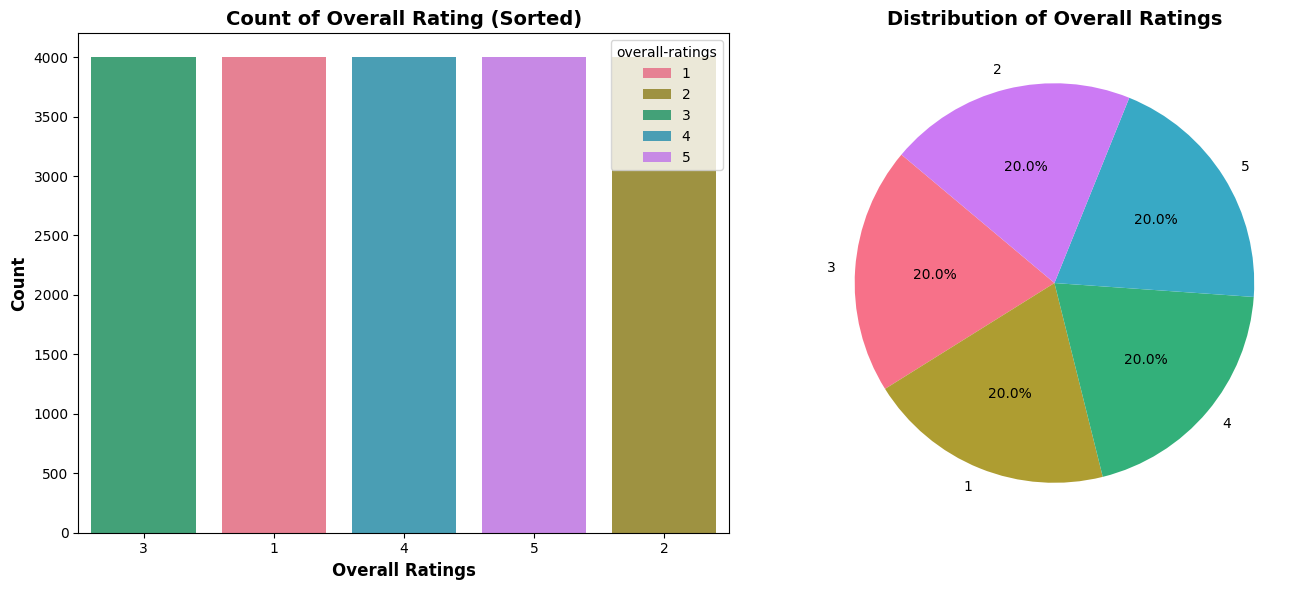

In [130]:
# Count the ratings
rates_counts = pdf['overall-ratings'].value_counts()

# Reorder the 'overall-ratings' column in the dataframe based on the counts
palette = sns.color_palette("husl", len(pd.Categorical(pdf['overall-ratings'], categories=rates_counts.index, ordered=True).unique()))

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of the count of overall ratings
sns.countplot(
    x='overall-ratings',
    data=pdf,
    hue='overall-ratings',
    palette=palette,
    order=rates_counts.index,
    ax=axes[0]
)
axes[0].set_title('Count of Overall Rating (Sorted)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Overall Ratings', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')

# Pie chart of the distribution of overall ratings
axes[1].pie(
    rates_counts,
    labels=rates_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[1].set_title('Distribution of Overall Ratings', fontsize=14, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()

In [131]:
pdf.isna().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
dtype: int64

In [132]:
# reset the indexing
pdf = pdf.reset_index()
pdf.drop("index" , axis=1 , inplace=True)

In [133]:
pdf.to_csv('./data/sampled_data.csv', index=False)

### **Training with TFIDF**

In [134]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold , cross_val_score , cross_validate

from sklearn.metrics import classification_report   , confusion_matrix , ConfusionMatrixDisplay  , recall_score ,  precision_score  , accuracy_score  , f1_score  , make_scorer , balanced_accuracy_score , roc_auc_score , roc_curve

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [135]:
pdf = pd.read_csv('./data/sampled_data.csv')

In [136]:
pdf.duplicated().sum()

0

In [137]:
pdf.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

0

In [138]:
pdf.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [139]:
pdf.isna().sum()

company            0
location           0
pros               1
cons               4
overall-ratings    0
source             0
org_pros           0
org_cons           0
dtype: int64

In [140]:
pdf.isnull().sum()

company            0
location           0
pros               1
cons               4
overall-ratings    0
source             0
org_pros           0
org_cons           0
dtype: int64

In [141]:
pdf[pdf['pros'].isna()]

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons
5099,Accenture,Jaipur,NaN,girls dont give location near home town,5,Ambitionbox,......,For girls they don't give location near home town


In [142]:
pdf[pdf['cons'].isna()]

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons
555,Accenture,Hyderabad / Secunderabad,flexible work also promotions improving skills...,NaN,5,Ambitionbox,There is flexible with work and also have prom...,No
1436,Concentrix Corporation,Mumbai,good company good environment like work cnx,NaN,5,Ambitionbox,Good company and good environment I like to wo...,No
5514,Wipro,Noida,wipro top brand companyan good carrier growth ...,NaN,4,Ambitionbox,Because Wipro top brand company.an good carrie...,No
15298,WNS,Pune,take lot care employees nice transport facility,NaN,4,Ambitionbox,They take lot of care of employees. Nice Trans...,No


In [143]:
pdf['pros'].fillna('No Comments', inplace=True)
pdf['cons'].fillna('No Comments', inplace=True)

In [144]:
pdf.isna().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
dtype: int64

In [145]:
pdf.isnull().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
dtype: int64

In [146]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          20000 non-null  object
 1   location         20000 non-null  object
 2   pros             20000 non-null  object
 3   cons             20000 non-null  object
 4   overall-ratings  20000 non-null  int64 
 5   source           20000 non-null  object
 6   org_pros         20000 non-null  object
 7   org_cons         20000 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


In [147]:
pdf.shape

(20000, 8)

In [148]:
pdf.to_csv('./data/sampled_data.csv', index=False)
pdf = pd.read_csv('./data/sampled_data.csv')

In [149]:
pdf['company-review'] = pdf['pros'].str.cat(pdf['cons'], sep=' ')
pdf.head(2)

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons,company-review
0,Office Depot,"Overland Park, KS",solid parttime job department little less reta...,sales goals department unrealistic dependent u...,3,Glassdoor,It's a solid part-time job. This department is...,Sales goals for the department can be unrealis...,solid parttime job department little less reta...
1,DISH,"Cheyenne, WY",jobs easy,satellite tv way entire company slowly canniba...,1,Glassdoor,The jobs here are very easy.,satellite tv is on its way out and the entire ...,jobs easy satellite tv way entire company slow...


In [150]:
pdf.isna().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
company-review     0
dtype: int64

In [151]:
pdf.isnull().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
company-review     0
dtype: int64

In [152]:
len(pdf['company'].unique())

172

In [153]:
len(pdf['location'].unique())

2493

In [154]:
## Seperating X and Y
X = pdf['company-review']
y = pdf['overall-ratings']-1

## Split the data into training and testing
x_indices = np.arange(len(pdf))

indices_train, indices_test_val , y_train , y_test_val = train_test_split(x_indices , y , test_size = 0.3 , random_state = 42 , stratify = y)
indices_test , indices_val, y_test, y_val = train_test_split(indices_test_val , y_test_val , test_size = 0.5 , random_state = 42 , stratify = y_test_val)

X_train = pdf['company-review'].iloc[indices_train]
X_val   = pdf['company-review'].iloc[indices_val]
X_test  = pdf['company-review'].iloc[indices_test]

In [326]:
X_train = np.array(X_train).reshape(-1)
X_val   = np.array(X_val).reshape(-1)
X_test  = np.array(X_test).reshape(-1)
X_train.shape , X_val.shape , X_test.shape

((14000,), (3000,), (3000,))

#### **KNN**

In [156]:
K_clf = Pipeline([
     ('tfidf', TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

K_clf.fit(X_train, y_train)

KNN_y_train_pred = K_clf.predict(X_train)
KNN_y_test_pred  = K_clf.predict(X_test)

# Training set performance
KNN_train_accuracy = accuracy_score(y_train, KNN_y_train_pred) # Calculate Accuracy
KNN_train_f1       = f1_score(y_train, KNN_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
KNN_test_accuracy  = accuracy_score(y_test, KNN_y_test_pred)   # Calculate Accuracy
KNN_test_f1        = f1_score(y_test , KNN_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("KNN Train Accuracy: {:.4f}".format(KNN_train_accuracy))
print("KNN Train F1 Score: {:.4f}".format(KNN_train_f1))
print('KNN Test Accuracy: {:.4f}'.format(KNN_test_accuracy))
print('KNN Test F1 Score: {:.4f}'.format(KNN_test_f1))

print(classification_report(y_test, KNN_y_test_pred))

KNN Train Accuracy: 0.5761
KNN Train F1 Score: 0.5732
KNN Test Accuracy: 0.3367
KNN Test F1 Score: 0.3330
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       600
           1       0.31      0.25      0.28       600
           2       0.24      0.21      0.23       600
           3       0.30      0.34      0.32       600
           4       0.39      0.42      0.41       600

    accuracy                           0.34      3000
   macro avg       0.33      0.34      0.33      3000
weighted avg       0.33      0.34      0.33      3000



In [157]:
K_clf = Pipeline([
     ('tfidf', TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

# Create the parameter grid
knn_params_poss = {
    'KNN__n_neighbors'   : [1, 2, 3, 4, 5, 6],
    'KNN__weights'       : ['uniform', 'distance'],
    'KNN__algorithm'     : ['auto'] ,
    'KNN__metric'        : ['minkowski' , 'euclidean' , 'manhattan'] ,
    'KNN__p'             : [1 , 2]
}

# Instantiate the grid search model with non nested cross validation
grid_search_knn = GridSearchCV(estimator           = K_clf                ,
                               param_grid          = knn_params_poss      ,
                               cv                  =  4                   ,                           ## None nested cross validation while hyper parameter tuning
                               n_jobs              = -1                   ,                           ## use all processors to conduct the search
                               verbose             =  1                   ,                           ## Print out the GridSearch output
                               scoring             = make_scorer(f1_score , average = 'weighted'),    ## use f1 score as a metric
                               return_train_score  = True                 ,
                               error_score         = "raise")

In [158]:
%%time
grid_search_knn.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
CPU times: user 2.24 s, sys: 1.2 s, total: 3.44 s
Wall time: 9min 37s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__algorithm': ['auto'],
                         'KNN__metric': ['minkowski', 'euclidean', 'manhattan'],
                         'KNN__n_neighbors': [1, 2, 3, 4, 5, 6],
                         'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [159]:
## Get the best parameters
knn_params = grid_search_knn.best_params_
knn_params

{'KNN__algorithm': 'auto',
 'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 6,
 'KNN__p': 2,
 'KNN__weights': 'uniform'}

In [160]:
K_clf = Pipeline([
     ('tfidf', TfidfVectorizer()),
     ('KNN', KNeighborsClassifier(n_neighbors = 6 ,
                                  weights     = 'uniform' ,
                                  algorithm   = 'auto' ,
                                  metric      = 'minkowski',
                                  p           = 2))
])

K_clf.fit(X_train, y_train)

KNN_y_train_pred = K_clf.predict(X_train)
KNN_y_test_pred  = K_clf.predict(X_test)

# Training set performance
KNN_train_accuracy = accuracy_score(y_train, KNN_y_train_pred) # Calculate Accuracy
KNN_train_f1       = f1_score(y_train, KNN_y_train_pred , average = 'weighted')          # Calculate F1 score

# Test set performance
KNN_test_accuracy  = accuracy_score(y_test, KNN_y_test_pred)   # Calculate Accuracy
KNN_test_f1        = f1_score(y_test , KNN_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("KNN Train Accuracy: {:.4f}".format(KNN_train_accuracy))
print("KNN Train F1 Score: {:.4f}".format(KNN_train_f1))
print('KNN Test Accuracy: {:.4f}'.format(KNN_test_accuracy))
print('KNN Test F1 Score: {:.4f}'.format(KNN_test_f1))

print(classification_report(y_test, KNN_y_test_pred))

KNN Train Accuracy: 0.5536
KNN Train F1 Score: 0.5506
KNN Test Accuracy: 0.3380
KNN Test F1 Score: 0.3348
              precision    recall  f1-score   support

           0       0.42      0.45      0.43       600
           1       0.29      0.26      0.27       600
           2       0.25      0.22      0.23       600
           3       0.29      0.32      0.31       600
           4       0.42      0.45      0.43       600

    accuracy                           0.34      3000
   macro avg       0.33      0.34      0.33      3000
weighted avg       0.33      0.34      0.33      3000



In [161]:
K_clf = Pipeline([
     ('tfidf', TfidfVectorizer()),
     ('KNN', KNeighborsClassifier(n_neighbors  = 6          ,
                                  weights      = 'uniform'  ,
                                  algorithm    = 'auto'     ,
                                  metric       = 'minkowski',
                                  p            = 2))
])

# Create the parameter grid
knn_params_poss = {
    'tfidf__max_df'      : (0.25 , 0.5 , 0.75) ,
    'tfidf__ngram_range' : [(1, 1), (1, 2), (1, 3)]
}

# Instantiate the grid search model with non nested cross validation
grid_search_knn = GridSearchCV(estimator           = K_clf                ,
                               param_grid          = knn_params_poss      ,
                               cv                  =  4                   ,                           ## None nested cross validation while hyper parameter tuning
                               n_jobs              = -1                   ,                           ## use all processors to conduct the search
                               verbose             =  1                   ,                           ## Print out the GridSearch output
                               scoring             = make_scorer(f1_score , average = 'weighted'),    ## use f1 score as a metric
                               return_train_score  = True                 ,
                               error_score         = "raise")

In [162]:
%%time
grid_search_knn.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
CPU times: user 570 ms, sys: 84.9 ms, total: 655 ms
Wall time: 50.9 s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('KNN',
                                        KNeighborsClassifier(n_neighbors=6))]),
             n_jobs=-1,
             param_grid={'tfidf__max_df': (0.25, 0.5, 0.75),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [163]:
## Get the best parameters
knn_params = grid_search_knn.best_params_
knn_params

{'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 1)}

In [164]:
K_clf = Pipeline([
     ('tfidf', TfidfVectorizer(max_df = 0.5 , ngram_range = (1, 1))),
     ('KNN', KNeighborsClassifier(n_neighbors = 6 ,
                                  weights     = 'uniform' ,
                                  algorithm   = 'auto' ,
                                  metric      = 'minkowski',
                                  p           = 2))
])

K_clf.fit(X_train, y_train)

KNN_y_train_pred = K_clf.predict(X_train)
KNN_y_test_pred  = K_clf.predict(X_test)

# Training set performance
KNN_train_accuracy = accuracy_score(y_train, KNN_y_train_pred) # Calculate Accuracy
KNN_train_f1       = f1_score(y_train, KNN_y_train_pred , average = 'weighted')          # Calculate F1 score

# Test set performance
KNN_test_accuracy  = accuracy_score(y_test, KNN_y_test_pred)   # Calculate Accuracy
KNN_test_f1        = f1_score(y_test , KNN_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("KNN Train Accuracy: {:.4f}".format(KNN_train_accuracy))
print("KNN Train F1 Score: {:.4f}".format(KNN_train_f1))
print('KNN Test Accuracy: {:.4f}'.format(KNN_test_accuracy))
print('KNN Test F1 Score: {:.4f}'.format(KNN_test_f1))

print(classification_report(y_test, KNN_y_test_pred))

KNN Train Accuracy: 0.5528
KNN Train F1 Score: 0.5498
KNN Test Accuracy: 0.3453
KNN Test F1 Score: 0.3422
              precision    recall  f1-score   support

           0       0.42      0.47      0.45       600
           1       0.30      0.27      0.28       600
           2       0.25      0.22      0.23       600
           3       0.30      0.33      0.31       600
           4       0.43      0.43      0.43       600

    accuracy                           0.35      3000
   macro avg       0.34      0.35      0.34      3000
weighted avg       0.34      0.35      0.34      3000



In [165]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [166]:
## define KNN for cross validation
K_clf  = Pipeline([
     ('tfidf', TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

KNN_params_poss = {
                  'tfidf__max_df'      : [0.5]          ,
                  'tfidf__ngram_range' : [(1, 1)]       ,
                  'KNN__algorithm'     : ['auto']       ,
                  'KNN__metric'        : ['minkowski']  ,
                  'KNN__n_neighbors'   : [6]            ,
                  'KNN__p'             : [2]            ,
                  'KNN__weights'       : ['uniform']
                  }

# Nested CV with parameter optimization
KNN_cv_clf = GridSearchCV(estimator           = K_clf                 ,
                          param_grid          = KNN_params_poss       ,
                          cv                  = inner_cv              ,
                          n_jobs              =-1                     ,        ## use all processors to conduct the search
                          verbose             = 1                     ,
                          return_train_score  = True                  ,
                          error_score         = "raise"
                          )

scores_knn = cross_validate(estimator         = KNN_cv_clf ,
                           X                  = X          ,
                           y                  = y          ,
                           cv                 = outer_cv   ,
                           scoring            = scoring    ,   ## give scoring metrics at the time of cross validation
                           return_train_score = True       ,
                           return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_knn['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_knn['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_knn['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_knn['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.5529
Train F1 Score: 0.5499
Test Accuracy: 0.3397
Test F1 Score: 0.3355


In [167]:
# KNN
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_knn        = np.mean(scores_knn['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_knn_err    = 1 - model_test_balanced_accuracy_knn                         # Calculate balanced accuracy error
model_test_accuracy_knn                 = np.mean(scores_knn['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_knn_err             = 1 - model_test_accuracy_knn                                  # Calculate Accuracy error
model_test_f1_knn                       = np.mean(scores_knn['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_knn_err                   = 1 - model_test_f1_knn                                        # Calculate F1-score error
model_test_precision_weighted_knn       = np.mean(scores_knn['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_knn_err   = 1 - model_test_precision_weighted_knn                        # Calculate Precision Weighted error
model_test_precision_macro_knn          = np.mean(scores_knn['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_knn_err      = 1 - model_test_precision_macro_knn                           # Calculate Precision Macro error
model_test_recall_weighted_knn          = np.mean(scores_knn['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_knn_err      = 1 - model_test_recall_weighted_knn                           # Calculate Recall Weighted error
model_test_recall_macro_knn             = np.mean(scores_knn['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_knn_err         = 1 - model_test_recall_macro_knn                              # Calculate Recall macro error

print('KNN performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_knn) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_knn_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_knn) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_knn_err))
print('- F1 score: {:.4f}'.format(model_test_f1_knn) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_knn_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_knn) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_knn_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_knn) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_knn_err))
print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_knn) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_knn_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_knn) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_knn_err))

KNN performance for test only after nested cross validation
- Balanced Accuracy: 0.3398 || Balanced Accuracy Error: 0.6602
- Accuracy: 0.3397 || Accuracy Error: 0.6603
- F1 score: 0.3355 || F1 score Error: 0.6645
- Precision Weighted: 0.3339 || Precision Weighted Error: 0.6661
- Precision macro: 0.3338 || Precision macro Error: 0.6662
- Recall Weighted: 0.3397 || Recall Weighted Error: 0.6603
- Recall macro: 0.3398 || Recall macro Error: 0.6602


#### **Random Forest**

In [168]:
RF_clf = Pipeline([
                  ('tfidf', TfidfVectorizer()),
                  ('RF', RandomForestClassifier())
                  ])

RF_clf.fit(X_train, y_train)

RF_y_train_pred   = RF_clf.predict(X_train)
RF_y_test_pred    = RF_clf.predict(X_test)

# Training set performance
RF_train_accuracy = accuracy_score(y_train, RF_y_train_pred) # Calculate Accuracy
RF_train_f1       = f1_score(y_train, RF_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
RF_test_accuracy  = accuracy_score(y_test, RF_y_test_pred)   # Calculate Accuracy
RF_test_f1        = f1_score(y_test , RF_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("RF Train Accuracy: {:.4f}".format(RF_train_accuracy))
print("RF Train F1 Score: {:.4f}".format(RF_train_f1))
print('RF Test Accuracy:  {:.4f}'.format(RF_test_accuracy))
print('RF Test F1 Score:  {:.4f}'.format(RF_test_f1))

print(classification_report(y_test, RF_y_test_pred))

RF Train Accuracy: 1.0000
RF Train F1 Score: 1.0000
RF Test Accuracy:  0.4070
RF Test F1 Score:  0.3863
              precision    recall  f1-score   support

           0       0.46      0.62      0.53       600
           1       0.33      0.26      0.29       600
           2       0.30      0.15      0.20       600
           3       0.37      0.38      0.38       600
           4       0.47      0.62      0.54       600

    accuracy                           0.41      3000
   macro avg       0.39      0.41      0.39      3000
weighted avg       0.39      0.41      0.39      3000



In [169]:
## defining depth from 1 to 30
max_depths = np.arange(1 , 31)

trainAcc, testAcc = np.zeros(len(max_depths)), np.zeros(len(max_depths))
trainErr, testErr = np.zeros(len(max_depths)), np.zeros(len(max_depths))

## loop through a list of depth
index = 0
for depth in max_depths:

    RF_clf = Pipeline([
                  ('tfidf', TfidfVectorizer()),
                  ('RF', RandomForestClassifier(max_depth=depth))
                  ])

    RF_clf.fit(X_train, y_train)

    Y_predTrain = RF_clf.predict(X_train)
    Y_predTest  = RF_clf.predict(X_test)

    trainAcc[index]  = f1_score(y_train , Y_predTrain , average = 'weighted' )
    testAcc[index]   = f1_score(y_test  , Y_predTest  , average = 'weighted')

    trainErr[index]  = 1-f1_score(y_train , Y_predTrain , average = 'weighted' )
    testErr[index]   = 1-f1_score(y_test  , Y_predTest  , average = 'weighted' )

    index += 1

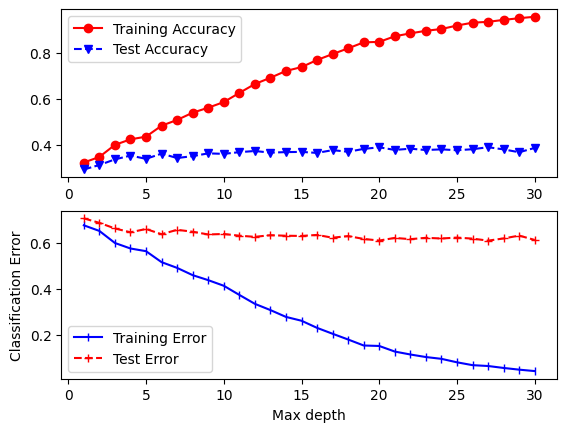

In [170]:
## Plot training and testing results with respect to max depth

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(max_depths , trainAcc , 'ro-' , max_depths , testAcc,'bv--')
ax2.plot(max_depths , trainErr , 'b|-' , max_depths , testErr,'r+--')

ax1.legend(['Training Accuracy','Test Accuracy'])
ax2.legend(['Training Error','Test Error'])

## Here we can see that when max depth between range 12 to 17, it's much generalized
plt.xlabel('Max depth')
plt.ylabel('Classification Error')
plt.show()

In [171]:
RF_clf = Pipeline([
     ('tfidf', TfidfVectorizer()),
     ('RF', RandomForestClassifier())
])

# Create the parameter grid
RF_params_poss = {
                   'RF__n_estimators'      : [100, 200, 300, 400, 500, 600]                ,
                   'RF__criterion'         : ["gini", "entropy" , "log_loss"]              ,
                   'RF__max_depth'         : [1,  2,  3,  4,  5,  6,  7,  8,  9,  10]      ,
                   'RF__min_samples_split' : [2, 3, 4, 5]
                  }

# Instantiate the grid search model with non nested cross validation
grid_search_RF = GridSearchCV(estimator           = RF_clf                ,
                              param_grid          = RF_params_poss        ,
                              cv                  =  4                    ,                        ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                        ## use all processors to conduct the search
                              verbose             =  1                    ,                        ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [172]:
%%time
grid_search_RF.fit(X_train, y_train)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits
CPU times: user 18.2 s, sys: 5.52 s, total: 23.8 s
Wall time: 19min 34s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('RF', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RF__criterion': ['gini', 'entropy', 'log_loss'],
                         'RF__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'RF__min_samples_split': [2, 3, 4, 5],
                         'RF__n_estimators': [100, 200, 300, 400, 500, 600]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [173]:
## Get the best parameters
RF_params = grid_search_RF.best_params_
RF_params

{'RF__criterion': 'gini',
 'RF__max_depth': 10,
 'RF__min_samples_split': 3,
 'RF__n_estimators': 600}

In [174]:
RF_clf = Pipeline([
                  ('tfidf', TfidfVectorizer()),
                  ('RF', RandomForestClassifier(n_estimators      = 600        ,
                                                criterion         = 'gini'     ,
                                                max_depth         = 10         ,
                                                min_samples_split = 3          ,
                                                oob_score         = True))
                  ])

RF_clf.fit(X_train, y_train)

RF_y_train_pred   = RF_clf.predict(X_train)
RF_y_test_pred    = RF_clf.predict(X_test)

# Training set performance
RF_train_accuracy = accuracy_score(y_train, RF_y_train_pred)                         # Calculate Accuracy
RF_train_f1       = f1_score(y_train, RF_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
RF_test_accuracy  = accuracy_score(y_test, RF_y_test_pred)                           # Calculate Accuracy
RF_test_f1        = f1_score(y_test , RF_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("RF Train Accuracy: {:.4f}".format(RF_train_accuracy))
print("RF Train F1 Score: {:.4f}".format(RF_train_f1))
print('RF Test Accuracy:  {:.4f}'.format(RF_test_accuracy))
print('RF Test F1 Score:  {:.4f}'.format(RF_test_f1))

print(classification_report(y_test, RF_y_test_pred))

RF Train Accuracy: 0.6629
RF Train F1 Score: 0.6508
RF Test Accuracy:  0.4003
RF Test F1 Score:  0.3644
              precision    recall  f1-score   support

           0       0.44      0.68      0.53       600
           1       0.35      0.21      0.26       600
           2       0.29      0.09      0.14       600
           3       0.34      0.36      0.35       600
           4       0.45      0.66      0.53       600

    accuracy                           0.40      3000
   macro avg       0.37      0.40      0.36      3000
weighted avg       0.37      0.40      0.36      3000



In [175]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [176]:
## define random forest for cross validation
RF_clf = Pipeline([
     ('tfidf', TfidfVectorizer()),
     ('RF', RandomForestClassifier(oob_score = True))
])

RF_params_poss = {
                   'RF__n_estimators'      : [300]          ,
                   'RF__criterion'         : ["gini"]       ,
                   'RF__max_depth'         : [10]           ,
                   'RF__min_samples_split' : [2]
                  }

# Nested CV with parameter optimization
RF_cv_clf = GridSearchCV(estimator           = RF_clf                ,
                         param_grid          = RF_params_poss        ,
                         cv                  = inner_cv              ,
                         n_jobs              =-1                     ,        ## use all processors to conduct the search
                         verbose             = 1                     ,
                         return_train_score  = True                  ,
                         error_score         = "raise")                       ## Print out the GridSearch output

scores_rf = cross_validate(estimator          = RF_cv_clf ,
                           X                  = X         ,
                           y                  = y         ,
                           cv                 = outer_cv  ,
                           scoring            = scoring   ,   ## give scoring metrics at the time of cross validation
                           return_train_score = True      ,
                           return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_rf['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_rf['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_rf['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_rf['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.6588
Train F1 Score: 0.6467
Test Accuracy: 0.4014
Test F1 Score: 0.3654


In [177]:
# Random Forest
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_rf        = np.mean(scores_rf['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_rf_err    = 1 - model_test_balanced_accuracy_rf                         # Calculate balanced accuracy error
model_test_accuracy_rf                 = np.mean(scores_rf['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_rf_err             = 1 - model_test_accuracy_rf                                  # Calculate Accuracy error
model_test_f1_rf                       = np.mean(scores_rf['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_rf_err                   = 1 - model_test_f1_rf                                        # Calculate F1-score error
model_test_precision_weighted_rf       = np.mean(scores_rf['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_rf_err   = 1 - model_test_precision_weighted_rf                        # Calculate Precision Weighted error
model_test_precision_macro_rf          = np.mean(scores_rf['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_rf_err      = 1 - model_test_precision_macro_rf                           # Calculate Precision Macro error
model_test_recall_weighted_rf          = np.mean(scores_rf['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_rf_err      = 1 - model_test_recall_weighted_rf                           # Calculate Recall Weighted error
model_test_recall_macro_rf             = np.mean(scores_rf['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_rf_err         = 1 - model_test_recall_macro_rf                              # Calculate Recall macro error

print('Random Forest performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_rf) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_rf_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_rf) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_rf_err))
print('- F1 score: {:.4f}'.format(model_test_f1_rf) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_rf_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_rf) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_rf_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_rf) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_rf_err))
print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_rf) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_rf_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_rf) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_rf_err))

Random Forest performance for test only after nested cross validation
- Balanced Accuracy: 0.4023 || Balanced Accuracy Error: 0.5977
- Accuracy: 0.4014 || Accuracy Error: 0.5986
- F1 score: 0.3654 || F1 score Error: 0.6346
- Precision Weighted: 0.3813 || Precision Weighted Error: 0.6187
- Precision macro: 0.3809 || Precision macro Error: 0.6191
- Recall Weighted: 0.4014 || Recall Weighted Error: 0.5986
- Recall macro: 0.4023 || Recall macro Error: 0.5977


#### **MultinomialNB**

In [178]:
NB_clf  = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('NB', MultinomialNB())
                   ])

NB_clf.fit(X_train, y_train)

NB_y_train_pred   = NB_clf.predict(X_train)
NB_y_test_pred    = NB_clf.predict(X_test)

# Training set performance
NB_train_accuracy = accuracy_score(y_train, NB_y_train_pred)                         # Calculate Accuracy
NB_train_f1       = f1_score(y_train, NB_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
NB_test_accuracy  = accuracy_score(y_test, NB_y_test_pred)                            # Calculate Accuracy
NB_test_f1        = f1_score(y_test , NB_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("NB Train Accuracy: {:.4f}".format(NB_train_accuracy))
print("NB Train F1 Score: {:.4f}".format(NB_train_f1))
print('NB Test Accuracy: {:.4f}'.format(NB_test_accuracy))
print('NB Test F1 Score: {:.4f}'.format(NB_test_f1))

print(classification_report(y_test, NB_y_test_pred))

NB Train Accuracy: 0.7305
NB Train F1 Score: 0.7274
NB Test Accuracy: 0.4240
NB Test F1 Score: 0.4125
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       600
           1       0.37      0.32      0.34       600
           2       0.29      0.17      0.22       600
           3       0.35      0.47      0.40       600
           4       0.53      0.56      0.55       600

    accuracy                           0.42      3000
   macro avg       0.41      0.42      0.41      3000
weighted avg       0.41      0.42      0.41      3000



In [179]:
alpha_values = [10**-i for i in range(5)] + [5*10**-i for i in range(5)]  # define log-scale range of learning rate to search as a first guess
alpha_values.sort()
alpha_values

[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]

In [180]:
trainAcc, valAcc  = np.zeros(len(alpha_values)), np.zeros(len(alpha_values))
trainErr, valErr  = np.zeros(len(alpha_values)), np.zeros(len(alpha_values))

## loop through a list of learning rate initializations, and then score both train and test results
for index, α in enumerate(alpha_values):

  NB_clf  = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('NB', MultinomialNB(alpha = α))
                   ])

  NB_clf.fit(X_train, y_train)

  Y_predTrain     = NB_clf.predict(X_train)
  Y_predVal       = NB_clf.predict(X_val)

  trainAcc[index] = f1_score(y_train, Y_predTrain , average = 'weighted')
  valAcc[index]   = f1_score(y_val  , Y_predVal   , average = 'weighted')

  trainErr[index] = 1-f1_score(y_train, Y_predTrain , average = 'weighted')
  valErr[index]   = 1-f1_score(y_val, Y_predVal , average = 'weighted')

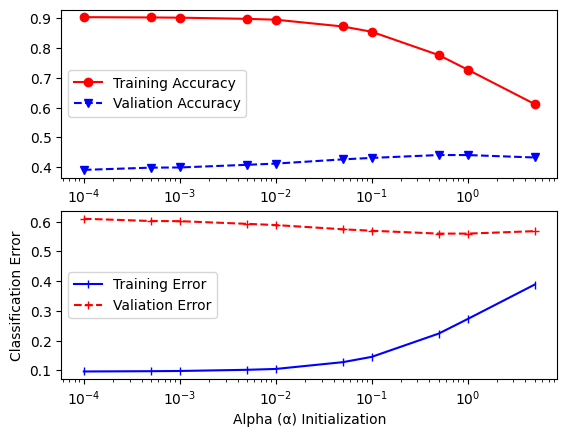

In [181]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(alpha_values,trainAcc,'ro-',alpha_values,valAcc,'bv--')
ax2.plot(alpha_values,trainErr,'b|-',alpha_values,valErr,'r+--')

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Alpha (α) Initialization')
plt.ylabel('Classification Error')
plt.show()

In [182]:
desc_indx = valAcc.argsort()[::-1]
for indx,i in enumerate(desc_indx[:5]):
  print(f"{indx+1}th max validation accuracy of {valAcc[i]*100:.2f}% with α={alpha_values[i]:.2f} with difference of {(trainAcc[i] - valAcc[i])*100:0.2f}%")

1th max validation accuracy of 44.02% with α=1.00 with difference of 28.72%
2th max validation accuracy of 44.02% with α=0.50 with difference of 33.61%
3th max validation accuracy of 43.20% with α=5.00 with difference of 17.95%
4th max validation accuracy of 43.06% with α=0.10 with difference of 42.41%
5th max validation accuracy of 42.57% with α=0.05 with difference of 44.68%


In [183]:
alpha_values = np.linspace(10**-2,10**1,20) # we define a linear sclare to search for the best alpha linearly in the most promising interval [10^-2, 10^0]
alpha_values

array([ 0.01      ,  0.53578947,  1.06157895,  1.58736842,  2.11315789,
        2.63894737,  3.16473684,  3.69052632,  4.21631579,  4.74210526,
        5.26789474,  5.79368421,  6.31947368,  6.84526316,  7.37105263,
        7.89684211,  8.42263158,  8.94842105,  9.47421053, 10.        ])

In [184]:
trainAcc, valAcc  = np.zeros(len(alpha_values)), np.zeros(len(alpha_values))
trainErr, valErr  = np.zeros(len(alpha_values)), np.zeros(len(alpha_values))

## loop through a list of learning rate initializations, and then score both train and test results
for index, α in enumerate(alpha_values):

  NB_clf  = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('NB', MultinomialNB(alpha = α))
                   ])

  NB_clf.fit(X_train, y_train)

  Y_predTrain     = NB_clf.predict(X_train)
  Y_predVal       = NB_clf.predict(X_val)

  trainAcc[index] = f1_score(y_train, Y_predTrain , average = 'weighted')
  valAcc[index]   = f1_score(y_val  , Y_predVal   , average = 'weighted')

  trainErr[index] = 1-f1_score(y_train, Y_predTrain , average = 'weighted')
  valErr[index]   = 1-f1_score(y_val, Y_predVal , average = 'weighted')

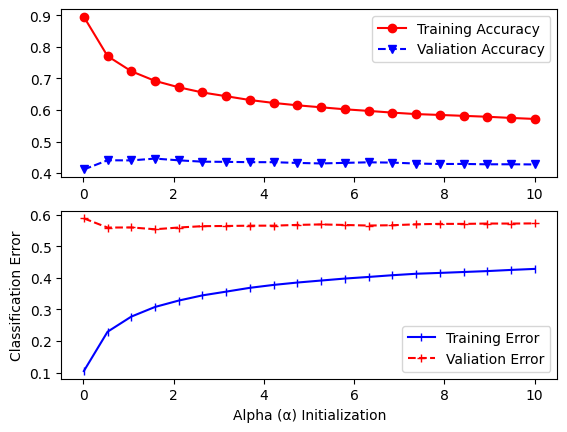

In [185]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(alpha_values,trainAcc,'ro-',alpha_values,valAcc,'bv--')
ax2.plot(alpha_values,trainErr,'b|-',alpha_values,valErr,'r+--')

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Alpha (α) Initialization')
plt.ylabel('Classification Error')
plt.show()

In [186]:
desc_indx = valAcc.argsort()[::-1]
for indx,i in enumerate(desc_indx[:5]):
  print(f"{indx+1}th max validation accuracy of {valAcc[i]*100:.2f}% with α={alpha_values[i]:.2f} with difference of {(trainAcc[i] - valAcc[i])*100:0.2f}%")

1th max validation accuracy of 44.60% with α=1.59 with difference of 24.62%
2th max validation accuracy of 44.07% with α=0.54 with difference of 33.00%
3th max validation accuracy of 44.05% with α=2.11 with difference of 23.14%
4th max validation accuracy of 44.02% with α=1.06 with difference of 28.25%
5th max validation accuracy of 43.62% with α=2.64 with difference of 21.92%


In [187]:
top_5_alpha_values = alpha_values[desc_indx[:5]]
top_5_alpha_values

array([1.58736842, 0.53578947, 2.11315789, 1.06157895, 2.63894737])

In [188]:
# define the prior distribution based on the inverse of the results trying to enhance it
prior = 1-np.array([0.56, 0.34, 0.22, 0.40, 0.55])
prior = prior/prior.sum()
prior

array([0.15017065, 0.22525597, 0.2662116 , 0.20477816, 0.15358362])

In [189]:
NB_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()),
                   ('NB', MultinomialNB())
])

# Create the parameter grid
NB_params_poss = {
                   'NB__alpha'       : top_5_alpha_values ,
                   'NB__fit_prior'   : [True, False]      ,
                   'NB__class_prior' : [None, prior]
                  }

# Instantiate the grid search model with non nested cross validation
grid_search_NB = GridSearchCV(estimator           = NB_clf                ,
                              param_grid          = NB_params_poss        ,
                              cv                  =  4                    ,                        ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                        ## use all processors to conduct the search
                              verbose             =  1                    ,                        ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [190]:
%%time
grid_search_NB.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
CPU times: user 683 ms, sys: 160 ms, total: 843 ms
Wall time: 9.11 s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('NB', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'NB__alpha': array([1.58736842, 0.53578947, 2.11315789, 1.06157895, 2.63894737]),
                         'NB__class_prior': [None,
                                             array([0.15017065, 0.22525597, 0.2662116 , 0.20477816, 0.15358362])],
                         'NB__fit_prior': [True, False]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [191]:
## Get the best parameters
NB_params = grid_search_NB.best_params_
NB_params

{'NB__alpha': 1.5873684210526318,
 'NB__class_prior': None,
 'NB__fit_prior': True}

In [192]:
NB_clf  = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('NB', MultinomialNB(alpha = 1.5873684210526318 , fit_prior = True, class_prior = None))
                   ])

NB_clf.fit(X_train, y_train)

NB_y_train_pred   = NB_clf.predict(X_train)
NB_y_test_pred    = NB_clf.predict(X_test)

# Training set performance
NB_train_accuracy = accuracy_score(y_train, NB_y_train_pred)                         # Calculate Accuracy
NB_train_f1       = f1_score(y_train, NB_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
NB_test_accuracy  = accuracy_score(y_test, NB_y_test_pred)                            # Calculate Accuracy
NB_test_f1        = f1_score(y_test , NB_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("NB Train Accuracy: {:.4f}".format(NB_train_accuracy))
print("NB Train F1 Score: {:.4f}".format(NB_train_f1))
print('NB Test Accuracy: {:.4f}'.format(NB_test_accuracy))
print('NB Test F1 Score: {:.4f}'.format(NB_test_f1))

print(classification_report(y_test, NB_y_test_pred))

NB Train Accuracy: 0.6967
NB Train F1 Score: 0.6922
NB Test Accuracy: 0.4240
NB Test F1 Score: 0.4116
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       600
           1       0.37      0.31      0.34       600
           2       0.30      0.17      0.22       600
           3       0.34      0.47      0.40       600
           4       0.53      0.55      0.54       600

    accuracy                           0.42      3000
   macro avg       0.41      0.42      0.41      3000
weighted avg       0.41      0.42      0.41      3000



In [193]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [194]:
## define random forest for cross validation
NB_clf = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('NB', MultinomialNB())
])

NB_params_poss = {
                   'NB__alpha'             : [1.5873684210526318]       ,
                   'NB__fit_prior'         : [True]                     ,
                   'NB__class_prior'       : [None]
                  }

# Nested CV with parameter optimization
NB_cv_clf = GridSearchCV(estimator           = NB_clf                ,
                         param_grid          = NB_params_poss        ,
                         cv                  = inner_cv              ,
                         n_jobs              =-1                     ,        ## use all processors to conduct the search
                         verbose             = 1                     ,
                         return_train_score  = True                  ,
                         error_score         = "raise")                       ## Print out the GridSearch output

scores_NB = cross_validate(estimator          = NB_cv_clf ,
                           X                  = X         ,
                           y                  = y         ,
                           cv                 = outer_cv  ,
                           scoring            = scoring   ,   ## give scoring metrics at the time of cross validation
                           return_train_score = True      ,
                           return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_NB['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_NB['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_NB['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_NB['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.6981
Train F1 Score: 0.6935
Test Accuracy: 0.4353
Test F1 Score: 0.4219


In [195]:
# NB
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_NB        = np.mean(scores_NB['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_NB_err    = 1 - model_test_balanced_accuracy_NB                         # Calculate balanced accuracy error
model_test_accuracy_NB                 = np.mean(scores_NB['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_NB_err             = 1 - model_test_accuracy_NB                                  # Calculate Accuracy error
model_test_f1_NB                       = np.mean(scores_NB['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_NB_err                   = 1 - model_test_f1_NB                                        # Calculate F1-score error
model_test_precision_weighted_NB       = np.mean(scores_NB['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_NB_err   = 1 - model_test_precision_weighted_NB                        # Calculate Precision Weighted error
model_test_precision_macro_NB          = np.mean(scores_NB['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_NB_err      = 1 - model_test_precision_macro_NB                           # Calculate Precision Macro error
model_test_recall_weighted_NB          = np.mean(scores_NB['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_NB_err      = 1 - model_test_recall_weighted_NB                           # Calculate Recall Weighted error
model_test_recall_macro_NB             = np.mean(scores_NB['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_NB_err         = 1 - model_test_recall_macro_NB                              # Calculate Recall macro error

print('NB performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_NB) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_NB_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_NB) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_NB_err))
print('- F1 score: {:.4f}'.format(model_test_f1_NB) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_NB_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_NB) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_NB_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_NB) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_NB_err))
print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_NB) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_NB_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_NB) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_NB_err))

NB performance for test only after nested cross validation
- Balanced Accuracy: 0.4360 || Balanced Accuracy Error: 0.5640
- Accuracy: 0.4353 || Accuracy Error: 0.5647
- F1 score: 0.4219 || F1 score Error: 0.5781
- Precision Weighted: 0.4244 || Precision Weighted Error: 0.5756
- Precision macro: 0.4241 || Precision macro Error: 0.5759
- Recall Weighted: 0.4353 || Recall Weighted Error: 0.5647
- Recall macro: 0.4360 || Recall macro Error: 0.5640


#### **LogisticRegression**

In [196]:
LR_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('LR'   , LogisticRegression(max_iter=500))
])

LR_clf.fit(X_train, y_train)

LR_y_train_pred   = LR_clf.predict(X_train)
LR_y_test_pred    = LR_clf.predict(X_test)

# Training set performance
LR_train_accuracy = accuracy_score(y_train, LR_y_train_pred)                         # Calculate Accuracy
LR_train_f1       = f1_score(y_train, LR_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
LR_test_accuracy  = accuracy_score(y_test, LR_y_test_pred)                            # Calculate Accuracy
LR_test_f1        = f1_score(y_test , LR_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("LR Train Accuracy: {:.4f}".format(LR_train_accuracy))
print("LR Train F1 Score: {:.4f}".format(LR_train_f1))
print('LR Test Accuracy: {:.4f}'.format(LR_test_accuracy))
print('LR Test F1 Score: {:.4f}'.format(LR_test_f1))

print(classification_report(y_test, LR_y_test_pred))

LR Train Accuracy: 0.7658
LR Train F1 Score: 0.7646
LR Test Accuracy: 0.4213
LR Test F1 Score: 0.4170
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       600
           1       0.35      0.32      0.34       600
           2       0.31      0.28      0.29       600
           3       0.36      0.36      0.36       600
           4       0.52      0.57      0.55       600

    accuracy                           0.42      3000
   macro avg       0.41      0.42      0.42      3000
weighted avg       0.41      0.42      0.42      3000



In [197]:
C_init_values = [10**-i for i in range(5)] + [5*10**-i for i in range(5)]  # define log-scale range of learning rate to search as a first guess
C_init_values.sort()
C_init_values

[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]

In [198]:
trainAcc, valAcc  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))
trainErr, valErr  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))

## loop through a list of learning rate initializations, and then score both train and test results
for index, c_val in enumerate(C_init_values):

  LR_clf = Pipeline([
                        ('tfidf', TfidfVectorizer()),
                        ('LR'   , LogisticRegression(C= c_val, max_iter=500))
                    ])

  LR_clf.fit(X_train, y_train)

  Y_predTrain     = LR_clf.predict(X_train)
  Y_predVal       = LR_clf.predict(X_val)

  trainAcc[index] = f1_score(y_train   , Y_predTrain , average = 'weighted')
  valAcc[index]   = f1_score(y_val     , Y_predVal   , average = 'weighted')

  trainErr[index] = 1-f1_score(y_train , Y_predTrain , average = 'weighted')
  valErr[index]   = 1-f1_score(y_val   , Y_predVal   , average = 'weighted')

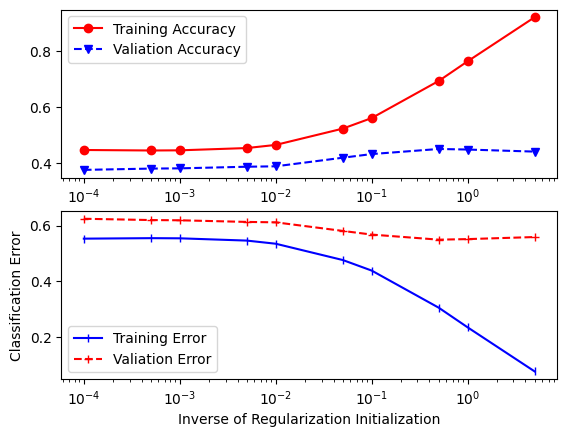

In [199]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(C_init_values,trainAcc,'ro-',C_init_values,valAcc,'bv--')
ax2.plot(C_init_values,trainErr,'b|-',C_init_values,valErr,'r+--')

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Inverse of Regularization Initialization')
plt.ylabel('Classification Error')
plt.show()

In [200]:
C_init_values = np.linspace(10**-2,10**0,20) # we define a linear sclare to search for the best C linearly in the most promising interval [10^-2, 10^0]
C_init_values

array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])

In [201]:
trainAcc, valAcc  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))
trainErr, valErr  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))

## loop through a list of learning rate initializations, and then score both train and test results
for index, c_val in enumerate(C_init_values):

  LR_clf = Pipeline([
                        ('tfidf', TfidfVectorizer()),
                        ('LR'   , LogisticRegression(C= c_val, max_iter=500))
                    ])

  LR_clf.fit(X_train, y_train)

  Y_predTrain     = LR_clf.predict(X_train)
  Y_predVal       = LR_clf.predict(X_val)

  trainAcc[index] = f1_score(y_train   , Y_predTrain , average = 'weighted')
  valAcc[index]   = f1_score(y_val     , Y_predVal   , average = 'weighted')

  trainErr[index] = 1-f1_score(y_train , Y_predTrain , average = 'weighted')
  valErr[index]   = 1-f1_score(y_val   , Y_predVal   , average = 'weighted')

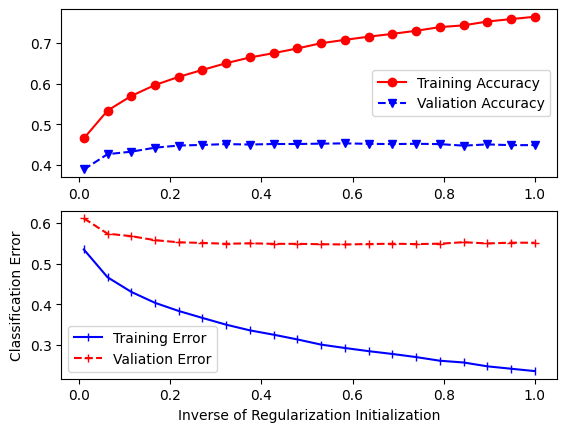

In [202]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(C_init_values,trainAcc,'ro-',C_init_values,valAcc,'bv--')
ax2.plot(C_init_values,trainErr,'b|-',C_init_values,valErr,'r+--')

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Inverse of Regularization Initialization')
plt.ylabel('Classification Error')
plt.show()

In [203]:
desc_indx = valAcc.argsort()[::-1]
for indx,i in enumerate(desc_indx[:5]):
  print(f"{indx+1}th max validation accuracy of {valAcc[i]*100:.2f}% with C={C_init_values[i]:.2f} with difference of {(trainAcc[i] - valAcc[i])*100:0.2f}%")

1th max validation accuracy of 45.29% with C=0.58 with difference of 25.49%
2th max validation accuracy of 45.22% with C=0.53 with difference of 24.73%
3th max validation accuracy of 45.19% with C=0.74 with difference of 27.82%
4th max validation accuracy of 45.18% with C=0.64 with difference of 26.37%
5th max validation accuracy of 45.14% with C=0.43 with difference of 22.37%


In [204]:
top_5_C_values = C_init_values[desc_indx[:5]]
top_5_C_values

array([0.58315789, 0.53105263, 0.73947368, 0.63526316, 0.42684211])

In [205]:
LR_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()),
                   ('LR', LogisticRegression(max_iter=500))
])

# Create the parameter grid
LR_params_poss = {
                   'LR__C':           top_5_C_values         ,
                   'LR__penalty':     ['l2']
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_LR = GridSearchCV(estimator           = LR_clf                ,
                              param_grid          = LR_params_poss        ,
                              cv                  =  4                    ,                        ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                        ## use all processors to conduct the search
                              verbose             =  1                    ,                        ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [206]:
%%time
grid_search_LR.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
CPU times: user 2min, sys: 21.3 s, total: 2min 22s
Wall time: 34.3 s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('LR',
                                        LogisticRegression(max_iter=500))]),
             n_jobs=-1,
             param_grid={'LR__C': array([0.58315789, 0.53105263, 0.73947368, 0.63526316, 0.42684211]),
                         'LR__penalty': ['l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [207]:
## Get the best parameters
LR_params = grid_search_LR.best_params_
LR_params

{'LR__C': 0.6352631578947369, 'LR__penalty': 'l2'}

In [208]:
LR_clf  = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('LR', LogisticRegression(C = 0.6352631578947369 , max_iter = 500 , penalty = 'l2'))
                   ])

LR_clf.fit(X_train, y_train)

LR_y_train_pred   = LR_clf.predict(X_train)
LR_y_test_pred    = LR_clf.predict(X_test)

# Training set performance
LR_train_accuracy = accuracy_score(y_train, LR_y_train_pred)                         # Calculate Accuracy
LR_train_f1       = f1_score(y_train, LR_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
LR_test_accuracy  = accuracy_score(y_test, LR_y_test_pred)                            # Calculate Accuracy
LR_test_f1        = f1_score(y_test , LR_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("LR Train Accuracy: {:.4f}".format(LR_train_accuracy))
print("LR Train F1 Score: {:.4f}".format(LR_train_f1))
print('LR Test Accuracy: {:.4f}'.format(LR_test_accuracy))
print('LR Test F1 Score: {:.4f}'.format(LR_test_f1))

print(classification_report(y_test, LR_y_test_pred))

LR Train Accuracy: 0.7178
LR Train F1 Score: 0.7156
LR Test Accuracy: 0.4293
LR Test F1 Score: 0.4236
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       600
           1       0.36      0.32      0.34       600
           2       0.33      0.28      0.30       600
           3       0.37      0.38      0.37       600
           4       0.52      0.57      0.54       600

    accuracy                           0.43      3000
   macro avg       0.42      0.43      0.42      3000
weighted avg       0.42      0.43      0.42      3000



In [284]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [209]:
## define random forest for cross validation
LR_clf = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('LR', LogisticRegression())
])

LR_params_poss = {
                   'LR__max_iter':    [500]                  ,
                   'LR__C':           [0.6352631578947369]   ,
                   'LR__penalty':     ['l2']
                  }

# Nested CV with parameter optimization
LR_cv_clf = GridSearchCV(estimator           = LR_clf                ,
                         param_grid          = LR_params_poss        ,
                         cv                  = inner_cv              ,
                         n_jobs              =-1                     ,        ## use all processors to conduct the search
                         verbose             = 1                     ,
                         return_train_score  = True                  ,
                         error_score         = "raise")                       ## Print out the GridSearch output

scores_LR = cross_validate(estimator          = LR_cv_clf ,
                           X                  = X         ,
                           y                  = y         ,
                           cv                 = outer_cv  ,
                           scoring            = scoring   ,   ## give scoring metrics at the time of cross validation
                           return_train_score = True      ,
                           return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_LR['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_LR['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_LR['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_LR['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.7143
Train F1 Score: 0.7120
Test Accuracy: 0.4442
Test F1 Score: 0.4376


In [210]:
# LR
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_LR        = np.mean(scores_LR['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_LR_err    = 1 - model_test_balanced_accuracy_LR                         # Calculate balanced accuracy error
model_test_accuracy_LR                 = np.mean(scores_LR['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_LR_err             = 1 - model_test_accuracy_LR                                  # Calculate Accuracy error
model_test_f1_LR                       = np.mean(scores_LR['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_LR_err                   = 1 - model_test_f1_LR                                        # Calculate F1-score error
model_test_precision_weighted_LR       = np.mean(scores_LR['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_LR_err   = 1 - model_test_precision_weighted_LR                        # Calculate Precision Weighted error
model_test_precision_macro_LR          = np.mean(scores_LR['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_LR_err      = 1 - model_test_precision_macro_LR                           # Calculate Precision Macro error
model_test_recall_weighted_LR          = np.mean(scores_LR['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_LR_err      = 1 - model_test_recall_weighted_LR                           # Calculate Recall Weighted error
model_test_recall_macro_LR             = np.mean(scores_LR['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_LR_err         = 1 - model_test_recall_macro_LR                              # Calculate Recall macro error

print('LR performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_LR) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_LR_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_LR) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_LR_err))
print('- F1 score: {:.4f}'.format(model_test_f1_LR) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_LR_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_LR) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_LR_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_LR) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_LR_err))
#print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_LR) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_LR_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_LR) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_LR_err))

LR performance for test only after nested cross validation
- Balanced Accuracy: 0.4444 || Balanced Accuracy Error: 0.5556
- Accuracy: 0.4442 || Accuracy Error: 0.5558
- F1 score: 0.4376 || F1 score Error: 0.5624
- Precision Weighted: 0.4349 || Precision Weighted Error: 0.5651
- Precision macro: 0.4349 || Precision macro Error: 0.5651
- Recall macro: 0.4444 || Recall macro Error: 0.5556


#### **SVM**

In [211]:
SVM_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('SVM'  , SVC(random_state = 42))
])

SVM_clf.fit(X_train, y_train)

SVM_y_train_pred   = SVM_clf.predict(X_train)
SVM_y_test_pred    = SVM_clf.predict(X_test)

# Training set performance
SVM_train_accuracy = accuracy_score(y_train, SVM_y_train_pred)                         # Calculate Accuracy
SVM_train_f1       = f1_score(y_train, SVM_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
SVM_test_accuracy  = accuracy_score(y_test, SVM_y_test_pred)                            # Calculate Accuracy
SVM_test_f1        = f1_score(y_test , SVM_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("SVM Train Accuracy: {:.4f}".format(SVM_train_accuracy))
print("SVM Train F1 Score: {:.4f}".format(SVM_train_f1))
print('SVM Test Accuracy: {:.4f}'.format(SVM_test_accuracy))
print('SVM Test F1 Score: {:.4f}'.format(SVM_test_f1))

print(classification_report(y_test, SVM_y_test_pred))

SVM Train Accuracy: 0.9661
SVM Train F1 Score: 0.9662
SVM Test Accuracy: 0.4390
SVM Test F1 Score: 0.4383
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       600
           1       0.36      0.35      0.36       600
           2       0.34      0.32      0.33       600
           3       0.39      0.41      0.40       600
           4       0.56      0.54      0.55       600

    accuracy                           0.44      3000
   macro avg       0.44      0.44      0.44      3000
weighted avg       0.44      0.44      0.44      3000



In [212]:
SVM_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()),
                   ('SVM', SVC(random_state = 42))
])

# Create the parameter grid
SVM_params_poss = {
                   'SVM__kernel' : ['linear', 'rbf', 'sigmoid']   ,
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_SVM = GridSearchCV(estimator           = SVM_clf               ,
                              param_grid          = SVM_params_poss       ,
                              cv                  =  4                    ,                        ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                        ## use all processors to conduct the search
                              verbose             =  1                    ,                        ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average ='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [213]:
%%time
grid_search_SVM.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
CPU times: user 1min 12s, sys: 1.88 s, total: 1min 14s
Wall time: 3min 58s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('SVM', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'SVM__kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [214]:
## Get the best parameters
SVM_params = grid_search_SVM.best_params_
SVM_params

{'SVM__kernel': 'rbf'}

In [215]:
SVM_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()),
                   ('SVM', SVC(kernel='rbf' , random_state = 42))
])

# Create the parameter grid
SVM_params_poss = {
                   'SVM__gamma' : ['scale', 'auto']   ,
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_SVM = GridSearchCV(estimator          = SVM_clf               ,
                              param_grid          = SVM_params_poss       ,
                              cv                  =  4                    ,                         ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                         ## use all processors to conduct the search
                              verbose             =  1                    ,                         ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average ='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [216]:
%%time
grid_search_SVM.fit(X_train, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
CPU times: user 1min 10s, sys: 1.6 s, total: 1min 12s
Wall time: 4min


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('SVM', SVC(random_state=42))]),
             n_jobs=-1, param_grid={'SVM__gamma': ['scale', 'auto']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [217]:
## Get the best parameters
SVM_params = grid_search_SVM.best_params_
SVM_params

{'SVM__gamma': 'scale'}

In [141]:
SVM_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()),
                   ('SVM', SVC(kernel='rbf', gamma='scale' , random_state = 42))
])

# Create the parameter grid
SVM_params_poss = {
                   'SVM__decision_function_shape' : ['ovo', 'ovr']   ,
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_SVM = GridSearchCV(estimator          = SVM_clf               ,
                              param_grid          = SVM_params_poss       ,
                              cv                  =  4                    ,                        ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                        ## use all processors to conduct the search
                              verbose             =  1                    ,                        ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average ='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [142]:
%%time
grid_search_SVM.fit(X_train, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
CPU times: user 8min 12s, sys: 1.32 s, total: 8min 13s
Wall time: 14min 50s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('SVM', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'SVM__decision_function_shape': ['ovo', 'ovr']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [143]:
## Get the best parameters
SVM_params = grid_search_SVM.best_params_
SVM_params

{'SVM__decision_function_shape': 'ovo'}

In [218]:
SVM_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('SVM'  , SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo' , random_state = 42))
])

SVM_clf.fit(X_train, y_train)

SVM_y_train_pred   = SVM_clf.predict(X_train)
SVM_y_test_pred    = SVM_clf.predict(X_test)

# Training set performance
SVM_train_accuracy = accuracy_score(y_train, SVM_y_train_pred)                          # Calculate Accuracy
SVM_train_f1       = f1_score(y_train, SVM_y_train_pred , average='weighted')           # Calculate F1 score

# Test set performance
SVM_test_accuracy  = accuracy_score(y_test, SVM_y_test_pred)                            # Calculate Accuracy
SVM_test_f1        = f1_score(y_test , SVM_y_test_pred , average = 'weighted')          # Calculate F1 score

## The score
print("SVM Train Accuracy: {:.4f}".format(SVM_train_accuracy))
print("SVM Train F1 Score: {:.4f}".format(SVM_train_f1))
print('SVM Test Accuracy: {:.4f}'.format(SVM_test_accuracy))
print('SVM Test F1 Score: {:.4f}'.format(SVM_test_f1))

print(classification_report(y_test, SVM_y_test_pred))

SVM Train Accuracy: 0.9661
SVM Train F1 Score: 0.9662
SVM Test Accuracy: 0.4390
SVM Test F1 Score: 0.4383
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       600
           1       0.36      0.35      0.36       600
           2       0.34      0.32      0.33       600
           3       0.39      0.41      0.40       600
           4       0.56      0.54      0.55       600

    accuracy                           0.44      3000
   macro avg       0.44      0.44      0.44      3000
weighted avg       0.44      0.44      0.44      3000



In [219]:
C_init_values = [10**-i for i in range(5)] + [5*10**-i for i in range(5)]  # define log-scale range of learning rate to search as a first guess
C_init_values.sort()
C_init_values

[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]

In [220]:
train_score, val_score  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))
train_error, val_error  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))

## loop through a list of regularization initializations, and then score both train and test results
for index, c_val in enumerate(C_init_values):

  SVM_clf = Pipeline([
                        ('tfidf', TfidfVectorizer()),
                        ('SVM'  , SVC(C = c_val , kernel='rbf', gamma='scale', decision_function_shape='ovo' , random_state = 42))
                    ])

  SVM_clf.fit(X_train, y_train)

  Y_predTrain        = SVM_clf.predict(X_train)
  Y_predVal          = SVM_clf.predict(X_val)

  train_score[index] = f1_score(y_train, Y_predTrain  , average = 'weighted')
  val_score[index]   = f1_score(y_val  , Y_predVal ,  average = 'weighted')

  train_error[index] = 1-train_score[index]
  val_error[index]   = 1-val_score[index]

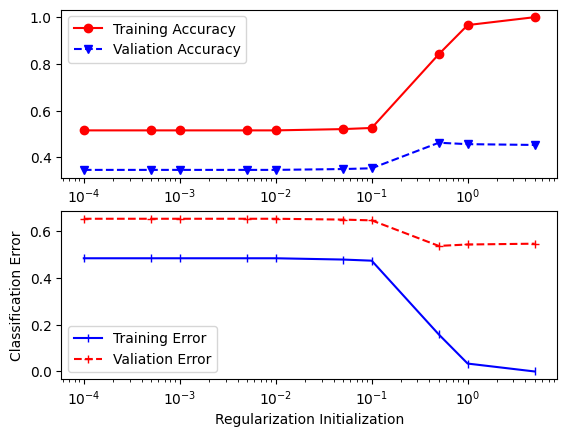

In [221]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(C_init_values,train_score,'ro-',C_init_values,val_score,'bv--')
ax2.plot(C_init_values,train_error,'b|-',C_init_values,val_error,'r+--')

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Regularization Initialization')
plt.ylabel('Classification Error')
plt.show()

In [222]:
desc_indx = val_score.argsort()[::-1]
for indx,i in enumerate(desc_indx):
  print(f"{indx+1}th max validation score of {val_score[i]*100:.2f}% with C={C_init_values[i]:.2f} with difference of {(train_score[i] - val_score[i])*100:0.2f}%")

1th max validation score of 46.30% with C=0.50 with difference of 37.85%
2th max validation score of 45.69% with C=1.00 with difference of 50.92%
3th max validation score of 45.35% with C=5.00 with difference of 54.65%
4th max validation score of 35.37% with C=0.10 with difference of 17.24%
5th max validation score of 35.04% with C=0.05 with difference of 17.08%
6th max validation score of 34.69% with C=0.01 with difference of 16.89%
7th max validation score of 34.69% with C=0.01 with difference of 16.89%
8th max validation score of 34.69% with C=0.00 with difference of 16.89%
9th max validation score of 34.69% with C=0.00 with difference of 16.89%
10th max validation score of 34.69% with C=0.00 with difference of 16.89%


In [223]:
C_init_values = np.linspace(0.5, 5, 5)
C_init_values

array([0.5  , 1.625, 2.75 , 3.875, 5.   ])

In [224]:
train_score, val_score  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))
train_error, val_error  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))

## loop through a list of regularization initializations, and then score both train and test results
for index, c_val in enumerate(C_init_values):

  SVM_clf = Pipeline([
                        ('tfidf', TfidfVectorizer()),
                        ('SVM'  , SVC(C = c_val , kernel='rbf', gamma='scale', decision_function_shape='ovo' , random_state = 42))
                    ])

  SVM_clf.fit(X_train, y_train)

  Y_predTrain        = SVM_clf.predict(X_train)
  Y_predVal          = SVM_clf.predict(X_val)

  train_score[index] = f1_score(y_train, Y_predTrain  , average = 'weighted')
  val_score[index]   = f1_score(y_val  , Y_predVal ,  average = 'weighted')

  train_error[index] = 1-train_score[index]
  val_error[index]   = 1-val_score[index]
  print(f"Index: {index}")
  print(f"    C: {c_val}")
  print(f"Train: {train_score[index]}")
  print(f"  Val: {val_score[index]}")
  print('=='*10)

Index: 0
    C: 0.5
Train: 0.8414565666273343
  Val: 0.4629858950305588
Index: 1
    C: 1.625
Train: 0.9982856610270597
  Val: 0.45130457443593863
Index: 2
    C: 2.75
Train: 0.9999285714262938
  Val: 0.45382567940847973
Index: 3
    C: 3.875
Train: 1.0
  Val: 0.45348186921918415
Index: 4
    C: 5.0
Train: 1.0
  Val: 0.45348186921918415


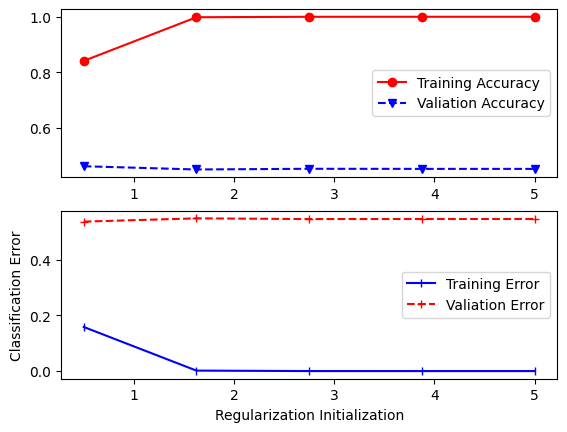

In [225]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(C_init_values,train_score,'ro-',C_init_values,val_score,'bv--')
ax2.plot(C_init_values,train_error,'b|-',C_init_values,val_error,'r+--')

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Regularization Initialization')
plt.ylabel('Classification Error')
plt.show()

In [226]:
desc_indx = val_score.argsort()[::-1]
for indx,i in enumerate(desc_indx):
  print(f"{indx+1}th max validation score of {val_score[i]*100:.2f}% with C={C_init_values[i]:.2f} with difference of {(train_score[i] - val_score[i])*100:0.2f}%")

1th max validation score of 46.30% with C=0.50 with difference of 37.85%
2th max validation score of 45.38% with C=2.75 with difference of 54.61%
3th max validation score of 45.35% with C=5.00 with difference of 54.65%
4th max validation score of 45.35% with C=3.88 with difference of 54.65%
5th max validation score of 45.13% with C=1.62 with difference of 54.70%


In [227]:
top_5_C_values = C_init_values[desc_indx[:5]]
top_5_C_values

array([0.5  , 2.75 , 5.   , 3.875, 1.625])

In [228]:
SVM_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()),
                   ('SVM', SVC(kernel = 'rbf', gamma = 'scale' , decision_function_shape = 'ovo' , random_state = 42))
])

# Create the parameter grid
SVM_params_poss = {
                   'SVM__C' : top_5_C_values   ,
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_SVM = GridSearchCV(estimator          = SVM_clf               ,
                              param_grid          = SVM_params_poss       ,
                              cv                  =  4                    ,                         ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                         ## use all processors to conduct the search
                              verbose             =  1                    ,                         ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average ='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [229]:
%%time
grid_search_SVM.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
CPU times: user 1min 14s, sys: 1.7 s, total: 1min 16s
Wall time: 7min 5s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('SVM',
                                        SVC(decision_function_shape='ovo',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVM__C': array([0.5  , 2.75 , 5.   , 3.875, 1.625])},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [231]:
## Get the best parameters
SVM_params = grid_search_SVM.best_params_
SVM_params

{'SVM__C': 1.625}

In [232]:
SVM_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('SVM'  , SVC(C = 1.625 , kernel='rbf', gamma='scale', decision_function_shape='ovo' , random_state = 42))
])

SVM_clf.fit(X_train, y_train)

SVM_y_train_pred   = SVM_clf.predict(X_train)
SVM_y_test_pred    = SVM_clf.predict(X_test)

# Training set performance
SVM_train_accuracy = accuracy_score(y_train, SVM_y_train_pred)                         # Calculate Accuracy
SVM_train_f1       = f1_score(y_train, SVM_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
SVM_test_accuracy  = accuracy_score(y_test, SVM_y_test_pred)                            # Calculate Accuracy
SVM_test_f1        = f1_score(y_test , SVM_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("SVM Train Accuracy: {:.4f}".format(SVM_train_accuracy))
print("SVM Train F1 Score: {:.4f}".format(SVM_train_f1))
print('SVM Test Accuracy: {:.4f}'.format(SVM_test_accuracy))
print('SVM Test F1 Score: {:.4f}'.format(SVM_test_f1))

print(classification_report(y_test, SVM_y_test_pred))

SVM Train Accuracy: 0.9983
SVM Train F1 Score: 0.9983
SVM Test Accuracy: 0.4293
SVM Test F1 Score: 0.4285
              precision    recall  f1-score   support

           0       0.55      0.56      0.56       600
           1       0.36      0.35      0.36       600
           2       0.33      0.31      0.32       600
           3       0.36      0.38      0.37       600
           4       0.54      0.54      0.54       600

    accuracy                           0.43      3000
   macro avg       0.43      0.43      0.43      3000
weighted avg       0.43      0.43      0.43      3000



In [233]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [234]:
## define random forest for cross validation
SVM_clf = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('SVM', SVC())
])

SVM_params_poss = {
                   'SVM__C':                       [1.625]        ,
                   'SVM__gamma':                   ['scale']      ,
                   'SVM__kernel':                  ['rbf']        ,
                   'SVM__decision_function_shape': ['ovo']        ,
#                   'SVM__probability'            : [True]         ,
                   'SVM__random_state':            [42]
                   }

# Nested CV with parameter optimization
SVM_cv_clf = GridSearchCV(estimator          = SVM_clf                ,
                         param_grid          = SVM_params_poss        ,
                         cv                  = inner_cv               ,
                         n_jobs              =-1                      ,       ## use all processors to conduct the search
                         verbose             = 1                      ,
                         return_train_score  = True                   ,
                         error_score         = "raise")                       ## Print out the GridSearch output

scores_SVM = cross_validate(estimator          = SVM_cv_clf ,
                             X                  = X         ,
                             y                  = y         ,
                             cv                 = outer_cv  ,
                             scoring            = scoring   ,   ## give scoring metrics at the time of cross validation
                             return_train_score = True      ,
                             return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_SVM['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_SVM['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_SVM['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_SVM['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.9983
Train F1 Score: 0.9983
Test Accuracy: 0.4452
Test F1 Score: 0.4431


In [235]:
# SVM
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_SVM        = np.mean(scores_SVM['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_SVM_err    = 1 - model_test_balanced_accuracy_SVM                         # Calculate balanced accuracy error
model_test_accuracy_SVM                 = np.mean(scores_SVM['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_SVM_err             = 1 - model_test_accuracy_SVM                                  # Calculate Accuracy error
model_test_f1_SVM                       = np.mean(scores_SVM['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_SVM_err                   = 1 - model_test_f1_SVM                                        # Calculate F1-score error
model_test_precision_weighted_SVM       = np.mean(scores_SVM['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_SVM_err   = 1 - model_test_precision_weighted_SVM                        # Calculate Precision Weighted error
model_test_precision_macro_SVM          = np.mean(scores_SVM['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_SVM_err      = 1 - model_test_precision_macro_SVM                           # Calculate Precision Macro error
model_test_recall_weighted_SVM          = np.mean(scores_SVM['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_SVM_err      = 1 - model_test_recall_weighted_SVM                           # Calculate Recall Weighted error
model_test_recall_macro_SVM             = np.mean(scores_SVM['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_SVM_err         = 1 - model_test_recall_macro_SVM                              # Calculate Recall macro error

print('SVM performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_SVM) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_SVM_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_SVM) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_SVM_err))
print('- F1 score: {:.4f}'.format(model_test_f1_SVM) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_SVM_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_SVM) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_SVM_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_SVM) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_SVM_err))
print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_SVM) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_SVM_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_SVM) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_SVM_err))

SVM performance for test only after nested cross validation
- Balanced Accuracy: 0.4453 || Balanced Accuracy Error: 0.5547
- Accuracy: 0.4452 || Accuracy Error: 0.5548
- F1 score: 0.4431 || F1 score Error: 0.5569
- Precision Weighted: 0.4420 || Precision Weighted Error: 0.5580
- Precision macro: 0.4418 || Precision macro Error: 0.5582
- Recall Weighted: 0.4452 || Recall Weighted Error: 0.5548
- Recall macro: 0.4453 || Recall macro Error: 0.5547


#### **MLP**

In [155]:
MLP_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('MLP'  , MLPClassifier(random_state = 42))
])

MLP_clf.fit(X_train, y_train)

MLP_y_train_pred   = MLP_clf.predict(X_train)
MLP_y_test_pred    = MLP_clf.predict(X_test)

# Training set performance
MLP_train_accuracy = accuracy_score(y_train, MLP_y_train_pred)                         # Calculate Accuracy
MLP_train_f1       = f1_score(y_train, MLP_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
MLP_test_accuracy  = accuracy_score(y_test, MLP_y_test_pred)                           # Calculate Accuracy
MLP_test_f1        = f1_score(y_test , MLP_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("MLP Train Accuracy: {:.4f}".format(MLP_train_accuracy))
print("MLP Train F1 Score: {:.4f}".format(MLP_train_f1))
print('MLP Test Accuracy: {:.4f}'.format(MLP_test_accuracy))
print('MLP Test F1 Score: {:.4f}'.format(MLP_test_f1))

print(classification_report(y_test, MLP_y_test_pred))

MLP Train Accuracy: 1.0000
MLP Train F1 Score: 1.0000
MLP Test Accuracy: 0.3730
MLP Test F1 Score: 0.3731
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       600
           1       0.33      0.31      0.32       600
           2       0.27      0.27      0.27       600
           3       0.33      0.37      0.35       600
           4       0.45      0.47      0.46       600

    accuracy                           0.37      3000
   macro avg       0.37      0.37      0.37      3000
weighted avg       0.37      0.37      0.37      3000



In [156]:
MLP_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()),
                   ('MLP', MLPClassifier(random_state = 42))
])

# Create the parameter grid
MLP_params_poss = {
                   'MLP__hidden_layer_sizes' : [(100), (10), (100, 10), (10,10), (100, 100, 10), (100, 10, 10), (10, 10, 10)] ,
                   'MLP__max_iter'           : [3000] 
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_MLP = GridSearchCV(estimator           = MLP_clf               ,
                               param_grid          = MLP_params_poss       ,
                               cv                  =  4                    ,                         ## None nested cross validation while hyper parameter tuning
                               n_jobs              = -1                    ,                         ## use all processors to conduct the search
                               verbose             =  2                    ,                         ## Print out the GridSearch output
                               scoring             = make_scorer(f1_score  , average ='weighted') ,  ## use f1 score as a metric
                               return_train_score  = True                  ,
                               error_score         = "raise")

In [157]:
%%time
grid_search_MLP.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits
[CV] END ....MLP__hidden_layer_sizes=100, MLP__max_iter=3000; total time= 2.9min
[CV] END MLP__hidden_layer_sizes=(100, 10), MLP__max_iter=3000; total time= 2.3min
[CV] END MLP__hidden_layer_sizes=(10, 10, 10), MLP__max_iter=3000; total time=   6.5s
[CV] END .....MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  16.9s
[CV] END .....MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  17.9s
[CV] END MLP__hidden_layer_sizes=(100, 10), MLP__max_iter=3000; total time= 2.3min
[CV] END MLP__hidden_layer_sizes=(10, 10), MLP__max_iter=3000; total time=   8.8s
[CV] END MLP__hidden_layer_sizes=(10, 10), MLP__max_iter=3000; total time=  10.0s
[CV] END MLP__hidden_layer_sizes=(100, 100, 10), MLP__max_iter=3000; total time= 1.6min
[CV] END MLP__hidden_layer_sizes=(10, 10, 10), MLP__max_iter=3000; total time=  10.5s
[CV] END MLP__hidden_layer_sizes=(10, 10, 10), MLP__max_iter=3000; total time=   9.5s
[CV] END MLP__hidden_

GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('MLP',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'MLP__hidden_layer_sizes': [100, 10, (100, 10),
                                                     (10, 10), (100, 100, 10),
                                                     (100, 10, 10),
                                                     (10, 10, 10)],
                         'MLP__max_iter': [3000]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=2)

[CV] END ....MLP__hidden_layer_sizes=100, MLP__max_iter=3000; total time= 3.1min
[CV] END MLP__hidden_layer_sizes=(100, 100, 10), MLP__max_iter=3000; total time= 1.3min
[CV] END MLP__hidden_layer_sizes=(100, 10, 10), MLP__max_iter=3000; total time= 1.2min
[CV] END ....MLP__hidden_layer_sizes=100, MLP__max_iter=3000; total time= 2.9min
[CV] END MLP__hidden_layer_sizes=(10, 10), MLP__max_iter=3000; total time=  11.3s
[CV] END MLP__hidden_layer_sizes=(100, 100, 10), MLP__max_iter=3000; total time= 1.3min
[CV] END MLP__hidden_layer_sizes=(100, 10, 10), MLP__max_iter=3000; total time= 1.5min
[CV] END ....MLP__hidden_layer_sizes=100, MLP__max_iter=3000; total time= 3.0min
[CV] END MLP__hidden_layer_sizes=(10, 10), MLP__max_iter=3000; total time=  12.2s
[CV] END MLP__hidden_layer_sizes=(100, 100, 10), MLP__max_iter=3000; total time= 1.3min
[CV] END MLP__hidden_layer_sizes=(100, 10, 10), MLP__max_iter=3000; total time= 1.4min
[CV] END .....MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total 

In [158]:
## Get the best parameters
MLP_params = grid_search_MLP.best_params_
MLP_params

{'MLP__hidden_layer_sizes': 10, 'MLP__max_iter': 3000}

In [159]:
MLP_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()) ,
                   ('MLP', MLPClassifier(random_state = 42))
])

# Create the parameter grid
MLP_params_poss = {
                   'MLP__hidden_layer_sizes' : [(10)]  ,
                   'MLP__alpha'              : [ 0.5 , 0.1 , 0.01 , 0.05 , 0.001 , 0.005 , 0.0001 , 0.0005 ] ,
                   'MLP__max_iter'           : [3000] 
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_MLP = GridSearchCV(estimator           = MLP_clf               ,
                               param_grid          = MLP_params_poss       ,
                               cv                  =  4                    ,                         ## None nested cross validation while hyper parameter tuning
                               n_jobs              = -1                    ,                         ## use all processors to conduct the search
                               verbose             =  2                    ,                         ## Print out the GridSearch output
                               scoring             = make_scorer(f1_score  , average ='weighted') ,  ## use f1 score as a metric
                               return_train_score  = True                  ,
                               error_score         = "raise")

In [160]:
%%time
grid_search_MLP.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END MLP__alpha=0.1, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  26.8s
[CV] END MLP__alpha=0.01, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  27.2s
[CV] END MLP__alpha=0.001, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  21.3s
[CV] END MLP__alpha=0.005, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  22.1s
[CV] END MLP__alpha=0.0001, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  15.7s
[CV] END MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  24.2s
[CV] END MLP__alpha=0.01, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  26.0s
[CV] END MLP__alpha=0.05, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  27.0s
[CV] END MLP__alpha=0.005, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  24.6s
[CV] END MLP__alpha=0.0001, MLP__hidden_layer_sizes=10, MLP__max_iter=3000; total time=  14.5s
[CV] 

GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('MLP',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'MLP__alpha': [0.5, 0.1, 0.01, 0.05, 0.001, 0.005,
                                        0.0001, 0.0005],
                         'MLP__hidden_layer_sizes': [10],
                         'MLP__max_iter': [3000]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=2)

In [161]:
## Get the best parameters
MLP_params = grid_search_MLP.best_params_
MLP_params

{'MLP__alpha': 0.5, 'MLP__hidden_layer_sizes': 10, 'MLP__max_iter': 3000}

In [162]:
MLP_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()) ,
                   ('MLP', MLPClassifier(random_state = 42))
])

# Create the parameter grid
MLP_params_poss = {
                   'MLP__hidden_layer_sizes' : [(10)] ,
                   'MLP__alpha'              : [ 0.5]  ,
                   'MLP__activation'         : ['identity','logistic','tanh','relu']        ,
                   'MLP__learning_rate'      : ['constant','invscaling','adaptive']         ,
                   'MLP__max_iter'           : [3000] 
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_MLP = GridSearchCV(estimator           = MLP_clf               ,
                               param_grid          = MLP_params_poss       ,
                               cv                  =  4                    ,                         ## None nested cross validation while hyper parameter tuning
                               n_jobs              = -1                    ,                         ## use all processors to conduct the search
                               verbose             =  2                    ,                         ## Print out the GridSearch output
                               scoring             = make_scorer(f1_score  , average ='weighted') ,  ## use f1 score as a metric
                               return_train_score  = True                  ,
                               error_score         = "raise")

In [163]:
%%time
grid_search_MLP.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END MLP__activation=identity, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=constant, MLP__max_iter=3000; total time=  14.0s
[CV] END MLP__activation=identity, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=adaptive, MLP__max_iter=3000; total time=  13.6s
[CV] END MLP__activation=logistic, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=constant, MLP__max_iter=3000; total time=  28.8s
[CV] END MLP__activation=logistic, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=adaptive, MLP__max_iter=3000; total time=  27.1s
[CV] END MLP__activation=tanh, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=invscaling, MLP__max_iter=3000; total time=  15.9s
[CV] END MLP__activation=relu, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=constant, MLP__max_iter=3000; total time=  22.7s
[CV] END MLP__activation=relu, MLP__alpha=0.5, MLP__hidden_laye

GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('MLP',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'MLP__activation': ['identity', 'logistic', 'tanh',
                                             'relu'],
                         'MLP__alpha': [0.5], 'MLP__hidden_layer_sizes': [10],
                         'MLP__learning_rate': ['constant', 'invscaling',
                                                'adaptive'],
                         'MLP__max_iter': [3000]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=2)

In [164]:
## Get the best parameters
MLP_params = grid_search_MLP.best_params_
MLP_params

{'MLP__activation': 'relu',
 'MLP__alpha': 0.5,
 'MLP__hidden_layer_sizes': 10,
 'MLP__learning_rate': 'constant',
 'MLP__max_iter': 3000}

In [165]:
MLP_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('MLP'  , MLPClassifier(hidden_layer_sizes = (10)                , 
                            alpha              = 0.5                 , 
                            activation         = 'relu'              ,
                            learning_rate      = 'constant'          ,
                            max_iter           = 3000                ,
                            random_state       = 42))
])

MLP_clf.fit(X_train, y_train)

MLP_y_train_pred   = MLP_clf.predict(X_train)
MLP_y_test_pred    = MLP_clf.predict(X_test)

# Training set performance
MLP_train_accuracy = accuracy_score(y_train, MLP_y_train_pred)                         # Calculate Accuracy
MLP_train_f1       = f1_score(y_train, MLP_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
MLP_test_accuracy  = accuracy_score(y_test, MLP_y_test_pred)                           # Calculate Accuracy
MLP_test_f1        = f1_score(y_test , MLP_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("MLP Train Accuracy: {:.4f}".format(MLP_train_accuracy))
print("MLP Train F1 Score: {:.4f}".format(MLP_train_f1))
print('MLP Test Accuracy: {:.4f}'.format(MLP_test_accuracy))
print('MLP Test F1 Score: {:.4f}'.format(MLP_test_f1))

print(classification_report(y_test, MLP_y_test_pred))

MLP Train Accuracy: 0.7008
MLP Train F1 Score: 0.6960
MLP Test Accuracy: 0.4467
MLP Test F1 Score: 0.4386
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       600
           1       0.37      0.33      0.35       600
           2       0.37      0.28      0.31       600
           3       0.39      0.40      0.40       600
           4       0.52      0.59      0.55       600

    accuracy                           0.45      3000
   macro avg       0.44      0.45      0.44      3000
weighted avg       0.44      0.45      0.44      3000



In [166]:
lr_init_values = [10**-i for i in range(1,5)] + [5*10**-i for i in range(1,5)]  # define log-scale range of learning rate to search as a first guess
lr_init_values.sort()
lr_init_values

[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

In [ ]:
trainAcc, valAcc  = np.zeros(len(lr_init_values)), np.zeros(len(lr_init_values))
trainErr, valErr  = np.zeros(len(lr_init_values)), np.zeros(len(lr_init_values))

## loop through a list of learning rate initializations, and then score both train and test results
for index, lr_init in enumerate(lr_init_values):
    
    MLP_clf = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('MLP'  , MLPClassifier(hidden_layer_sizes = (10)                , 
                                alpha              = 0.5                 , 
                                activation         = 'relu'              ,
                                learning_rate      = 'constant'          ,
                                learning_rate_init = lr_init             ,
                                max_iter           = 3000                ,
                                random_state       = 42))
    ])
    
    MLP_clf.fit(X_train, y_train)
    Y_predTrain     = MLP_clf.predict(X_train)
    Y_predVal       = MLP_clf.predict(X_val)
   
    trainAcc[index] = f1_score(y_train   , Y_predTrain , average = 'weighted')
    valAcc[index]   = f1_score(y_val     , Y_predVal   , average = 'weighted')

    trainErr[index] = 1-f1_score(y_train , Y_predTrain , average = 'weighted')
    valErr[index]   = 1-f1_score(y_val   , Y_predVal   , average = 'weighted')

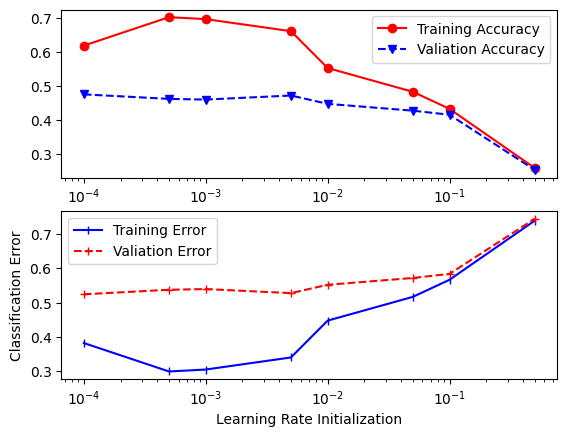

In [177]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(lr_init_values,trainAcc,'ro-',lr_init_values,valAcc,'bv--')
ax2.plot(lr_init_values,trainErr,'b|-',lr_init_values,valErr,'r+--')

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Learning Rate Initialization')
plt.ylabel('Classification Error')
plt.show()

In [178]:
desc_indx = valAcc.argsort()[::-1]
for indx , i in enumerate(desc_indx):
  print(f"{indx+1}th max validation score of {valAcc[i]*100:.2f}% with lr={lr_init_values[i]:.3f} with difference of {(trainAcc[i] - valAcc[i])*100:0.2f}%")

1th max validation score of 47.56% with lr=0.000 with difference of 14.27%
2th max validation score of 47.23% with lr=0.005 with difference of 18.84%
3th max validation score of 46.24% with lr=0.001 with difference of 23.93%
4th max validation score of 46.04% with lr=0.001 with difference of 23.56%
5th max validation score of 44.78% with lr=0.010 with difference of 10.49%
6th max validation score of 42.79% with lr=0.050 with difference of 5.54%
7th max validation score of 41.59% with lr=0.100 with difference of 1.72%
8th max validation score of 25.45% with lr=0.500 with difference of 0.55%


In [176]:
lr_init_values  = np.array(lr_init_values)
top_5_lr_values = lr_init_values[desc_indx[:5]]
top_5_lr_values

array([0.0001, 0.005 , 0.0005, 0.001 , 0.01  ])

In [184]:
MLP_clf = Pipeline([
                   ('tfidf', TfidfVectorizer()) ,
                   ('MLP', MLPClassifier(random_state = 42))
])

# Create the parameter grid
MLP_params_poss = {
                   'MLP__hidden_layer_sizes' : [(10)]               ,
                   'MLP__alpha'              : [ 0.5]               ,
                   'MLP__activation'         : ['relu']             ,
                   'MLP__learning_rate'      : ['constant']         ,
                   'MLP__learning_rate_init' : top_5_lr_values      ,
                   'MLP__max_iter'           : [3000] 
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_MLP = GridSearchCV(estimator           = MLP_clf               ,
                               param_grid          = MLP_params_poss       ,
                               cv                  =  4                    ,                         ## None nested cross validation while hyper parameter tuning
                               n_jobs              = -1                    ,                         ## use all processors to conduct the search
                               verbose             =  2                    ,                         ## Print out the GridSearch output
                               scoring             = make_scorer(f1_score  , average ='weighted') ,  ## use f1 score as a metric
                               return_train_score  = True                  ,
                               error_score         = "raise")

In [185]:
%%time
grid_search_MLP.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] END MLP__activation=relu, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=constant, MLP__learning_rate_init=0.0001, MLP__max_iter=3000; total time= 1.2min
[CV] END MLP__activation=relu, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=constant, MLP__learning_rate_init=0.001, MLP__max_iter=3000; total time=  23.7s
[CV] END MLP__activation=relu, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=constant, MLP__learning_rate_init=0.01, MLP__max_iter=3000; total time=  13.6s
[CV] END MLP__activation=relu, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=constant, MLP__learning_rate_init=0.0001, MLP__max_iter=3000; total time=  58.2s
[CV] END MLP__activation=relu, MLP__alpha=0.5, MLP__hidden_layer_sizes=10, MLP__learning_rate=constant, MLP__learning_rate_init=0.0005, MLP__max_iter=3000; total time=  36.8s
[CV] END MLP__activation=relu, MLP__alpha=0.5, MLP__hidden_layer_siz

GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('MLP',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'MLP__activation': ['relu'], 'MLP__alpha': [0.5],
                         'MLP__hidden_layer_sizes': [10],
                         'MLP__learning_rate': ['constant'],
                         'MLP__learning_rate_init': array([0.0001, 0.005 , 0.0005, 0.001 , 0.01  ]),
                         'MLP__max_iter': [3000]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=2)

In [188]:
## Get the best parameters
MLP_params = grid_search_MLP.best_params_
MLP_params

{'MLP__activation': 'relu',
 'MLP__alpha': 0.5,
 'MLP__hidden_layer_sizes': 10,
 'MLP__learning_rate': 'constant',
 'MLP__learning_rate_init': 0.0001,
 'MLP__max_iter': 3000}

In [189]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [190]:
## define MLP for cross validation
MLP_clf = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('MLP', MLPClassifier(random_state = 42))
])

MLP_params_poss = {
                   'MLP__hidden_layer_sizes' : [(10)]               ,
                   'MLP__alpha'              : [0.5]                ,
                   'MLP__activation'         : ['relu']             ,
                   'MLP__learning_rate'      : ['constant']         ,
                   'MLP__learning_rate_init' : [0.0001]             ,
                   'MLP__max_iter'           : [3000] 
                  }

# Nested CV with parameter optimization
MLP_cv_clf = GridSearchCV(estimator           = MLP_clf               ,
                          param_grid          = MLP_params_poss       ,
                          cv                  = inner_cv              ,
                          n_jobs              =-1                     ,        ## use all processors to conduct the search
                          verbose             = 1                     ,
                          return_train_score  = True                  ,
                          error_score         = "raise")                       ## Print out the GridSearch output

scores_MLP = cross_validate(estimator          = MLP_cv_clf ,
                            X                  = X          ,
                            y                  = y          ,
                            cv                 = outer_cv   ,
                            scoring            = scoring    ,   ## give scoring metrics at the time of cross validation
                            return_train_score = True       ,
                            return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_MLP['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_MLP['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_MLP['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_MLP['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.6309
Train F1 Score: 0.6239
Test Accuracy: 0.4608
Test F1 Score: 0.4530


In [191]:
# MLP
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_MLP        = np.mean(scores_MLP['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_MLP_err    = 1 - model_test_balanced_accuracy_MLP                         # Calculate balanced accuracy error
model_test_accuracy_MLP                 = np.mean(scores_MLP['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_MLP_err             = 1 - model_test_accuracy_MLP                                  # Calculate Accuracy error
model_test_f1_MLP                       = np.mean(scores_MLP['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_MLP_err                   = 1 - model_test_f1_MLP                                        # Calculate F1-score error
model_test_precision_weighted_MLP       = np.mean(scores_MLP['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_MLP_err   = 1 - model_test_precision_weighted_MLP                        # Calculate Precision Weighted error
model_test_precision_macro_MLP          = np.mean(scores_MLP['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_MLP_err      = 1 - model_test_precision_macro_MLP                           # Calculate Precision Macro error
model_test_recall_weighted_MLP          = np.mean(scores_MLP['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_MLP_err      = 1 - model_test_recall_weighted_MLP                           # Calculate Recall Weighted error
model_test_recall_macro_MLP             = np.mean(scores_MLP['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_MLP_err         = 1 - model_test_recall_macro_MLP                              # Calculate Recall macro error

print('MLP performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_MLP) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_MLP_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_MLP) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_MLP_err))
print('- F1 score: {:.4f}'.format(model_test_f1_MLP) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_MLP_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_MLP) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_MLP_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_MLP) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_MLP_err))
print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_MLP) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_MLP_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_MLP) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_MLP_err))

MLP performance for test only after nested cross validation
- Balanced Accuracy: 0.4608 || Balanced Accuracy Error: 0.5392
- Accuracy: 0.4608 || Accuracy Error: 0.5392
- F1 score: 0.4530 || F1 score Error: 0.5470
- Precision Weighted: 0.4504 || Precision Weighted Error: 0.5496
- Precision macro: 0.4502 || Precision macro Error: 0.5498
- Recall Weighted: 0.4608 || Recall Weighted Error: 0.5392
- Recall macro: 0.4608 || Recall macro Error: 0.5392


### **Training with GloVe Embeddings**

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold , cross_val_score , cross_validate

from sklearn.metrics import classification_report   , confusion_matrix , ConfusionMatrixDisplay  , recall_score ,  precision_score  , accuracy_score  , f1_score  , make_scorer , balanced_accuracy_score , roc_auc_score , roc_curve

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [5]:
pdf = pd.read_csv('./data/sampled_data.csv')

In [6]:
pdf.duplicated().sum()

0

In [7]:
pdf.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

0

In [8]:
pdf.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [9]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          20000 non-null  object
 1   location         20000 non-null  object
 2   pros             20000 non-null  object
 3   cons             20000 non-null  object
 4   overall-ratings  20000 non-null  int64 
 5   source           20000 non-null  object
 6   org_pros         20000 non-null  object
 7   org_cons         20000 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


In [10]:
pdf.shape

(20000, 8)

In [11]:
pdf['company-review'] = "pros: " + pdf['org_pros'] + "\ncons: " + pdf['org_cons']
pdf.head(2)

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons,company-review
0,Office Depot,"Overland Park, KS",solid parttime job department little less reta...,sales goals department unrealistic dependent u...,3,Glassdoor,It's a solid part-time job. This department is...,Sales goals for the department can be unrealis...,pros: It's a solid part-time job. This departm...
1,DISH,"Cheyenne, WY",jobs easy,satellite tv way entire company slowly canniba...,1,Glassdoor,The jobs here are very easy.,satellite tv is on its way out and the entire ...,pros: The jobs here are very easy.\ncons: sate...


In [12]:
pdf.isna().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
company-review     0
dtype: int64

In [13]:
pdf.isnull().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
company-review     0
dtype: int64

In [14]:
len(pdf['company'].unique())

172

In [15]:
len(pdf['location'].unique())

2493

In [16]:
pdf['source'].value_counts()

source
Glassdoor      19000
Ambitionbox     1000
Name: count, dtype: int64

In [322]:
# https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w06/sentiment.html
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
# download GloVe
!wget http://nlp.stanford.edu/data/glove.6B.zip
!apt update && apt install unzip
!unzip glove.6B.zip
!rm -rf glove.6B.zip

--2024-12-26 23:10:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-26 23:10:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-26 23:10:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!pip install --upgrade gensim

In [17]:
# Prepare the Glove embeddings to be formatted as word2vec
# We use the 200 dimension file
GLOVE_DIM             = 200
glove_input_file      = f'glove.6B.{GLOVE_DIM}d.txt'
word2vec_output_file  = f'glove.6B.{GLOVE_DIM}d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

/tmp/ipykernel_581/648508593.py:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 200)

In [18]:
# load the Stanford GloVe model
filename = word2vec_output_file
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [19]:
def clean_text(text):
    # Handling Emojis https://unicode.scarfboy.com/
    # Grinning face with smiling eyes [-5]
    text = re.sub('\xf0\x9f\x98\x81', 'grinning_face_with_smiling_eyes_emoji ', text)
    # Grinning face with star eyes
    text = re.sub('\xf0\x9f\xa4\xa9', 'grinning_face_with_star_eyes_emoji ', text)
    # Smiling face with smiling eyes [-8]
    text = re.sub('\xf0\x9f\x98\x8a', 'smiling_face_with_smiling_eyes_emoji ', text)
    # OK sign emoji [-1]
    text = re.sub('\xf0\x9f\x91\x8c', 'OK_emoji ', text)
    # thumbs up emoji [-6]
    text = re.sub('\xf0\x9f\x91\x8d', 'thumbs_up_emoji ', text)
    # thumbs down
    text = re.sub('\xf0\x9f\x91\x8e', 'thumbs_down_emoji ', text)
    # robot face [-1]
    text = re.sub('\xf0\x9f\xa4\x96', 'robot_face_emoji ', text)
    # 100 points
    text = re.sub('\xf0\x9f\x92\xaf', '100_points_emoji ', text)
    # emoji modifier
    text = re.sub('\xf0\x9f\x8f\xbb', '', text)
    # emoji modifier fitzpatrick type-3
    text = re.sub('\xf0\x9f\x8f\xbc', '', text)
    # emoji modifier fitzpatrick type-4
    text = re.sub('\xf0\x9f\x8f\xbd', '', text)
    # emoji modifier fitzpatrick type-5
    text = re.sub('\xf0\x9f\x8f\xbe', '', text)
    # face with stuck-out tongue and winking eye
    text = re.sub('\xf0\x9f\x98\x9c', 'face_with_stuck_out_tongue_and_winking_eye_emoji ', text)
    # face with stuck-out tongue
    text = re.sub('\xf0\x9f\x98\x9b', 'face_with_stuck_out_tongue_emoji ', text)
    # crying face
    text = re.sub('\xf0\x9f\x98\xa2', 'crying_face_emoji ', text)
    # kissing face
    text = re.sub('\xf0\x9f\x98\x9a', 'kissing_face_emoji ', text)
    # grinning face
    text = re.sub('\xf0\x9f\x98\x80', 'grinning_face_emoji ', text)
    # face with tears of joy
    text = re.sub('\xf0\x9f\x98\x82', 'face_with_tears_of_joy_emoji ', text)
    # unamused face
    text = re.sub('\xf0\x9f\x98\x92', 'unamused_face_emoji ', text)
    # upside-down face
    text = re.sub('\xf0\x9f\x99\x83', 'upside_down_face_emoji ', text)
    # smiling face with heart-shaped eyes
    text = re.sub('\xf0\x9f\x98\x8d', 'smiling_face_with_heart_shaped_eyes_emoji ', text)
    # winking face
    text = re.sub('\xf0\x9f\x98\x89', 'winking_face_emoji ', text)
    # shrug emoji
    text = re.sub('\xf0\x9f\xa4\xb7', 'shrug_emoji ', text)
    # rolling on the floor laughing emoji
    text = re.sub('\xf0\x9f\xa4\xa3', 'rolling_on_the_floor_laughing_emoji ', text)
    # face palm emoji
    text = re.sub('\xf0\x9f\xa4\xa6', 'face_palm_emoji ', text)
    # smirking face
    text = re.sub('\xf0\x9f\x98\x8f', 'smirking_face_emoji ', text)
    # slightly smiling face
    text = re.sub('\xf0\x9f\x99\x82', 'slightly_smiling_face_emoji ', text)
    # smiling face with open mouth and cold sweat
    text = re.sub('\xf0\x9f\x98\x85', 'smiling_face_with_open_mouth_and_cold_sweat_emoji ', text)
    # smiling face with open mouth and smiling eyes
    text = re.sub('\xf0\x9f\x98\x84', 'smiling_face_with_open_mouth_and_smiling_eyes_emoji ', text)
    # relieved face
    text = re.sub('\xf0\x9f\x98\x8c', 'relieved_face_emoji ', text)
    # worried face
    text = re.sub('\xf0\x9f\x98\x9f', 'worried_face_emoji ', text)
    # face with ok gesture
    text = re.sub('\xf0\x9f\x99\x86', 'face_with_ok_gesture_emoji ', text)
    # face with cold sweat
    text = re.sub('\xf0\x9f\x98\x93', 'face_with_cold_sweat_emoji ', text)
    # smiling face with sunglasses
    text = re.sub('\xf0\x9f\x98\x8e', 'smiling_face_with_sunglasses_emoji ', text)
    # thinking face
    text = re.sub('\xf0\x9f\xa4\x94', 'thinking_face_emoji ', text)
    # loudly crying face
    text = re.sub('\xf0\x9f\x98\xad', 'loudly_crying_face_emoji ', text)
    # face with rolling eyes
    text = re.sub('\xf0\x9f\x99\x84', 'face_with_rolling_eyes_emoji ', text)
    # frowning face with open mouth
    text = re.sub('\xf0\x9f\x98\xa6', 'frowning_face_with_open_mouth_emoji ', text)
    # dizzy emoji
    text = re.sub('\xf0\x9f\x92\xab', 'dizzy_symbol_emoji ', text)
    # fire emoji
    text = re.sub('\xf0\x9f\x94\xa5', 'fire_emoji ', text)
    # poultry leg
    text = re.sub('\xf0\x9f\x8d\x97', 'poultry_leg_emoji ', text)
    # electric light bulb
    text = re.sub('\xf0\x9f\x92\xa1', 'electric_light_bulb_emoji ', text)
    # male sign
    text = re.sub('\xe2\x99\x82', 'male_sign ', text)
    # female sign
    text = re.sub('\xe2\x99\x80', 'female_sign ', text)

    # Handling Zero width space using https://unicode.scarfboy.com/
    # Zero width space width
    text = re.sub('\xe2\x80\x8b', '', text)
    # zero width joiner
    text = re.sub('\xe2\x80\x8d', '', text)

    # Handling special chars using https://unicode.scarfboy.com/
    # Left single quotation mark
    text = re.sub('\xe2\x80\x98', "'", text)
    # Right single quotation mark
    text = re.sub('\xe2\x80\x99', "'", text)
    # Left double quotation mark
    text = re.sub('\xe2\x80\x9c', '"', text)
    # Right double quotation mark
    text = re.sub('\xe2\x80\x9d', '"', text)
    # EM dash
    text = re.sub('\xe2\x80\x94', '-', text)
    # EN dash
    text = re.sub('\xe2\x80\x93', '-', text)
    # Fullwidth comma
    text = re.sub('\xef\xbc\x8c', ",", text)
    # Bullet
    text = re.sub('\xe2\x80\xa2', '*', text)
    # Horizontal ellipsis
    text = re.sub('\xe2\x80\xa6', '...', text)
    # checkmark to yes
    text = re.sub('\xe2\x9c\x94', 'yes', text)
    # variation selector to nothing
    text = re.sub('\xef\xb8\x8f', '', text)
    # Euro sign to Dollar sign
    text = re.sub('\xe2\x82\xac', '$', text)
    # Pound sign to Dollar sign
    text = re.sub('\xc2\xa3', '$', text)
    # Cent sign to Dollar sign
    text = re.sub('\xc2\xa2', '$', text)
    # Non-breaking space to space
    text = re.sub('\xc2\xa0', ' ', text)
    # Handling &amp
    text = text.replace("&amp;","&")
    # replace Windows-style line endings (\r\n) with Unix-style line endings
    text = re.sub('\r\n', '\n', text)

    # Handling acute sign using https://unicode.scarfboy.com/
    # Small letter o with acute (ó)
    text = re.sub('\xc3\xb3', "o", text)
    # Small letter e with grave (è)
    text = re.sub('\xc3\xa8', "e", text)
    # Small letter e with grave (é)
    text = re.sub('\xc3\xa9', "e", text)
    # Small letter a with grave (à)
    text = re.sub('\xc3\xa0', "a", text)
    # Acute to '
    text = re.sub('\xc2\xb4', "'", text)
    # Latin small letter dotless I used as |
    text = re.sub('\xc4\xb1', '|', text)
    return text.strip().lower()

In [20]:
pdf['company-review'] = pdf['company-review'].apply(clean_text)

In [21]:
def text_to_embedding(r):
    """convert the record text into a vector of embeddings"""
    # get only the words whose embedding is available
    list_of_words = []
    for w in r.split():
        if w.lower() in glove_model:
            list_of_words.append(w.lower())
    if len(list_of_words) > 1:
        # if there is at least one word, sum their embeddings
        return np.sum(glove_model[list_of_words], axis=0)
    else:
        # otherwise, return 0
        return np.zeros((GLOVE_DIM))

In [22]:
# embedding
pdf['company-review'] = pdf['company-review'].apply(text_to_embedding)
pdf.head(2)

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons,company-review
0,Office Depot,"Overland Park, KS",solid parttime job department little less reta...,sales goals department unrealistic dependent u...,3,Glassdoor,It's a solid part-time job. This department is...,Sales goals for the department can be unrealis...,"[24.960335, 19.806965, -8.268133, -13.813823, ..."
1,DISH,"Cheyenne, WY",jobs easy,satellite tv way entire company slowly canniba...,1,Glassdoor,The jobs here are very easy.,satellite tv is on its way out and the entire ...,"[11.558635, 15.001489, -5.6252503, -11.161421,..."


In [23]:
## Seperating X and Y
X = pdf['company-review']
y = pdf['overall-ratings']-1

## Split the data into training and testing
x_indices = np.arange(len(pdf))

indices_train, indices_test_val , y_train , y_test_val = train_test_split(x_indices , y , test_size = 0.3 , random_state = 42 , stratify = y)
indices_test , indices_val, y_test, y_val = train_test_split(indices_test_val , y_test_val , test_size = 0.5 , random_state = 42 , stratify = y_test_val)

# get the embeddings
X_train = np.array(pdf.iloc[indices_train]['company-review'].tolist())
X_val   = np.array(pdf.iloc[indices_val]['company-review'].tolist())
X_test  = np.array(pdf.iloc[indices_test]['company-review'].tolist())

In [25]:
X_train.shape , X_val.shape , X_test.shape

((14000, 200), (3000, 200), (3000, 200))

#### **KNN**

In [25]:
K_clf = Pipeline([
     ('KNN', KNeighborsClassifier())
])

K_clf.fit(X_train, y_train)

KNN_y_train_pred = K_clf.predict(X_train)
KNN_y_test_pred  = K_clf.predict(X_test)

# Training set performance
KNN_train_accuracy = accuracy_score(y_train, KNN_y_train_pred) # Calculate Accuracy
KNN_train_f1       = f1_score(y_train, KNN_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
KNN_test_accuracy  = accuracy_score(y_test, KNN_y_test_pred)   # Calculate Accuracy
KNN_test_f1        = f1_score(y_test , KNN_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("KNN Train Accuracy: {:.4f}".format(KNN_train_accuracy))
print("KNN Train F1 Score: {:.4f}".format(KNN_train_f1))
print('KNN Test Accuracy: {:.4f}'.format(KNN_test_accuracy))
print('KNN Test F1 Score: {:.4f}'.format(KNN_test_f1))

print(classification_report(y_test, KNN_y_test_pred))

KNN Train Accuracy: 0.5469
KNN Train F1 Score: 0.5452
KNN Test Accuracy: 0.3020
KNN Test F1 Score: 0.3015
              precision    recall  f1-score   support

           0       0.38      0.42      0.40       600
           1       0.27      0.27      0.27       600
           2       0.20      0.21      0.21       600
           3       0.30      0.34      0.32       600
           4       0.37      0.27      0.31       600

    accuracy                           0.30      3000
   macro avg       0.30      0.30      0.30      3000
weighted avg       0.30      0.30      0.30      3000



In [26]:
K_clf = Pipeline([
     ('KNN', KNeighborsClassifier())
])

# Create the parameter grid
knn_params_poss = {
    'KNN__n_neighbors'   : [1, 2, 3, 4, 5, 6],
    'KNN__weights'       : ['uniform', 'distance'],
    'KNN__algorithm'     : ['auto'] ,
    'KNN__metric'        : ['minkowski' , 'euclidean' , 'manhattan'] ,
    'KNN__p'             : [1 , 2]
}

# Instantiate the grid search model with non nested cross validation
grid_search_knn = GridSearchCV(estimator           = K_clf                ,
                               param_grid          = knn_params_poss      ,
                               cv                  =  4                   ,                           ## None nested cross validation while hyper parameter tuning
                               n_jobs              = -1                   ,                           ## use all processors to conduct the search
                               verbose             =  1                   ,                           ## Print out the GridSearch output
                               scoring             = make_scorer(f1_score , average = 'weighted'),    ## use f1 score as a metric
                               return_train_score  = True                 ,
                               error_score         = "raise")

In [27]:
%%time
grid_search_knn.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
CPU times: user 1.15 s, sys: 552 ms, total: 1.7 s
Wall time: 11min 17s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__algorithm': ['auto'],
                         'KNN__metric': ['minkowski', 'euclidean', 'manhattan'],
                         'KNN__n_neighbors': [1, 2, 3, 4, 5, 6],
                         'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [28]:
## Get the best parameters
knn_params = grid_search_knn.best_params_
knn_params

{'KNN__algorithm': 'auto',
 'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 6,
 'KNN__p': 2,
 'KNN__weights': 'uniform'}

In [29]:
K_clf = Pipeline([
     ('KNN', KNeighborsClassifier(n_neighbors =  6          ,
                                  weights     = 'uniform'   ,
                                  algorithm   = 'auto'      ,
                                  metric      = 'minkowski' ,
                                  p           =  2))
])

K_clf.fit(X_train, y_train)

KNN_y_train_pred = K_clf.predict(X_train)
KNN_y_test_pred  = K_clf.predict(X_test)

# Training set performance
KNN_train_accuracy = accuracy_score(y_train, KNN_y_train_pred) # Calculate Accuracy
KNN_train_f1       = f1_score(y_train, KNN_y_train_pred , average = 'weighted')          # Calculate F1 score

# Test set performance
KNN_test_accuracy  = accuracy_score(y_test, KNN_y_test_pred)   # Calculate Accuracy
KNN_test_f1        = f1_score(y_test , KNN_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("KNN Train Accuracy: {:.4f}".format(KNN_train_accuracy))
print("KNN Train F1 Score: {:.4f}".format(KNN_train_f1))
print('KNN Test Accuracy: {:.4f}'.format(KNN_test_accuracy))
print('KNN Test F1 Score: {:.4f}'.format(KNN_test_f1))

print(classification_report(y_test, KNN_y_test_pred))

KNN Train Accuracy: 0.5224
KNN Train F1 Score: 0.5214
KNN Test Accuracy: 0.3013
KNN Test F1 Score: 0.3016
              precision    recall  f1-score   support

           0       0.40      0.44      0.42       600
           1       0.26      0.26      0.26       600
           2       0.21      0.23      0.22       600
           3       0.28      0.29      0.28       600
           4       0.39      0.28      0.33       600

    accuracy                           0.30      3000
   macro avg       0.31      0.30      0.30      3000
weighted avg       0.31      0.30      0.30      3000



In [30]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [31]:
## define KNN for cross validation
K_clf  = Pipeline([
     ('KNN', KNeighborsClassifier())
])

KNN_params_poss = {
                  'KNN__algorithm'     : ['auto']       ,
                  'KNN__metric'        : ['minkowski']  ,
                  'KNN__n_neighbors'   : [6]            ,
                  'KNN__p'             : [2]            ,
                  'KNN__weights'       : ['uniform']
                  }

# Nested CV with parameter optimization
KNN_cv_clf = GridSearchCV(estimator           = K_clf                 ,
                          param_grid          = KNN_params_poss       ,
                          cv                  = inner_cv              ,
                          n_jobs              =-1                     ,        ## use all processors to conduct the search
                          verbose             = 1                     ,
                          return_train_score  = True                  ,
                          error_score         = "raise"
                          )

scores_knn = cross_validate(estimator         = KNN_cv_clf ,
                           X                  = X          ,
                           y                  = y          ,
                           cv                 = outer_cv   ,
                           scoring            = scoring    ,   ## give scoring metrics at the time of cross validation
                           return_train_score = True       ,
                           return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_knn['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_knn['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_knn['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_knn['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.5230
Train F1 Score: 0.5218
Test Accuracy: 0.3159
Test F1 Score: 0.3156


In [32]:
# KNN
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_knn        = np.mean(scores_knn['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_knn_err    = 1 - model_test_balanced_accuracy_knn                         # Calculate balanced accuracy error
model_test_accuracy_knn                 = np.mean(scores_knn['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_knn_err             = 1 - model_test_accuracy_knn                                  # Calculate Accuracy error
model_test_f1_knn                       = np.mean(scores_knn['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_knn_err                   = 1 - model_test_f1_knn                                        # Calculate F1-score error
model_test_precision_weighted_knn       = np.mean(scores_knn['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_knn_err   = 1 - model_test_precision_weighted_knn                        # Calculate Precision Weighted error
model_test_precision_macro_knn          = np.mean(scores_knn['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_knn_err      = 1 - model_test_precision_macro_knn                           # Calculate Precision Macro error
model_test_recall_weighted_knn          = np.mean(scores_knn['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_knn_err      = 1 - model_test_recall_weighted_knn                           # Calculate Recall Weighted error
model_test_recall_macro_knn             = np.mean(scores_knn['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_knn_err         = 1 - model_test_recall_macro_knn                              # Calculate Recall macro error

print('KNN performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_knn) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_knn_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_knn) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_knn_err))
print('- F1 score: {:.4f}'.format(model_test_f1_knn) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_knn_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_knn) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_knn_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_knn) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_knn_err))
print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_knn) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_knn_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_knn) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_knn_err))

KNN performance for test only after nested cross validation
- Balanced Accuracy: 0.3160 || Balanced Accuracy Error: 0.6840
- Accuracy: 0.3159 || Accuracy Error: 0.6841
- F1 score: 0.3156 || F1 score Error: 0.6844
- Precision Weighted: 0.3188 || Precision Weighted Error: 0.6812
- Precision macro: 0.3188 || Precision macro Error: 0.6812
- Recall Weighted: 0.3159 || Recall Weighted Error: 0.6841
- Recall macro: 0.3160 || Recall macro Error: 0.6840


#### **Random Forest**

In [33]:
RF_clf = Pipeline([
                  ('RF', RandomForestClassifier())
                  ])

RF_clf.fit(X_train, y_train)

RF_y_train_pred   = RF_clf.predict(X_train)
RF_y_test_pred    = RF_clf.predict(X_test)

# Training set performance
RF_train_accuracy = accuracy_score(y_train, RF_y_train_pred) # Calculate Accuracy
RF_train_f1       = f1_score(y_train, RF_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
RF_test_accuracy  = accuracy_score(y_test, RF_y_test_pred)   # Calculate Accuracy
RF_test_f1        = f1_score(y_test , RF_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("RF Train Accuracy: {:.4f}".format(RF_train_accuracy))
print("RF Train F1 Score: {:.4f}".format(RF_train_f1))
print('RF Test Accuracy:  {:.4f}'.format(RF_test_accuracy))
print('RF Test F1 Score:  {:.4f}'.format(RF_test_f1))

print(classification_report(y_test, RF_y_test_pred))

RF Train Accuracy: 1.0000
RF Train F1 Score: 1.0000
RF Test Accuracy:  0.3713
RF Test F1 Score:  0.3626
              precision    recall  f1-score   support

           0       0.44      0.55      0.48       600
           1       0.32      0.27      0.29       600
           2       0.25      0.19      0.22       600
           3       0.35      0.36      0.36       600
           4       0.44      0.49      0.46       600

    accuracy                           0.37      3000
   macro avg       0.36      0.37      0.36      3000
weighted avg       0.36      0.37      0.36      3000



In [34]:
## defining depth from 1 to 30
max_depths = np.arange(1 , 31)

trainAcc, testAcc = np.zeros(len(max_depths)), np.zeros(len(max_depths))
trainErr, testErr = np.zeros(len(max_depths)), np.zeros(len(max_depths))

## loop through a list of depth
index = 0
for depth in max_depths:

    RF_clf = Pipeline([
                        ('RF', RandomForestClassifier(max_depth=depth))
                      ])

    RF_clf.fit(X_train, y_train)

    Y_predTrain = RF_clf.predict(X_train)
    Y_predTest  = RF_clf.predict(X_test)

    trainAcc[index]  = f1_score(y_train , Y_predTrain , average = 'weighted' )
    testAcc[index]   = f1_score(y_test  , Y_predTest  , average = 'weighted')

    trainErr[index]  = 1-f1_score(y_train , Y_predTrain , average = 'weighted' )
    testErr[index]   = 1-f1_score(y_test  , Y_predTest  , average = 'weighted' )

    index += 1

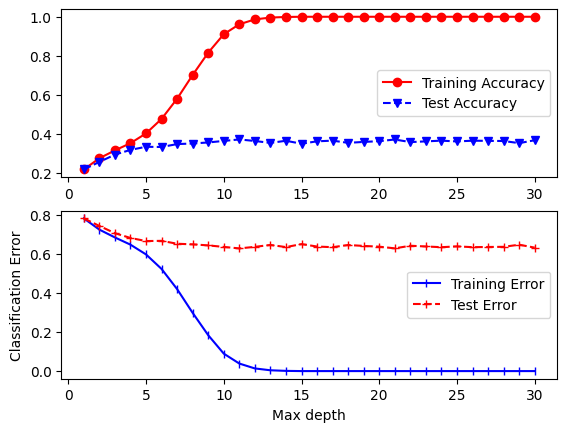

In [35]:
## Plot training and testing results with respect to max depth

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(max_depths , trainAcc , 'ro-' , max_depths , testAcc,'bv--')
ax2.plot(max_depths , trainErr , 'b|-' , max_depths , testErr,'r+--')

ax1.legend(['Training Accuracy','Test Accuracy'])
ax2.legend(['Training Error','Test Error'])

## Here we can see that when max depth between range 12 to 17, it's much generalized
plt.xlabel('Max depth')
plt.ylabel('Classification Error')
plt.show()

In [36]:
RF_clf = Pipeline([
     ('RF', RandomForestClassifier())
])

# Create the parameter grid
RF_params_poss = {
                   'RF__n_estimators'      : [100, 200, 300, 400, 500, 600, 700],
                   'RF__criterion'         : ["gini", "entropy"],
                   'RF__max_depth'         : [1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                   'RF__min_samples_split' : [2, 3, 4, 5]
                  }

# Instantiate the grid search model with non nested cross validation
grid_search_RF = GridSearchCV(estimator           = RF_clf                ,
                              param_grid          = RF_params_poss        ,
                              cv                  =  4                    ,                        ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                        ## use all processors to conduct the search
                              verbose             =  1                    ,                        ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [ ]:
%%time
grid_search_RF.fit(X_train, y_train)

Fitting 4 folds for each of 728 candidates, totalling 2912 fits


In [39]:
## Get the best parameters
RF_params = grid_search_RF.best_params_
RF_params

{'RF__criterion': 'gini',
 'RF__max_depth': 12,
 'RF__min_samples_split': 4,
 'RF__n_estimators': 600}

In [40]:
RF_clf = Pipeline([
                  ('RF', RandomForestClassifier(n_estimators      = 600        ,
                                                criterion         = 'gini'     ,
                                                max_depth         = 12         ,
                                                min_samples_split = 4          ,
                                                oob_score         = True))
                  ])

RF_clf.fit(X_train, y_train)

RF_y_train_pred   = RF_clf.predict(X_train)
RF_y_test_pred    = RF_clf.predict(X_test)

# Training set performance
RF_train_accuracy = accuracy_score(y_train, RF_y_train_pred)                         # Calculate Accuracy
RF_train_f1       = f1_score(y_train, RF_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
RF_test_accuracy  = accuracy_score(y_test, RF_y_test_pred)                           # Calculate Accuracy
RF_test_f1        = f1_score(y_test , RF_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("RF Train Accuracy: {:.4f}".format(RF_train_accuracy))
print("RF Train F1 Score: {:.4f}".format(RF_train_f1))
print('RF Test Accuracy:  {:.4f}'.format(RF_test_accuracy))
print('RF Test F1 Score:  {:.4f}'.format(RF_test_f1))

print(classification_report(y_test, RF_y_test_pred))

RF Train Accuracy: 0.9871
RF Train F1 Score: 0.9871
RF Test Accuracy:  0.3837
RF Test F1 Score:  0.3655
              precision    recall  f1-score   support

           0       0.46      0.63      0.53       600
           1       0.30      0.22      0.25       600
           2       0.27      0.17      0.21       600
           3       0.34      0.35      0.35       600
           4       0.44      0.55      0.48       600

    accuracy                           0.38      3000
   macro avg       0.36      0.38      0.37      3000
weighted avg       0.36      0.38      0.37      3000



In [41]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [42]:
## define random forest for cross validation
RF_clf = Pipeline([
     ('RF', RandomForestClassifier(oob_score = True))
])

RF_params_poss = {
                   'RF__n_estimators'      : [600]          ,
                   'RF__criterion'         : ["gini"]       ,
                   'RF__max_depth'         : [12]           ,
                   'RF__min_samples_split' : [4]
                  }

# Nested CV with parameter optimization
RF_cv_clf = GridSearchCV(estimator           = RF_clf                ,
                         param_grid          = RF_params_poss        ,
                         cv                  = inner_cv              ,
                         n_jobs              =-1                     ,        ## use all processors to conduct the search
                         verbose             = 1                     ,
                         return_train_score  = True                  ,
                         error_score         = "raise")                       ## Print out the GridSearch output

scores_rf = cross_validate(estimator          = RF_cv_clf ,
                           X                  = X         ,
                           y                  = y         ,
                           cv                 = outer_cv  ,
                           scoring            = scoring   ,   ## give scoring metrics at the time of cross validation
                           return_train_score = True      ,
                           return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_rf['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_rf['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_rf['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_rf['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.9881
Train F1 Score: 0.9882
Test Accuracy: 0.3858
Test F1 Score: 0.3710


In [43]:
# Random Forest
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_rf        = np.mean(scores_rf['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_rf_err    = 1 - model_test_balanced_accuracy_rf                         # Calculate balanced accuracy error
model_test_accuracy_rf                 = np.mean(scores_rf['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_rf_err             = 1 - model_test_accuracy_rf                                  # Calculate Accuracy error
model_test_f1_rf                       = np.mean(scores_rf['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_rf_err                   = 1 - model_test_f1_rf                                        # Calculate F1-score error
model_test_precision_weighted_rf       = np.mean(scores_rf['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_rf_err   = 1 - model_test_precision_weighted_rf                        # Calculate Precision Weighted error
model_test_precision_macro_rf          = np.mean(scores_rf['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_rf_err      = 1 - model_test_precision_macro_rf                           # Calculate Precision Macro error
model_test_recall_weighted_rf          = np.mean(scores_rf['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_rf_err      = 1 - model_test_recall_weighted_rf                           # Calculate Recall Weighted error
model_test_recall_macro_rf             = np.mean(scores_rf['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_rf_err         = 1 - model_test_recall_macro_rf                              # Calculate Recall macro error

print('Random Forest performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_rf) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_rf_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_rf) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_rf_err))
print('- F1 score: {:.4f}'.format(model_test_f1_rf) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_rf_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_rf) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_rf_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_rf) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_rf_err))
print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_rf) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_rf_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_rf) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_rf_err))

Random Forest performance for test only after nested cross validation
- Balanced Accuracy: 0.3860 || Balanced Accuracy Error: 0.6140
- Accuracy: 0.3858 || Accuracy Error: 0.6142
- F1 score: 0.3710 || F1 score Error: 0.6290
- Precision Weighted: 0.3701 || Precision Weighted Error: 0.6299
- Precision macro: 0.3699 || Precision macro Error: 0.6301
- Recall Weighted: 0.3858 || Recall Weighted Error: 0.6142
- Recall macro: 0.3860 || Recall macro Error: 0.6140


#### **MultinomialNB**

In [45]:
NB_clf  = Pipeline([
                    ('MS', MinMaxScaler()) ,
                    ('NB', MultinomialNB())
                   ])

NB_clf.fit(X_train, y_train)

NB_y_train_pred   = NB_clf.predict(X_train)
NB_y_test_pred    = NB_clf.predict(X_test)

# Training set performance
NB_train_accuracy = accuracy_score(y_train, NB_y_train_pred)                         # Calculate Accuracy
NB_train_f1       = f1_score(y_train, NB_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
NB_test_accuracy  = accuracy_score(y_test, NB_y_test_pred)                            # Calculate Accuracy
NB_test_f1        = f1_score(y_test , NB_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("NB Train Accuracy: {:.4f}".format(NB_train_accuracy))
print("NB Train F1 Score: {:.4f}".format(NB_train_f1))
print('NB Test Accuracy: {:.4f}'.format(NB_test_accuracy))
print('NB Test F1 Score: {:.4f}'.format(NB_test_f1))

print(classification_report(y_test, NB_y_test_pred))

NB Train Accuracy: 0.2589
NB Train F1 Score: 0.2183
NB Test Accuracy: 0.2583
NB Test F1 Score: 0.2199
              precision    recall  f1-score   support

           0       0.32      0.34      0.33       600
           1       0.23      0.07      0.11       600
           2       0.22      0.10      0.14       600
           3       0.25      0.13      0.17       600
           4       0.24      0.66      0.36       600

    accuracy                           0.26      3000
   macro avg       0.25      0.26      0.22      3000
weighted avg       0.25      0.26      0.22      3000



In [46]:
alpha_values = [10**-i for i in range(5)] + [5*10**-i for i in range(5)]  # define log-scale range of learning rate to search as a first guess
alpha_values.sort()
alpha_values

[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]

In [47]:
trainAcc, valAcc  = np.zeros(len(alpha_values)), np.zeros(len(alpha_values))
trainErr, valErr  = np.zeros(len(alpha_values)), np.zeros(len(alpha_values))

## loop through a list of learning rate initializations, and then score both train and test results
for index, α in enumerate(alpha_values):

  NB_clf  = Pipeline([
                    ('MS', MinMaxScaler()) ,
                    ('NB', MultinomialNB(alpha = α))
                    ])

  NB_clf.fit(X_train, y_train)

  Y_predTrain     = NB_clf.predict(X_train)
  Y_predVal       = NB_clf.predict(X_val)

  trainAcc[index] = f1_score(y_train, Y_predTrain , average = 'weighted')
  valAcc[index]   = f1_score(y_val  , Y_predVal   , average = 'weighted')

  trainErr[index] = 1-f1_score(y_train, Y_predTrain , average = 'weighted')
  valErr[index]   = 1-f1_score(y_val, Y_predVal , average = 'weighted')

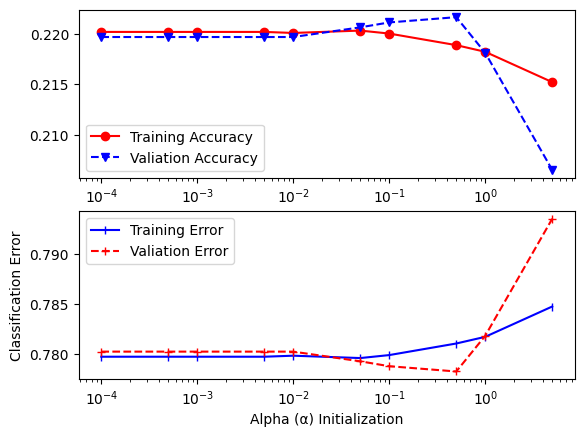

In [48]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(alpha_values,trainAcc,'ro-',alpha_values,valAcc,'bv--')
ax2.plot(alpha_values,trainErr,'b|-',alpha_values,valErr,'r+--')

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Alpha (α) Initialization')
plt.ylabel('Classification Error')
plt.show()

In [49]:
desc_indx = valAcc.argsort()[::-1]
for indx,i in enumerate(desc_indx[:5]):
  print(f"{indx+1}th max validation accuracy of {valAcc[i]*100:.2f}% with α={alpha_values[i]:.2f} with difference of {(trainAcc[i] - valAcc[i])*100:0.2f}%")

1th max validation accuracy of 22.17% with α=0.50 with difference of -0.28%
2th max validation accuracy of 22.12% with α=0.10 with difference of -0.11%
3th max validation accuracy of 22.07% with α=0.05 with difference of -0.03%
4th max validation accuracy of 21.97% with α=0.01 with difference of 0.04%
5th max validation accuracy of 21.97% with α=0.01 with difference of 0.05%


In [50]:
alpha_values = np.linspace(10**-2,10**1,20) # we define a linear sclare to search for the best alpha linearly in the most promising interval [10^-2, 10^0]
alpha_values

array([ 0.01      ,  0.53578947,  1.06157895,  1.58736842,  2.11315789,
        2.63894737,  3.16473684,  3.69052632,  4.21631579,  4.74210526,
        5.26789474,  5.79368421,  6.31947368,  6.84526316,  7.37105263,
        7.89684211,  8.42263158,  8.94842105,  9.47421053, 10.        ])

In [51]:
trainAcc, valAcc  = np.zeros(len(alpha_values)), np.zeros(len(alpha_values))
trainErr, valErr  = np.zeros(len(alpha_values)), np.zeros(len(alpha_values))

## loop through a list of learning rate initializations, and then score both train and test results
for index, α in enumerate(alpha_values):

  NB_clf  = Pipeline([
                    ('MS', MinMaxScaler()) ,
                    ('NB', MultinomialNB(alpha = α))
                   ])

  NB_clf.fit(X_train, y_train)

  Y_predTrain     = NB_clf.predict(X_train)
  Y_predVal       = NB_clf.predict(X_val)

  trainAcc[index] = f1_score(y_train, Y_predTrain , average = 'weighted')
  valAcc[index]   = f1_score(y_val  , Y_predVal   , average = 'weighted')

  trainErr[index] = 1-f1_score(y_train, Y_predTrain , average = 'weighted')
  valErr[index]   = 1-f1_score(y_val, Y_predVal , average = 'weighted')

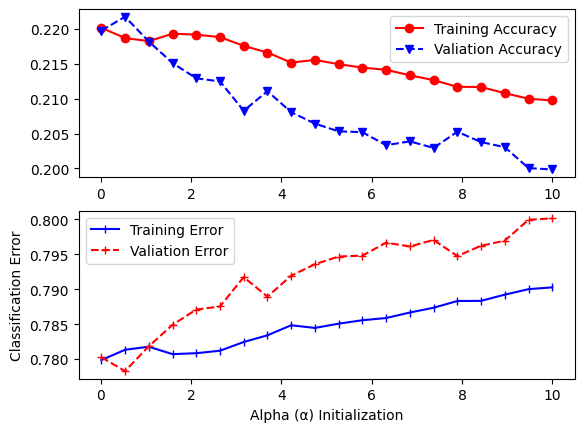

In [52]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(alpha_values,trainAcc,'ro-',alpha_values,valAcc,'bv--')
ax2.plot(alpha_values,trainErr,'b|-',alpha_values,valErr,'r+--')

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Alpha (α) Initialization')
plt.ylabel('Classification Error')
plt.show()

In [56]:
desc_indx = valAcc.argsort()[::-1]
for indx,i in enumerate(desc_indx[:5]):
  print(f"{indx+1}th max validation accuracy of {valAcc[i]*100:.2f}% with α={alpha_values[i]:.2f} with difference of {(trainAcc[i] - valAcc[i])*100:0.2f}%")

1th max validation accuracy of 22.17% with α=0.54 with difference of -0.31%
2th max validation accuracy of 21.97% with α=0.01 with difference of 0.04%
3th max validation accuracy of 21.82% with α=1.06 with difference of 0.01%
4th max validation accuracy of 21.51% with α=1.59 with difference of 0.42%
5th max validation accuracy of 21.29% with α=2.11 with difference of 0.63%


In [57]:
top_5_alpha_values = alpha_values[desc_indx[:5]]
top_5_alpha_values

array([0.53578947, 0.01      , 1.06157895, 1.58736842, 2.11315789])

In [58]:
# define the prior distribution based on the inverse of the results trying to enhance it
prior = 1-np.array([0.33 , 0.14 , 0.11 , 0.17 , 0.36])
prior = prior/prior.sum()
prior

array([0.21271394, 0.21026895, 0.21760391, 0.20293399, 0.15647922])

In [59]:
NB_clf = Pipeline([
                   ('MS', MinMaxScaler()) ,
                   ('NB', MultinomialNB())
                 ])

# Create the parameter grid
NB_params_poss = {
                   'NB__alpha'       : top_5_alpha_values ,
                   'NB__fit_prior'   : [True, False]      ,
                   'NB__class_prior' : [None, prior]
                  }

# Instantiate the grid search model with non nested cross validation
grid_search_NB = GridSearchCV(estimator           = NB_clf                ,
                              param_grid          = NB_params_poss        ,
                              cv                  =  4                    ,                        ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                        ## use all processors to conduct the search
                              verbose             =  1                    ,                        ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [60]:
%%time
grid_search_NB.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
CPU times: user 281 ms, sys: 733 ms, total: 1.01 s
Wall time: 1.83 s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('MS', MinMaxScaler()),
                                       ('NB', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'NB__alpha': array([0.53578947, 0.01      , 1.06157895, 1.58736842, 2.11315789]),
                         'NB__class_prior': [None,
                                             array([0.21271394, 0.21026895, 0.21760391, 0.20293399, 0.15647922])],
                         'NB__fit_prior': [True, False]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [61]:
## Get the best parameters
NB_params = grid_search_NB.best_params_
NB_params

{'NB__alpha': 0.5357894736842106,
 'NB__class_prior': None,
 'NB__fit_prior': True}

In [62]:
NB_clf  = Pipeline([
                    ('MS', MinMaxScaler()) ,
                    ('NB', MultinomialNB(alpha = 0.5357894736842106 , fit_prior = True, class_prior = None))
                   ])

NB_clf.fit(X_train, y_train)

NB_y_train_pred   = NB_clf.predict(X_train)
NB_y_test_pred    = NB_clf.predict(X_test)

# Training set performance
NB_train_accuracy = accuracy_score(y_train, NB_y_train_pred)                         # Calculate Accuracy
NB_train_f1       = f1_score(y_train, NB_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
NB_test_accuracy  = accuracy_score(y_test, NB_y_test_pred)                            # Calculate Accuracy
NB_test_f1        = f1_score(y_test , NB_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("NB Train Accuracy: {:.4f}".format(NB_train_accuracy))
print("NB Train F1 Score: {:.4f}".format(NB_train_f1))
print('NB Test Accuracy: {:.4f}'.format(NB_test_accuracy))
print('NB Test F1 Score: {:.4f}'.format(NB_test_f1))

print(classification_report(y_test, NB_y_test_pred))

NB Train Accuracy: 0.2590
NB Train F1 Score: 0.2187
NB Test Accuracy: 0.2577
NB Test F1 Score: 0.2197
              precision    recall  f1-score   support

           0       0.32      0.34      0.33       600
           1       0.23      0.07      0.11       600
           2       0.22      0.10      0.13       600
           3       0.25      0.13      0.17       600
           4       0.24      0.65      0.36       600

    accuracy                           0.26      3000
   macro avg       0.25      0.26      0.22      3000
weighted avg       0.25      0.26      0.22      3000



In [63]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [64]:
## define random forest for cross validation
NB_clf = Pipeline([
                    ('MS', MinMaxScaler()) ,
                    ('NB', MultinomialNB())
])

NB_params_poss = {
                   'NB__alpha'             : [0.5357894736842106]       ,
                   'NB__fit_prior'         : [True]                     ,
                   'NB__class_prior'       : [None]
                  }

# Nested CV with parameter optimization
NB_cv_clf = GridSearchCV(estimator           = NB_clf                ,
                         param_grid          = NB_params_poss        ,
                         cv                  = inner_cv              ,
                         n_jobs              =-1                     ,        ## use all processors to conduct the search
                         verbose             = 1                     ,
                         return_train_score  = True                  ,
                         error_score         = "raise")                       ## Print out the GridSearch output

scores_NB = cross_validate(estimator          = NB_cv_clf ,
                           X                  = X         ,
                           y                  = y         ,
                           cv                 = outer_cv  ,
                           scoring            = scoring   ,   ## give scoring metrics at the time of cross validation
                           return_train_score = True      ,
                           return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_NB['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_NB['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_NB['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_NB['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.2642
Train F1 Score: 0.2258
Test Accuracy: 0.2628
Test F1 Score: 0.2255


In [65]:
# NB
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_NB        = np.mean(scores_NB['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_NB_err    = 1 - model_test_balanced_accuracy_NB                         # Calculate balanced accuracy error
model_test_accuracy_NB                 = np.mean(scores_NB['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_NB_err             = 1 - model_test_accuracy_NB                                  # Calculate Accuracy error
model_test_f1_NB                       = np.mean(scores_NB['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_NB_err                   = 1 - model_test_f1_NB                                        # Calculate F1-score error
model_test_precision_weighted_NB       = np.mean(scores_NB['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_NB_err   = 1 - model_test_precision_weighted_NB                        # Calculate Precision Weighted error
model_test_precision_macro_NB          = np.mean(scores_NB['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_NB_err      = 1 - model_test_precision_macro_NB                           # Calculate Precision Macro error
model_test_recall_weighted_NB          = np.mean(scores_NB['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_NB_err      = 1 - model_test_recall_weighted_NB                           # Calculate Recall Weighted error
model_test_recall_macro_NB             = np.mean(scores_NB['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_NB_err         = 1 - model_test_recall_macro_NB                              # Calculate Recall macro error

print('NB performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_NB) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_NB_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_NB) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_NB_err))
print('- F1 score: {:.4f}'.format(model_test_f1_NB) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_NB_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_NB) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_NB_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_NB) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_NB_err))
print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_NB) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_NB_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_NB) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_NB_err))

NB performance for test only after nested cross validation
- Balanced Accuracy: 0.2636 || Balanced Accuracy Error: 0.7364
- Accuracy: 0.2628 || Accuracy Error: 0.7372
- F1 score: 0.2255 || F1 score Error: 0.7745
- Precision Weighted: 0.2631 || Precision Weighted Error: 0.7369
- Precision macro: 0.2627 || Precision macro Error: 0.7373
- Recall Weighted: 0.2628 || Recall Weighted Error: 0.7372
- Recall macro: 0.2636 || Recall macro Error: 0.7364


#### **LogisticRegression**

In [66]:
LR_clf = Pipeline([
    ('LR'   , LogisticRegression(max_iter=10000))
])

LR_clf.fit(X_train, y_train)

LR_y_train_pred   = LR_clf.predict(X_train)
LR_y_test_pred    = LR_clf.predict(X_test)

# Training set performance
LR_train_accuracy = accuracy_score(y_train, LR_y_train_pred)                         # Calculate Accuracy
LR_train_f1       = f1_score(y_train, LR_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
LR_test_accuracy  = accuracy_score(y_test, LR_y_test_pred)                            # Calculate Accuracy
LR_test_f1        = f1_score(y_test , LR_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("LR Train Accuracy: {:.4f}".format(LR_train_accuracy))
print("LR Train F1 Score: {:.4f}".format(LR_train_f1))
print('LR Test Accuracy: {:.4f}'.format(LR_test_accuracy))
print('LR Test F1 Score: {:.4f}'.format(LR_test_f1))

LR Train Accuracy: 0.4643
LR Train F1 Score: 0.4575
LR Test Accuracy: 0.4203
LR Test F1 Score: 0.4132


In [67]:
C_init_values = [10**-i for i in range(5)] + [5*10**-i for i in range(5)]  # define log-scale range of learning rate to search as a first guess
C_init_values.sort()
C_init_values

[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]

In [68]:
trainAcc, valAcc  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))
trainErr, valErr  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))

## loop through a list of learning rate initializations, and then score both train and test results
for index, c_val in enumerate(C_init_values):

  LR_clf = Pipeline([
                        ('LR'   , LogisticRegression(C= c_val, max_iter=10000))
                    ])

  LR_clf.fit(X_train, y_train)

  Y_predTrain     = LR_clf.predict(X_train)
  Y_predVal       = LR_clf.predict(X_val)

  trainAcc[index] = f1_score(y_train   , Y_predTrain , average = 'weighted')
  valAcc[index]   = f1_score(y_val     , Y_predVal   , average = 'weighted')

  trainErr[index] = 1-f1_score(y_train , Y_predTrain , average = 'weighted')
  valErr[index]   = 1-f1_score(y_val   , Y_predVal   , average = 'weighted')

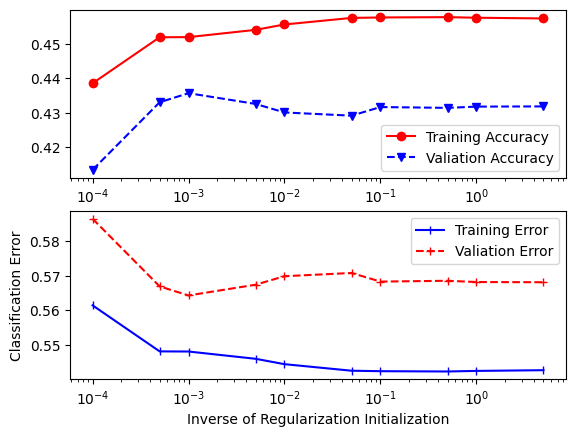

In [69]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(C_init_values,trainAcc,'ro-',C_init_values,valAcc,'bv--')
ax2.plot(C_init_values,trainErr,'b|-',C_init_values,valErr,'r+--')

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Inverse of Regularization Initialization')
plt.ylabel('Classification Error')
plt.show()

In [70]:
C_init_values = np.linspace(10**-3,10**0,20) # we define a linear sclare to search for the best C linearly in the most promising interval [10^-2, 10^0]
C_init_values

array([0.001     , 0.05357895, 0.10615789, 0.15873684, 0.21131579,
       0.26389474, 0.31647368, 0.36905263, 0.42163158, 0.47421053,
       0.52678947, 0.57936842, 0.63194737, 0.68452632, 0.73710526,
       0.78968421, 0.84226316, 0.89484211, 0.94742105, 1.        ])

In [71]:
trainAcc, valAcc  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))
trainErr, valErr  = np.zeros(len(C_init_values)), np.zeros(len(C_init_values))

## loop through a list of learning rate initializations, and then score both train and test results
for index, c_val in enumerate(C_init_values):

  LR_clf = Pipeline([
                        ('LR'   , LogisticRegression(C= c_val, max_iter=10000))
                    ])

  LR_clf.fit(X_train, y_train)

  Y_predTrain     = LR_clf.predict(X_train)
  Y_predVal       = LR_clf.predict(X_val)

  trainAcc[index] = f1_score(y_train   , Y_predTrain , average = 'weighted')
  valAcc[index]   = f1_score(y_val     , Y_predVal   , average = 'weighted')

  trainErr[index] = 1-f1_score(y_train , Y_predTrain , average = 'weighted')
  valErr[index]   = 1-f1_score(y_val   , Y_predVal   , average = 'weighted')

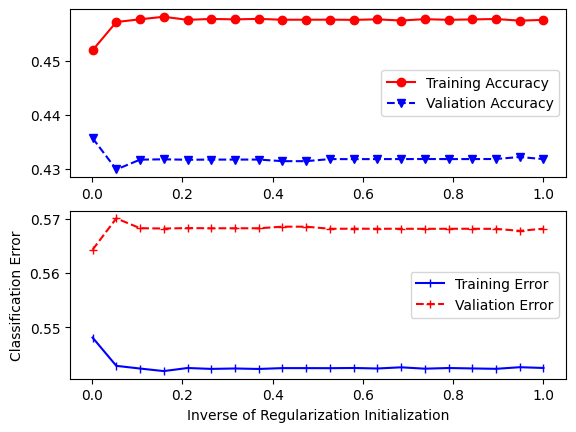

In [72]:
## Plot training and testing results with respect to degree

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(C_init_values,trainAcc,'ro-',C_init_values,valAcc,'bv--')
ax2.plot(C_init_values,trainErr,'b|-',C_init_values,valErr,'r+--')

ax1.legend(['Training Accuracy','Valiation Accuracy'])
ax2.legend(['Training Error','Valiation Error'])

plt.xlabel('Inverse of Regularization Initialization')
plt.ylabel('Classification Error')
plt.show()

In [73]:
desc_indx = valAcc.argsort()[::-1]
for indx,i in enumerate(desc_indx[:5]):
  print(f"{indx+1}th max validation accuracy of {valAcc[i]*100:.2f}% with C={C_init_values[i]:.2f} with difference of {(trainAcc[i] - valAcc[i])*100:0.2f}%")

1th max validation accuracy of 43.57% with C=0.00 with difference of 1.62%
2th max validation accuracy of 43.22% with C=0.95 with difference of 2.52%
3th max validation accuracy of 43.18% with C=0.89 with difference of 2.59%
4th max validation accuracy of 43.18% with C=0.74 with difference of 2.59%
5th max validation accuracy of 43.18% with C=0.53 with difference of 2.58%


In [74]:
top_5_C_values = C_init_values[desc_indx[:5]]
top_5_C_values

array([0.001     , 0.94742105, 0.89484211, 0.73710526, 0.52678947])

In [75]:
LR_clf = Pipeline([
                   ('LR', LogisticRegression(max_iter=10000))
])

# Create the parameter grid
LR_params_poss = {
                   'LR__C':           top_5_C_values         ,
                   'LR__penalty':     ['l2']
                   }

# Instantiate the grid search model with non nested cross validation
grid_search_LR = GridSearchCV(estimator           = LR_clf                ,
                              param_grid          = LR_params_poss        ,
                              cv                  =  4                    ,                        ## None nested cross validation while hyper parameter tuning
                              n_jobs              = -1                    ,                        ## use all processors to conduct the search
                              verbose             =  1                    ,                        ## Print out the GridSearch output
                              scoring             = make_scorer(f1_score  , average='weighted') ,  ## use f1 score as a metric
                              return_train_score  = True                  ,
                              error_score         = "raise")

In [76]:
%%time
grid_search_LR.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
CPU times: user 6min 4s, sys: 19min 51s, total: 25min 55s
Wall time: 7min 19s


GridSearchCV(cv=4, error_score='raise',
             estimator=Pipeline(steps=[('LR',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'LR__C': array([0.001     , 0.94742105, 0.89484211, 0.73710526, 0.52678947]),
                         'LR__penalty': ['l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [77]:
## Get the best parameters
LR_params = grid_search_LR.best_params_
LR_params

{'LR__C': 0.5267894736842105, 'LR__penalty': 'l2'}

In [78]:
LR_clf  = Pipeline([
                    ('LR', LogisticRegression(C = 0.5267894736842105 , max_iter = 10000 , penalty = 'l2'))
                   ])

LR_clf.fit(X_train, y_train)

LR_y_train_pred   = LR_clf.predict(X_train)
LR_y_test_pred    = LR_clf.predict(X_test)

# Training set performance
LR_train_accuracy = accuracy_score(y_train, LR_y_train_pred)                         # Calculate Accuracy
LR_train_f1       = f1_score(y_train, LR_y_train_pred , average='weighted')          # Calculate F1 score

# Test set performance
LR_test_accuracy  = accuracy_score(y_test, LR_y_test_pred)                            # Calculate Accuracy
LR_test_f1        = f1_score(y_test , LR_y_test_pred , average = 'weighted')         # Calculate F1 score

## The score
print("LR Train Accuracy: {:.4f}".format(LR_train_accuracy))
print("LR Train F1 Score: {:.4f}".format(LR_train_f1))
print('LR Test Accuracy: {:.4f}'.format(LR_test_accuracy))
print('LR Test F1 Score: {:.4f}'.format(LR_test_f1))

print(classification_report(y_test, LR_y_test_pred))

LR Train Accuracy: 0.4643
LR Train F1 Score: 0.4576
LR Test Accuracy: 0.4203
LR Test F1 Score: 0.4132
              precision    recall  f1-score   support

           0       0.53      0.60      0.57       600
           1       0.37      0.31      0.34       600
           2       0.28      0.25      0.27       600
           3       0.37      0.36      0.37       600
           4       0.49      0.58      0.53       600

    accuracy                           0.42      3000
   macro avg       0.41      0.42      0.41      3000
weighted avg       0.41      0.42      0.41      3000



In [79]:
## Merge both train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

## define inner and outer cross val
inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

## defining accuracy for cross validation
f1_weighted = make_scorer(f1_score, average='weighted')
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'precision_macro', 'precision_weighted', 'recall_weighted', 'recall_macro']

In [80]:
## define random forest for cross validation
LR_clf = Pipeline([
                    ('LR', LogisticRegression())
])

LR_params_poss = {
                   'LR__max_iter':    [10000]                  ,
                   'LR__C':           [0.5267894736842105]   ,
                   'LR__penalty':     ['l2']
                  }

# Nested CV with parameter optimization
LR_cv_clf = GridSearchCV(estimator           = LR_clf                ,
                         param_grid          = LR_params_poss        ,
                         cv                  = inner_cv              ,
                         n_jobs              =-1                     ,        ## use all processors to conduct the search
                         verbose             = 1                     ,
                         return_train_score  = True                  ,
                         error_score         = "raise")                       ## Print out the GridSearch output

scores_LR = cross_validate(estimator          = LR_cv_clf ,
                           X                  = X         ,
                           y                  = y         ,
                           cv                 = outer_cv  ,
                           scoring            = scoring   ,   ## give scoring metrics at the time of cross validation
                           return_train_score = True      ,
                           return_estimator   = True)

print("Train Accuracy: {:.4f}".format(np.mean(scores_LR['train_accuracy'])))
print("Train F1 Score: {:.4f}".format(np.mean(scores_LR['train_f1_weighted'])))
print('Test Accuracy: {:.4f}'.format(np.mean(scores_LR['test_accuracy'])))
print('Test F1 Score: {:.4f}'.format(np.mean(scores_LR['test_f1_weighted'])))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Accuracy: 0.4630
Train F1 Score: 0.4564
Test Accuracy: 0.4235
Test F1 Score: 0.4167


In [81]:
# LR
# Testing set, average performance after nested cross validation
model_test_balanced_accuracy_LR        = np.mean(scores_LR['test_balanced_accuracy'])                # Calculate balanced accuracy
model_test_balanced_accuracy_LR_err    = 1 - model_test_balanced_accuracy_LR                         # Calculate balanced accuracy error
model_test_accuracy_LR                 = np.mean(scores_LR['test_accuracy'])                         # Calculate Accuracy
model_test_accuracy_LR_err             = 1 - model_test_accuracy_LR                                  # Calculate Accuracy error
model_test_f1_LR                       = np.mean(scores_LR['test_f1_weighted'])                      # Calculate F1-score
model_test_f1_LR_err                   = 1 - model_test_f1_LR                                        # Calculate F1-score error
model_test_precision_weighted_LR       = np.mean(scores_LR['test_precision_weighted'])               # Calculate Precision Weighted
model_test_precision_weighted_LR_err   = 1 - model_test_precision_weighted_LR                        # Calculate Precision Weighted error
model_test_precision_macro_LR          = np.mean(scores_LR['test_precision_macro'])                  # Calculate Precision Macro
model_test_precision_macro_LR_err      = 1 - model_test_precision_macro_LR                           # Calculate Precision Macro error
model_test_recall_weighted_LR          = np.mean(scores_LR['test_recall_weighted'])                  # Calculate Recall Weighted
model_test_recall_weighted_LR_err      = 1 - model_test_recall_weighted_LR                           # Calculate Recall Weighted error
model_test_recall_macro_LR             = np.mean(scores_LR['test_recall_macro'])                     # Calculate Recall macro
model_test_recall_macro_LR_err         = 1 - model_test_recall_macro_LR                              # Calculate Recall macro error

print('LR performance for test only after nested cross validation')
print("- Balanced Accuracy: {:.4f}".format(model_test_balanced_accuracy_LR) + " || " + "Balanced Accuracy Error: {:.4f}".format(model_test_balanced_accuracy_LR_err))
print("- Accuracy: {:.4f}".format(model_test_accuracy_LR) + " || " + "Accuracy Error: {:.4f}".format(model_test_accuracy_LR_err))
print('- F1 score: {:.4f}'.format(model_test_f1_LR) + " || " + "F1 score Error: {:.4f}".format(model_test_f1_LR_err))
print('- Precision Weighted: {:.4f}'.format(model_test_precision_weighted_LR) + " || " + "Precision Weighted Error: {:.4f}".format(model_test_precision_weighted_LR_err))
print('- Precision macro: {:.4f}'.format(model_test_precision_macro_LR) + " || " + "Precision macro Error: {:.4f}".format(model_test_precision_macro_LR_err))
#print('- Recall Weighted: {:.4f}'.format(model_test_recall_weighted_LR) + " || " + "Recall Weighted Error: {:.4f}".format(model_test_recall_weighted_LR_err))
print('- Recall macro: {:.4f}'.format(model_test_recall_macro_LR) + " || " + "Recall macro Error: {:.4f}".format(model_test_recall_macro_LR_err))

LR performance for test only after nested cross validation
- Balanced Accuracy: 0.4236 || Balanced Accuracy Error: 0.5764
- Accuracy: 0.4235 || Accuracy Error: 0.5765
- F1 score: 0.4167 || F1 score Error: 0.5833
- Precision Weighted: 0.4140 || Precision Weighted Error: 0.5860
- Precision macro: 0.4138 || Precision macro Error: 0.5862
- Recall macro: 0.4236 || Recall macro Error: 0.5764


### **BiLSTM**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold , cross_val_score , cross_validate

from sklearn.metrics import classification_report   , confusion_matrix , ConfusionMatrixDisplay  , recall_score ,  precision_score  , accuracy_score  , f1_score  , make_scorer , balanced_accuracy_score , roc_auc_score , roc_curve

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pdf = pd.read_csv('./data/sampled_data.csv')

In [ ]:
pdf.duplicated().sum()

0

In [ ]:
pdf.duplicated(subset=['pros', 'cons', 'overall-ratings']).sum()

0

In [ ]:
pdf.duplicated(subset=['org_pros', 'org_cons', 'overall-ratings']).sum()

0

In [ ]:
pdf.isna().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
dtype: int64

In [ ]:
pdf.isnull().sum()

company            0
location           0
pros               0
cons               0
overall-ratings    0
source             0
org_pros           0
org_cons           0
dtype: int64

In [ ]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          20000 non-null  object
 1   location         20000 non-null  object
 2   pros             20000 non-null  object
 3   cons             20000 non-null  object
 4   overall-ratings  20000 non-null  int64 
 5   source           20000 non-null  object
 6   org_pros         20000 non-null  object
 7   org_cons         20000 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


In [ ]:
pdf.shape

(20000, 8)

In [ ]:
len(pdf['company'].unique())

172

In [ ]:
len(pdf['location'].unique())

2493

In [ ]:
pdf['company-review'] = "pros: " + pdf['org_pros'] + "\ncons: " + pdf['org_cons']
pdf.head(2)

,company,location,pros,cons,overall-ratings,source,org_pros,org_cons,company-review
0,Office Depot,"Overland Park, KS",solid parttime job department little less reta...,sales goals department unrealistic dependent u...,3,Glassdoor,It's a solid part-time job. This department is...,Sales goals for the department can be unrealis...,pros: It's a solid part-time job. This departm...
1,DISH,"Cheyenne, WY",jobs easy,satellite tv way entire company slowly canniba...,1,Glassdoor,The jobs here are very easy.,satellite tv is on its way out and the entire ...,pros: The jobs here are very easy.\ncons: sate...


In [ ]:
def clean_text(text):
    # Handling Emojis https://unicode.scarfboy.com/
    # Grinning face with smiling eyes [-5]
    text = re.sub('\xf0\x9f\x98\x81', 'grinning_face_with_smiling_eyes_emoji ', text)
    # Grinning face with star eyes
    text = re.sub('\xf0\x9f\xa4\xa9', 'grinning_face_with_star_eyes_emoji ', text)
    # Smiling face with smiling eyes [-8]
    text = re.sub('\xf0\x9f\x98\x8a', 'smiling_face_with_smiling_eyes_emoji ', text)
    # OK sign emoji [-1]
    text = re.sub('\xf0\x9f\x91\x8c', 'OK_emoji ', text)
    # thumbs up emoji [-6]
    text = re.sub('\xf0\x9f\x91\x8d', 'thumbs_up_emoji ', text)
    # thumbs down
    text = re.sub('\xf0\x9f\x91\x8e', 'thumbs_down_emoji ', text)
    # robot face [-1]
    text = re.sub('\xf0\x9f\xa4\x96', 'robot_face_emoji ', text)
    # 100 points
    text = re.sub('\xf0\x9f\x92\xaf', '100_points_emoji ', text)
    # emoji modifier
    text = re.sub('\xf0\x9f\x8f\xbb', '', text)
    # emoji modifier fitzpatrick type-3
    text = re.sub('\xf0\x9f\x8f\xbc', '', text)
    # emoji modifier fitzpatrick type-4
    text = re.sub('\xf0\x9f\x8f\xbd', '', text)
    # emoji modifier fitzpatrick type-5
    text = re.sub('\xf0\x9f\x8f\xbe', '', text)
    # face with stuck-out tongue and winking eye
    text = re.sub('\xf0\x9f\x98\x9c', 'face_with_stuck_out_tongue_and_winking_eye_emoji ', text)
    # face with stuck-out tongue
    text = re.sub('\xf0\x9f\x98\x9b', 'face_with_stuck_out_tongue_emoji ', text)
    # crying face
    text = re.sub('\xf0\x9f\x98\xa2', 'crying_face_emoji ', text)
    # kissing face
    text = re.sub('\xf0\x9f\x98\x9a', 'kissing_face_emoji ', text)
    # grinning face
    text = re.sub('\xf0\x9f\x98\x80', 'grinning_face_emoji ', text)
    # face with tears of joy
    text = re.sub('\xf0\x9f\x98\x82', 'face_with_tears_of_joy_emoji ', text)
    # unamused face
    text = re.sub('\xf0\x9f\x98\x92', 'unamused_face_emoji ', text)
    # upside-down face
    text = re.sub('\xf0\x9f\x99\x83', 'upside_down_face_emoji ', text)
    # smiling face with heart-shaped eyes
    text = re.sub('\xf0\x9f\x98\x8d', 'smiling_face_with_heart_shaped_eyes_emoji ', text)
    # winking face
    text = re.sub('\xf0\x9f\x98\x89', 'winking_face_emoji ', text)
    # shrug emoji
    text = re.sub('\xf0\x9f\xa4\xb7', 'shrug_emoji ', text)
    # rolling on the floor laughing emoji
    text = re.sub('\xf0\x9f\xa4\xa3', 'rolling_on_the_floor_laughing_emoji ', text)
    # face palm emoji
    text = re.sub('\xf0\x9f\xa4\xa6', 'face_palm_emoji ', text)
    # smirking face
    text = re.sub('\xf0\x9f\x98\x8f', 'smirking_face_emoji ', text)
    # slightly smiling face
    text = re.sub('\xf0\x9f\x99\x82', 'slightly_smiling_face_emoji ', text)
    # smiling face with open mouth and cold sweat
    text = re.sub('\xf0\x9f\x98\x85', 'smiling_face_with_open_mouth_and_cold_sweat_emoji ', text)
    # smiling face with open mouth and smiling eyes
    text = re.sub('\xf0\x9f\x98\x84', 'smiling_face_with_open_mouth_and_smiling_eyes_emoji ', text)
    # relieved face
    text = re.sub('\xf0\x9f\x98\x8c', 'relieved_face_emoji ', text)
    # worried face
    text = re.sub('\xf0\x9f\x98\x9f', 'worried_face_emoji ', text)
    # face with ok gesture
    text = re.sub('\xf0\x9f\x99\x86', 'face_with_ok_gesture_emoji ', text)
    # face with cold sweat
    text = re.sub('\xf0\x9f\x98\x93', 'face_with_cold_sweat_emoji ', text)
    # smiling face with sunglasses
    text = re.sub('\xf0\x9f\x98\x8e', 'smiling_face_with_sunglasses_emoji ', text)
    # thinking face
    text = re.sub('\xf0\x9f\xa4\x94', 'thinking_face_emoji ', text)
    # loudly crying face
    text = re.sub('\xf0\x9f\x98\xad', 'loudly_crying_face_emoji ', text)
    # face with rolling eyes
    text = re.sub('\xf0\x9f\x99\x84', 'face_with_rolling_eyes_emoji ', text)
    # frowning face with open mouth
    text = re.sub('\xf0\x9f\x98\xa6', 'frowning_face_with_open_mouth_emoji ', text)
    # dizzy emoji
    text = re.sub('\xf0\x9f\x92\xab', 'dizzy_symbol_emoji ', text)
    # fire emoji
    text = re.sub('\xf0\x9f\x94\xa5', 'fire_emoji ', text)
    # poultry leg
    text = re.sub('\xf0\x9f\x8d\x97', 'poultry_leg_emoji ', text)
    # electric light bulb
    text = re.sub('\xf0\x9f\x92\xa1', 'electric_light_bulb_emoji ', text)
    # male sign
    text = re.sub('\xe2\x99\x82', 'male_sign ', text)
    # female sign
    text = re.sub('\xe2\x99\x80', 'female_sign ', text)

    # Handling Zero width space using https://unicode.scarfboy.com/
    # Zero width space width
    text = re.sub('\xe2\x80\x8b', '', text)
    # zero width joiner
    text = re.sub('\xe2\x80\x8d', '', text)

    # Handling special chars using https://unicode.scarfboy.com/
    # Left single quotation mark
    text = re.sub('\xe2\x80\x98', "'", text)
    # Right single quotation mark
    text = re.sub('\xe2\x80\x99', "'", text)
    # Left double quotation mark
    text = re.sub('\xe2\x80\x9c', '"', text)
    # Right double quotation mark
    text = re.sub('\xe2\x80\x9d', '"', text)
    # EM dash
    text = re.sub('\xe2\x80\x94', '-', text)
    # EN dash
    text = re.sub('\xe2\x80\x93', '-', text)
    # Fullwidth comma
    text = re.sub('\xef\xbc\x8c', ",", text)
    # Bullet
    text = re.sub('\xe2\x80\xa2', '*', text)
    # Horizontal ellipsis
    text = re.sub('\xe2\x80\xa6', '...', text)
    # checkmark to yes
    text = re.sub('\xe2\x9c\x94', 'yes', text)
    # variation selector to nothing
    text = re.sub('\xef\xb8\x8f', '', text)
    # Euro sign to Dollar sign
    text = re.sub('\xe2\x82\xac', '$', text)
    # Pound sign to Dollar sign
    text = re.sub('\xc2\xa3', '$', text)
    # Cent sign to Dollar sign
    text = re.sub('\xc2\xa2', '$', text)
    # Non-breaking space to space
    text = re.sub('\xc2\xa0', ' ', text)
    # Handling &amp
    text = text.replace("&amp;","&")
    # replace Windows-style line endings (\r\n) with Unix-style line endings
    text = re.sub('\r\n', '\n', text)

    # Handling acute sign using https://unicode.scarfboy.com/
    # Small letter o with acute (ó)
    text = re.sub('\xc3\xb3', "o", text)
    # Small letter e with grave (è)
    text = re.sub('\xc3\xa8', "e", text)
    # Small letter e with grave (é)
    text = re.sub('\xc3\xa9', "e", text)
    # Small letter a with grave (à)
    text = re.sub('\xc3\xa0', "a", text)
    # Acute to '
    text = re.sub('\xc2\xb4', "'", text)
    # Latin small letter dotless I used as |
    text = re.sub('\xc4\xb1', '|', text)
    return text.strip().lower()

In [ ]:
pdf['company-review'] = pdf['company-review'].apply(clean_text)

In [ ]:
## Seperating X and Y
X = pdf['company-review']
y = pdf['overall-ratings']-1

## Split the data into training and testing
x_indices = np.arange(len(pdf))

indices_train, indices_test_val , y_train , y_test_val = train_test_split(x_indices , y , test_size = 0.3 , random_state = 42 , stratify = y)
indices_test , indices_val, y_test, y_val = train_test_split(indices_test_val , y_test_val , test_size = 0.5 , random_state = 42 , stratify = y_test_val)

X_train = pdf['company-review'].iloc[indices_train].values
X_val   = pdf['company-review'].iloc[indices_val].values
X_test  = pdf['company-review'].iloc[indices_test].values
y_train = (pdf['overall-ratings'].iloc[indices_train]-1).values
y_val   = (pdf['overall-ratings'].iloc[indices_val]-1).values
y_test  = (pdf['overall-ratings'].iloc[indices_test]-1).values

#### **First Approach** 
**https://www.sciencedirect.com/science/article/pii/S1877050923009043?ref=pdf_download&fr=RR-2&rr=8f6c47bf7a032cf0**

In [ ]:
class EmployeeReview(Dataset):
    def __init__(self, x, y, vocab = None , vocab_size = 1000, max_len=24):
        self.x       = x
        self.y       = y
        self.max_len = max_len
        self.vocab   = vocab
        if self.vocab is None:
            self.build_vocab(vocab_size)
        self.__clean__()

    def build_vocab(self, vocab_size):
        word_list = []
        for sent in self.x:
            if type(sent) is not str:
                print(sent)
            for word in sent.split():
                if word != '':
                    word_list.append(word)
        corpus = Counter(word_list)
        # sorting on the basis of most common words
        corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:vocab_size]
        self.vocab = {w:i+1 for i,w in enumerate(corpus_)}
        self.vocab["<pad>"] = 0

    def get_vocab(self):
        return self.vocab

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        # print(f"Index: {idx}")
        tokens = self.x[idx].split()
        ids = []
        # tokenize the sentence into list of numbers
        for w in tokens:
            if w != "none" and w in self.vocab:
                ids.append(self.vocab[w])
        # return the tokens and the sentence length
        return ids[:self.max_len], self.y[idx], min(len(ids), self.max_len)

    def __clean__(self):
        print(f"Before cleaning: x = {len(self.x)}, y = {len(self.y)}")
        bad_records = []
        for i in range(len(self.x)):
            tokens = self.x[i].split()
            ids = []
            for w in tokens:
                if w != "none" and w in self.vocab:
                    ids.append(self.vocab[w])
            # check for empty list of tokens
            if len(ids) < 1:
                bad_records.append(i)
        # go backward
        self.x = np.delete(self.x, bad_records)
        self.y = np.delete(self.y, bad_records)
        print(f"After cleaning: x = {len(self.x)}, y = {len(self.y)}")

In [ ]:
max_len     = 24
train_data  = EmployeeReview(X_train , y_train, max_len = max_len)
vocab       = train_data.get_vocab()
valid_data  = EmployeeReview(X_val   , y_val, vocab, max_len = max_len)
test_data   = EmployeeReview(X_test  , y_test, vocab, max_len = max_len)

Before cleaning: x = 14000, y = 14000
After cleaning: x = 14000, y = 14000
Before cleaning: x = 3000, y = 3000
After cleaning: x = 3000, y = 3000
Before cleaning: x = 3000, y = 3000
After cleaning: x = 3000, y = 3000


In [ ]:
pad_index = 0
def collate_fn(batch, pad_index = 0):
    data   = [torch.LongTensor(item[0]) for item in batch]
    target = [item[1] for item in batch]
    length = [item[2] for item in batch]
    data   = pad_sequence(
        data, padding_value=pad_index, batch_first = True)

    target = torch.LongTensor(target)
    length = torch.LongTensor(length)
    return data , target, length

In [ ]:
# dataloaders
batch_size = 256

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True , batch_size = batch_size, collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size = batch_size, collate_fn=collate_fn)
test_loader  = DataLoader(test_data , shuffle=False, batch_size = batch_size, collate_fn=collate_fn)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y , sample_length = next(iter(dataiter))

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample target: \n', sample_y)
print('Sample length: \n', sample_length)

Sample input size:  torch.Size([256, 24])
Sample input: 
 tensor([[ 11,  14, 338,  ...,  64,   4, 124],
        [ 11,  14,  97,  ...,   2, 156,   6],
        [ 11, 372, 341,  ..., 592,  19, 126],
        ...,
        [ 11,  15, 194,  ..., 362,  22, 401],
        [ 11,   8,   6,  ..., 177, 209,  22],
        [ 11, 301, 803,  ..., 191, 733,  43]])
Sample target: 
 tensor([0, 3, 1, 2, 0, 2, 1, 2, 0, 4, 2, 2, 3, 2, 1, 0, 0, 1, 1, 3, 4, 1, 2, 0,
        3, 2, 1, 3, 0, 0, 0, 1, 3, 1, 2, 3, 0, 3, 1, 0, 3, 2, 3, 2, 1, 4, 3, 1,
        3, 4, 0, 1, 3, 1, 3, 3, 1, 4, 2, 4, 0, 3, 2, 1, 4, 3, 1, 4, 3, 3, 3, 1,
        2, 2, 0, 4, 3, 1, 0, 0, 2, 0, 1, 1, 1, 4, 3, 2, 2, 1, 0, 3, 4, 1, 3, 2,
        3, 4, 1, 2, 2, 0, 2, 3, 2, 4, 1, 3, 2, 3, 2, 4, 3, 2, 3, 4, 3, 4, 2, 1,
        1, 4, 4, 2, 4, 1, 2, 2, 4, 2, 4, 3, 4, 3, 4, 3, 3, 1, 0, 1, 2, 1, 3, 0,
        4, 1, 3, 2, 2, 3, 0, 4, 4, 0, 0, 0, 2, 2, 2, 3, 2, 2, 0, 2, 3, 2, 2, 3,
        1, 2, 4, 1, 0, 2, 0, 4, 0, 0, 1, 0, 3, 3, 1, 2, 1, 4, 1, 0, 0, 3, 0

In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self , no_layers , vocab_size  , hidden_dim , embedding_dim ,
                 drop_prob = 0.1, fc_drop_prob=0.1, pad_index = 0 , is_bidirectoinal = True):
        super(SentimentRNN,self).__init__()

        self.output_dim = 5
        self.hidden_dim = hidden_dim

        self.no_layers  = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding  = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        if no_layers >= 2:
            # in case there are more than 2 layers, we can use dropout
            self.lstm       = nn.LSTM(input_size   = embedding_dim   ,
                                      hidden_size  = self.hidden_dim ,
                                      num_layers   = no_layers       ,
                                      batch_first  = True            ,
                                      bidirectional= is_bidirectoinal,
                                      dropout      = drop_prob
                                      )
        else:
            # otherwise, do not use the dropout
            self.lstm       = nn.LSTM(input_size   = embedding_dim   ,
                                      hidden_size  = self.hidden_dim ,
                                      num_layers   = no_layers       ,
                                      batch_first  = True            ,
                                      bidirectional= is_bidirectoinal
                                      )

        num_directions     = 2 if is_bidirectoinal else 1

        self.spatial_dropout = nn.Dropout1d(0.002)
        self.dropout         = nn.Dropout(fc_drop_prob)
        self.fc1             = nn.Linear(self.hidden_dim*num_directions , self.hidden_dim*num_directions)
        self.fc2             = nn.Linear(self.hidden_dim*num_directions , 25)
        self.fc3             = nn.Linear(25 , 5)
        # self.batch_norm    = nn.BatchNorm1d(self.hidden_dim)  # Batch normalization
        self.relu            = nn.ReLU()
        self.softmax         = nn.Softmax(dim=1)
        # self.fc2           = nn.Linear(self.hidden_dim , 5)

    def forward(self,x, lengths):
        # Batch size x Seq length
        batch_size         = x.shape[0]
        length             = lengths
        
        # embeddings size: Batch size x Sequence length x embedding_dim
        embeds             = self.embedding(x)
        embeds             = self.spatial_dropout(embeds)
        packed_embedded    = pack_padded_sequence(
        embeds, length , batch_first = True, enforce_sorted=False
        )

        packed_output, (hidden, cell) = self.lstm(packed_embedded)

        output, output_length = pad_packed_sequence(packed_output, batch_first=True)
        last_out = output[:,-1,:]                 # get the last output
        
        # apply the layers
        out       = self.relu(self.fc1(self.dropout(last_out)))
        out       = self.relu(self.fc2(self.dropout(out)))
        out       = self.softmax(self.fc3(self.dropout(out)))
        
        return out

In [ ]:
no_layers      = 1
vocab_size     = len(vocab) #extra 1 for padding
embedding_dim  = 124 # Word Vector Dimensionality
hidden_dim     = 120 # Number of BiLSTM cells

model          = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, fc_drop_prob = 0.002, pad_index = pad_index)

#moving to gpu
model = model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 124)
  (lstm): LSTM(124, 120, batch_first=True, bidirectional=True)
  (spatial_dropout): Dropout1d(p=0.002, inplace=False)
  (dropout): Dropout(p=0.002, inplace=False)
  (fc1): Linear(in_features=240, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=25, bias=True)
  (fc3): Linear(in_features=25, out_features=5, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [ ]:
def show_model_stats(model):
    total_p     = sum(p.numel() for p in model.parameters())
    trainable_p = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f'    Total Parameters: {total_p}')
    print(f'Trainable Parameters: {trainable_p}')

In [ ]:
for layer in model.children():
    print("Layer : {}".format(layer))
    print("Parameters : ")
    for param in layer.parameters():
        print(param.shape)
    print()
show_model_stats(model)

Layer : Embedding(1001, 124)
Parameters : 
torch.Size([1001, 124])

Layer : LSTM(124, 120, batch_first=True, bidirectional=True)
Parameters : 
torch.Size([480, 124])
torch.Size([480, 120])
torch.Size([480])
torch.Size([480])
torch.Size([480, 124])
torch.Size([480, 120])
torch.Size([480])
torch.Size([480])

Layer : Dropout1d(p=0.002, inplace=False)
Parameters : 

Layer : Dropout(p=0.002, inplace=False)
Parameters : 

Layer : Linear(in_features=240, out_features=240, bias=True)
Parameters : 
torch.Size([240, 240])
torch.Size([240])

Layer : Linear(in_features=240, out_features=25, bias=True)
Parameters : 
torch.Size([25, 240])
torch.Size([25])

Layer : Linear(in_features=25, out_features=5, bias=True)
Parameters : 
torch.Size([5, 25])
torch.Size([5])

Layer : ReLU()
Parameters : 

Layer : Softmax(dim=1)
Parameters : 

    Total Parameters: 424279
Trainable Parameters: 424279


In [ ]:
# loss and optimization functions
lr         = 0.0001    #0.00005
epochs     = 20
max_itr    = epochs*len(train_loader)

#criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()

#1e-5
optimizer = torch.optim.Adam(model.parameters(), lr = lr, eps = 1e-06)

In [ ]:
epochs          = 20
valid_loss_min  = np.Inf

epoch_tr_loss , epoch_vl_loss = [] , []

for epoch in range(epochs):
    train_losses = []
    model.train()
    for inputs, labels, lengths in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        model.zero_grad()
        output = model(inputs, lengths)
        labels = torch.nn.functional.one_hot(labels, num_classes=5)*1.0
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels)
        train_losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    val_losses = []
    model.eval()
    for inputs, labels, lengths in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            output = model(inputs, lengths)
            labels = torch.nn.functional.one_hot(labels, num_classes=5)*1.0
            val_loss = criterion(output.squeeze(), labels)

            val_losses.append(val_loss.item())

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss   = np.mean(val_losses)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    if epoch_val_loss <= valid_loss_min:
        # torch.save(model.state_dict(), './state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 0.5016708964651281 val_loss : 0.5015233183900515
Validation loss decreased (inf --> 0.501523).  Saving model ...
Epoch 2
train_loss : 0.500981764901768 val_loss : 0.5010655572017034
Validation loss decreased (0.501523 --> 0.501066).  Saving model ...
Epoch 3
train_loss : 0.5003310712901029 val_loss : 0.5004710778594017
Validation loss decreased (0.501066 --> 0.500471).  Saving model ...
Epoch 4
train_loss : 0.4993507298556241 val_loss : 0.49955130368471146
Validation loss decreased (0.500471 --> 0.499551).  Saving model ...
Epoch 5
train_loss : 0.497570862011476 val_loss : 0.497585562368234
Validation loss decreased (0.499551 --> 0.497586).  Saving model ...
Epoch 6
train_loss : 0.493191475759853 val_loss : 0.49133305499951047
Validation loss decreased (0.497586 --> 0.491333).  Saving model ...
Epoch 7
train_loss : 0.4782289217818867 val_loss : 0.47254974643389386
Validation loss decreased (0.491333 --> 0.472550).  Saving model ...
Epoch 8
train_loss : 0.4603678719

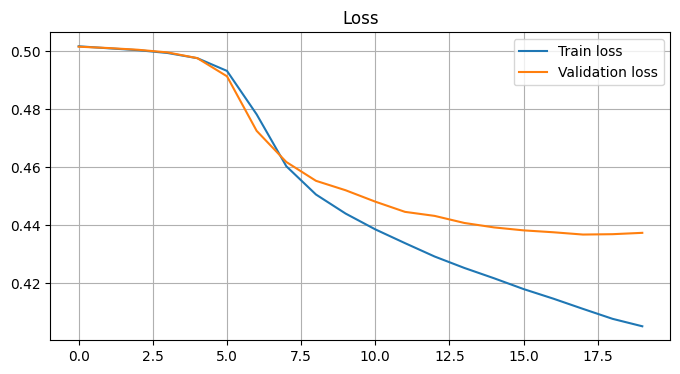

In [ ]:
fig = plt.figure(figsize = (8, 4))
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.eval()
y_pred = []
y = []
with torch.no_grad():
    for inputs, labels, lengths in test_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        y = y + labels.tolist()
        output = model(inputs, lengths)
        labels = output.argmax(1)
        y_pred = y_pred + labels.tolist()
    y_pred = np.array(y_pred)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       600
           1       0.33      0.28      0.30       600
           2       0.25      0.32      0.28       600
           3       0.35      0.35      0.35       600
           4       0.49      0.38      0.43       600

    accuracy                           0.37      3000
   macro avg       0.38      0.37      0.37      3000
weighted avg       0.38      0.37      0.37      3000



#### **Second Approach**

In [ ]:
class EmployeeReview(Dataset):
    def __init__(self, x, y, vocab = None , vocab_size = 1000):
        self.x     = x
        self.y     = y
        self.vocab = vocab
        if self.vocab is None:
            self.build_vocab(vocab_size)
        self.__clean__()

    def build_vocab(self, vocab_size):
        word_list = []
        for sent in self.x:
            if type(sent) is not str:
                print(sent)
            for word in sent.split():
                if word != '':
                    word_list.append(word)
        corpus = Counter(word_list)
        # sorting on the basis of most common words
        corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:vocab_size]
        self.vocab = {w:i+1 for i,w in enumerate(corpus_)}
        self.vocab["<pad>"] = 0

    def get_vocab(self):
        return self.vocab

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        # print(f"Index: {idx}")
        tokens = self.x[idx].split()
        ids = []
        # tokenize the sentence into list of numbers
        for w in tokens:
            if w != "none" and w in self.vocab:
                ids.append(self.vocab[w])
        # return the tokens and the sentence length
        return ids, self.y[idx], len(ids)

    def __clean__(self):
        print(f"Before cleaning: x = {len(self.x)}, y = {len(self.y)}")
        bad_records = []
        for i in range(len(self.x)):
            tokens = self.x[i].split()
            ids = []
            for w in tokens:
                if w != "none" and w in self.vocab:
                    ids.append(self.vocab[w])
            # check for empty list of tokens
            if len(ids) < 1:
                bad_records.append(i)
        # go backward
        self.x = np.delete(self.x, bad_records)
        self.y = np.delete(self.y, bad_records)
        print(f"After cleaning: x = {len(self.x)}, y = {len(self.y)}")

In [ ]:
train_data  = EmployeeReview(X_train , y_train)
vocab       = train_data.get_vocab()
valid_data  = EmployeeReview(X_val   , y_val, vocab)
test_data   = EmployeeReview(X_test  , y_test, vocab)

Before cleaning: x = 14000, y = 14000
After cleaning: x = 14000, y = 14000
Before cleaning: x = 3000, y = 3000
After cleaning: x = 3000, y = 3000
Before cleaning: x = 3000, y = 3000
After cleaning: x = 3000, y = 3000


In [ ]:
pad_index = 0
def collate_fn(batch, pad_index = 0):
    data   = [torch.LongTensor(item[0]) for item in batch]
    target = [item[1] for item in batch]
    length = [item[2] for item in batch]
    data   = pad_sequence(
        data, padding_value=pad_index, batch_first = True)

    target = torch.LongTensor(target)
    length = torch.LongTensor(length)
    return data , target, length

In [ ]:
# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True , batch_size = batch_size, collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size = batch_size, collate_fn=collate_fn)
test_loader  = DataLoader(test_data , shuffle=False, batch_size = batch_size, collate_fn=collate_fn)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y , sample_length = next(iter(dataiter))

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample target: \n', sample_y)
print('Sample length: \n', sample_length)

Sample input size:  torch.Size([50, 268])
Sample input: 
 tensor([[ 11,  29,  13,  ...,   0,   0,   0],
        [ 11, 130, 341,  ...,   0,   0,   0],
        [ 11, 244,   3,  ...,   0,   0,   0],
        ...,
        [ 11, 177, 379,  ...,   0,   0,   0],
        [ 11,   4,  66,  ...,   0,   0,   0],
        [ 11, 278, 549,  ...,   0,   0,   0]])
Sample target: 
 tensor([2, 3, 2, 3, 1, 2, 4, 1, 1, 4, 4, 4, 4, 1, 2, 1, 4, 3, 3, 1, 3, 0, 1, 0,
        0, 3, 2, 4, 0, 2, 2, 2, 1, 0, 0, 3, 3, 3, 4, 0, 4, 4, 1, 0, 0, 0, 4, 3,
        1, 2])
Sample length: 
 tensor([ 79,  48,  83,  43,  71,  42,  92,  58,  60,  58,  46,  84,  71, 160,
         42, 214,  53,  16,  63,  16,  80,  35,  80,  23,  81,  86,  51,  22,
         97,  72,  32,  68, 268,  68,  21,  32,  45,  49,  62, 147,  50,  29,
         50,   9,  62,  58,  30,  73,  34,  54])


In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self , no_layers , vocab_size  , hidden_dim , embedding_dim ,
                 drop_prob = 0.1, fc_drop_prob=0.1, pad_index = 0 , is_bidirectoinal = True):
        super(SentimentRNN,self).__init__()

        self.output_dim = 5
        self.hidden_dim = hidden_dim

        self.no_layers  = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding  = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        if no_layers >= 2:
            # in case there are more than 2 layers, we can use dropout
            self.lstm       = nn.LSTM(input_size   = embedding_dim   ,
                                      hidden_size  = self.hidden_dim ,
                                      num_layers   = no_layers       ,
                                      batch_first  = True            ,
                                      bidirectional= is_bidirectoinal,
                                      dropout      = drop_prob
                                      )
        else:
            # otherwise, do not use the dropout
            self.lstm       = nn.LSTM(input_size   = embedding_dim   ,
                                      hidden_size  = self.hidden_dim ,
                                      num_layers   = no_layers       ,
                                      batch_first  = True            ,
                                      bidirectional= is_bidirectoinal
                                      )

        num_directions     = 2 if is_bidirectoinal else 1

        self.dropout       = nn.Dropout(fc_drop_prob)
        self.fc1           = nn.Linear(self.hidden_dim*num_directions , self.hidden_dim)
        self.batch_norm    = nn.BatchNorm1d(self.hidden_dim)  # Batch normalization
        self.relu          = nn.ReLU()
        self.fc2           = nn.Linear(self.hidden_dim , 5)

    def forward(self,x, lengths):
        # Batch size x Seq length
        batch_size         = x.shape[0]
        length             = lengths

        # embeddings size: Batch size x Sequence length x embedding_dim
        embeds             = self.embedding(x)
        embeds             = self.dropout(embeds)

        packed_embedded    = pack_padded_sequence(
            embeds, length , batch_first = True, enforce_sorted=False
        )

        # hidden = [no_layers * 2, batch size, hidden_dim]
        # cell = [no_layers * 2, batch size, hidden_dim]
        packed_output, (hidden, cell) = self.lstm(packed_embedded)

        # output = [batch size, Sequence length, hidden_dim * 2]
        # output, output_length = pad_packed_sequence(packed_output, batch_first=True)
        # last_out = output[:,-1,:]                 # get the last output

        # Use the hidden for the fully connected layer instead of the output
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
            # hidden = [batch size, hidden dim * 2]
        else:
            hidden = self.dropout(hidden[-1])

        # apply the layers
        dense1       = self.fc1(hidden)
        dense1_norm  = self.batch_norm(dense1)
        relu_dense1  = self.relu(dense1_norm)
        logits       = self.fc2(self.dropout(relu_dense1))

        return logits

In [ ]:
no_layers      = 1
vocab_size     = len(vocab) #extra 1 for padding
embedding_dim  = 32
output_dim     = 5
hidden_dim     = 32

model          = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, fc_drop_prob = 0.3, pad_index = pad_index)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 32)
  (lstm): LSTM(32, 32, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (batch_norm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=5, bias=True)
)


In [ ]:
def show_model_stats(model):
    total_p     = sum(p.numel() for p in model.parameters())
    trainable_p = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f'    Total Parameters: {total_p}')
    print(f'Trainable Parameters: {trainable_p}')

In [ ]:
total_params = 0
for layer in model.children():
    print("Layer : {}".format(layer))
    print("Parameters : ")
    for param in layer.parameters():
        print(param.shape)
    print()
show_model_stats(model)

Layer : Embedding(1001, 32)
Parameters : 
torch.Size([1001, 32])

Layer : LSTM(32, 32, batch_first=True, bidirectional=True)
Parameters : 
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])

Layer : Dropout(p=0.3, inplace=False)
Parameters : 

Layer : Linear(in_features=64, out_features=32, bias=True)
Parameters : 
torch.Size([32, 64])
torch.Size([32])

Layer : BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
Parameters : 
torch.Size([32])
torch.Size([32])

Layer : ReLU()
Parameters : 

Layer : Linear(in_features=32, out_features=5, bias=True)
Parameters : 
torch.Size([5, 32])
torch.Size([5])

    Total Parameters: 51237
Trainable Parameters: 51237


In [ ]:
# loss and optimization functions
lr         = 0.0003     #0.0002
epochs     = 100
max_itr    = epochs*len(train_loader)

criterion = nn.CrossEntropyLoss()

#1e-5
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay = 0.0004)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = max_itr, eta_min=1e-7)

In [ ]:
clip            = 1.0
epochs          = 100
valid_loss_min  = np.Inf

# train for some number of epochs
epoch_tr_loss , epoch_vl_loss = [] , []

for epoch in range(epochs):
    train_losses = []
    model.train()
    for inputs, labels, lengths in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        model.zero_grad()
        output = model(inputs, lengths)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels)
        train_losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()

        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        scheduler.step()

    val_losses = []
    model.eval()
    for inputs, labels, lengths in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            output = model(inputs, lengths)
            val_loss = criterion(output.squeeze(), labels)

            val_losses.append(val_loss.item())

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss   = np.mean(val_losses)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), './state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 1.66604879285608 val_loss : 1.6145236293474834
Validation loss decreased (inf --> 1.614524).  Saving model ...
Epoch 2
train_loss : 1.6344394871166774 val_loss : 1.607133334875107
Validation loss decreased (1.614524 --> 1.607133).  Saving model ...
Epoch 3
train_loss : 1.6223444236176354 val_loss : 1.5994211216767629
Validation loss decreased (1.607133 --> 1.599421).  Saving model ...
Epoch 4
train_loss : 1.6057368044342313 val_loss : 1.5911307175954184
Validation loss decreased (1.599421 --> 1.591131).  Saving model ...
Epoch 5
train_loss : 1.5985518881252834 val_loss : 1.575933180252711
Validation loss decreased (1.591131 --> 1.575933).  Saving model ...
Epoch 6
train_loss : 1.5690755248069763 val_loss : 1.5156096279621125
Validation loss decreased (1.575933 --> 1.515610).  Saving model ...
Epoch 7
train_loss : 1.5228219913584846 val_loss : 1.4688143173853556
Validation loss decreased (1.515610 --> 1.468814).  Saving model ...
Epoch 8
train_loss : 1.4860430466277

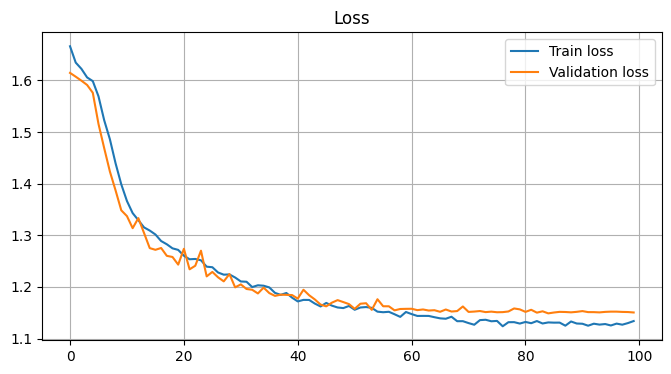

In [ ]:
fig = plt.figure(figsize = (8, 4))
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.eval()
y_pred = []
y = []
with torch.no_grad():
    for inputs, labels, lengths in test_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        y = y + labels.tolist()
        output = model(inputs, lengths)
        labels = output.argmax(1)
        y_pred = y_pred + labels.tolist()
    y_pred = np.array(y_pred)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       600
           1       0.41      0.33      0.37       600
           2       0.42      0.35      0.38       600
           3       0.43      0.46      0.44       600
           4       0.62      0.66      0.64       600

    accuracy                           0.50      3000
   macro avg       0.49      0.50      0.49      3000
weighted avg       0.49      0.50      0.49      3000



### **Plots**

#### **TFIDF**

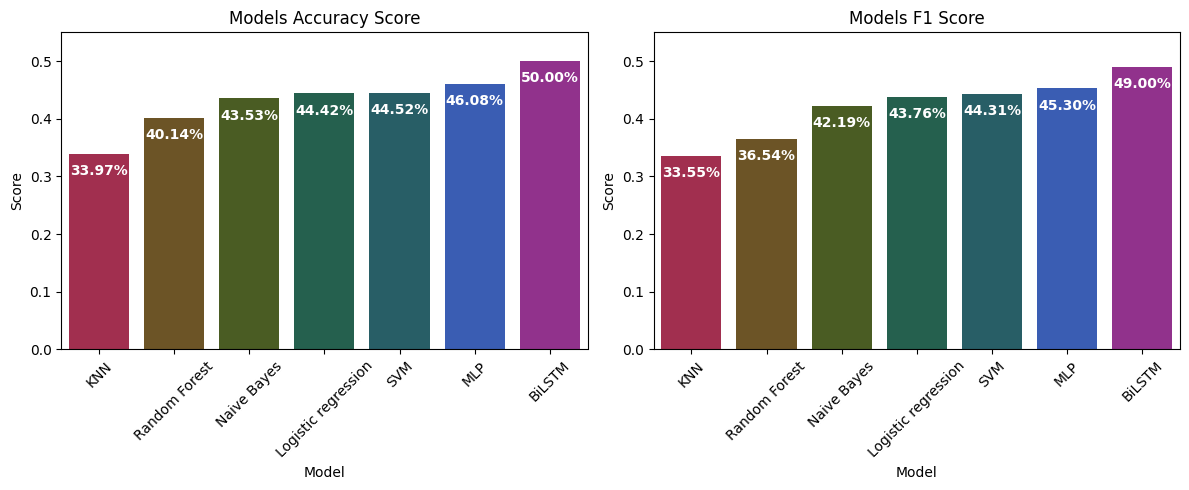

In [283]:
# Define the scores as dictionaries
Acc_score = {"KNN": 0.3397, "Random Forest": 0.4014, "Naive Bayes": 0.4353, "Logistic regression": 0.4442, "SVM": 0.4452, "MLP": 0.4608, "BiLSTM": 0.50}
F1_score  = {"KNN": 0.3355, "Random Forest": 0.3654, "Naive Bayes": 0.4219, "Logistic regression": 0.4376, "SVM": 0.4431, "MLP": 0.4530, "BiLSTM": 0.49}

# Convert the data into a DataFrame for Seaborn
acc_df = pd.DataFrame({'Model': Acc_score.keys(), 'Score': Acc_score.values(), 'Metric': 'Accuracy Score'})
f1_df  = pd.DataFrame({'Model': F1_score.keys(), 'Score': F1_score.values(), 'Metric': 'F1 Score'})

# Generate unique colors for the models using sns.husl_palette
unique_colors = sns.husl_palette(n_colors=len(Acc_score), l=0.4)
model_colors  = dict(zip(Acc_score.keys(), unique_colors))

# Map the colors to each bar using the Model column
f1_colors  = [model_colors[model] for model in f1_df['Model']]
acc_colors = [model_colors[model] for model in acc_df['Model']]

# Create the side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Score Plot
ax1 = axes[0]
sns.barplot(data=acc_df, x='Model', y='Score', palette=acc_colors, ax=ax1)
ax1.set_title("Models Accuracy Score")
ax1.set_ylim(0, max(max(F1_score.values()), max(Acc_score.values())) + 0.05)

# Add score labels inside the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height() * 100:.2f}%',
                 (p.get_x() + p.get_width() / 2, p.get_height() - 0.03),  # Position
                 ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Set x-ticks and rotate for accuracy plot
ax1.set_xticks(range(len(acc_df)))
ax1.set_xticklabels(acc_df['Model'], rotation=45)

# F1 Score Plot
ax2 = axes[1]
sns.barplot(data=f1_df, x='Model', y='Score', palette=f1_colors, ax=ax2)
ax2.set_title("Models F1 Score")
ax2.set_ylim(0, max(max(F1_score.values()), max(Acc_score.values())) + 0.05)

# Add score labels inside the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height() * 100:.2f}%',
                 (p.get_x() + p.get_width() / 2, p.get_height() - 0.03),  # Position
                 ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Set x-ticks and rotate for F1 plot
ax2.set_xticks(range(len(f1_df)))
ax2.set_xticklabels(f1_df['Model'], rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### **GloVe**

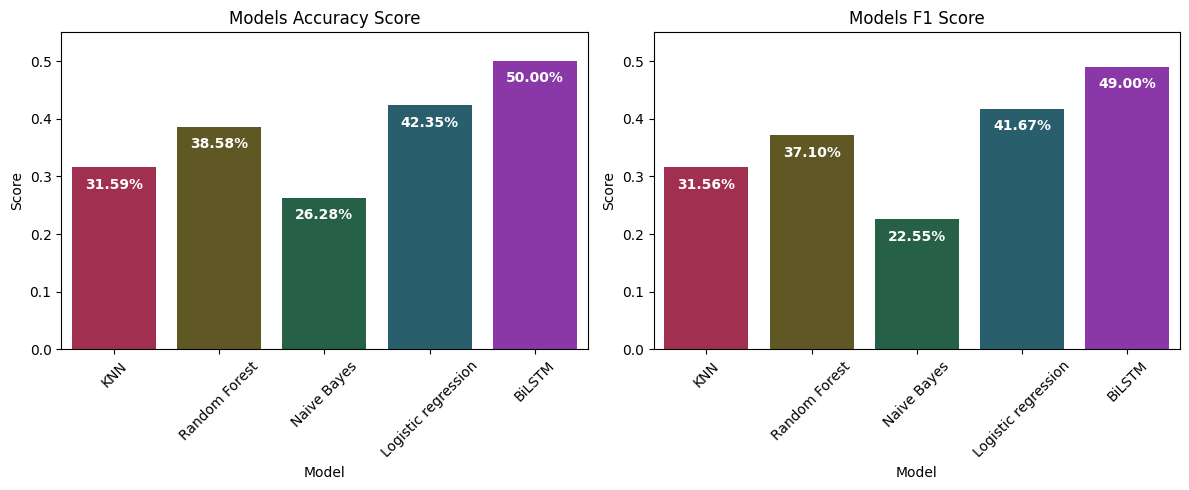

In [82]:
# Define the scores as dictionaries
Acc_score = {"KNN": 0.3159, "Random Forest": 0.3858, "Naive Bayes": 0.2628, "Logistic regression": 0.4235, "BiLSTM": 0.50}
F1_score  = {"KNN": 0.3156, "Random Forest": 0.3710, "Naive Bayes": 0.2255, "Logistic regression": 0.4167, "BiLSTM": 0.49}

# Convert the data into a DataFrame for Seaborn
acc_df = pd.DataFrame({'Model': Acc_score.keys(), 'Score': Acc_score.values(), 'Metric': 'Accuracy Score'})
f1_df  = pd.DataFrame({'Model': F1_score.keys(), 'Score': F1_score.values(), 'Metric': 'F1 Score'})

# Generate unique colors for the models using sns.husl_palette
unique_colors = sns.husl_palette(n_colors=len(Acc_score), l=0.4)
model_colors  = dict(zip(Acc_score.keys(), unique_colors))

# Map the colors to each bar using the Model column
f1_colors  = [model_colors[model] for model in f1_df['Model']]
acc_colors = [model_colors[model] for model in acc_df['Model']]

# Create the side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Score Plot
ax1 = axes[0]
sns.barplot(data=acc_df, x='Model', y='Score', palette=acc_colors, ax=ax1)
ax1.set_title("Models Accuracy Score")
ax1.set_ylim(0, max(max(F1_score.values()), max(Acc_score.values())) + 0.05)

# Add score labels inside the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height() * 100:.2f}%',
                 (p.get_x() + p.get_width() / 2, p.get_height() - 0.03),  # Position
                 ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Set x-ticks and rotate for accuracy plot
ax1.set_xticks(range(len(acc_df)))
ax1.set_xticklabels(acc_df['Model'], rotation=45)

# F1 Score Plot
ax2 = axes[1]
sns.barplot(data=f1_df, x='Model', y='Score', palette=f1_colors, ax=ax2)
ax2.set_title("Models F1 Score")
ax2.set_ylim(0, max(max(F1_score.values()), max(Acc_score.values())) + 0.05)

# Add score labels inside the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height() * 100:.2f}%',
                 (p.get_x() + p.get_width() / 2, p.get_height() - 0.03),  # Position
                 ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Set x-ticks and rotate for F1 plot
ax2.set_xticks(range(len(f1_df)))
ax2.set_xticklabels(f1_df['Model'], rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
!runpodctl stop pod $RUNPOD_POD_ID